In [1]:
%pylab inline
import numpy as np
from conway99 import *

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


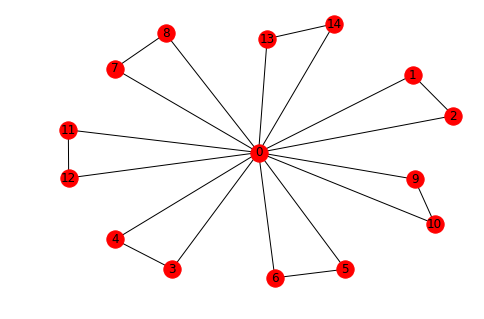

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(_NB, as we started numbering at 0, this is our 16th vertex_)

wlog, let this be neighbour of the unsaturated vertex with smallest label (i.e., vertex 1)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


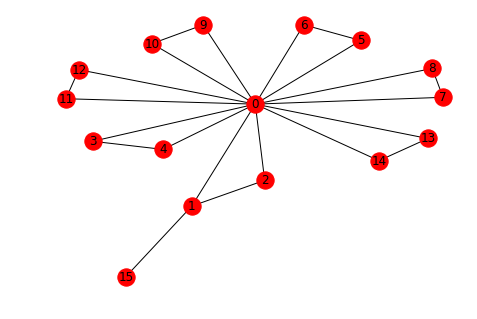

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template_first_unsat(seed15)
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Adding branch 1 candidate
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Branch 0 yielded compatible graph
Branch 1 inv

In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps for 1 candidates


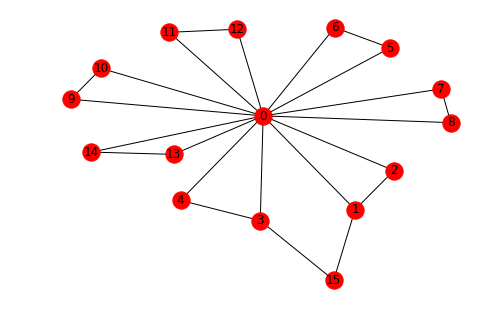

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


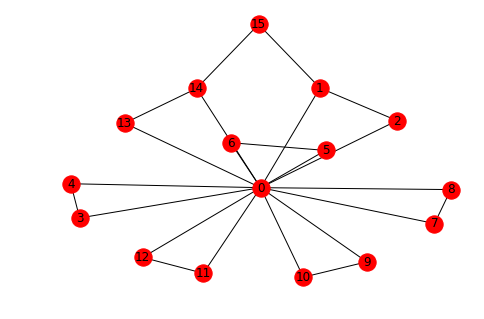

In [9]:
# alternative template 
seed16 = get_supermatrix_template_first_unsat(seed15, forced_edge=(15,14))
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Branch 0 yielded compatible graph
Branch 1 invalid
Reduces to 1 valid graphs
Wall time: 15.9 ms


In [11]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs_first_unsat([seed15], forced_edge=(15,14))

2020-04-29 15:06:50.459741: 1 seed templates generated
2020-04-29 15:06:50.472706: 1 valid graphs from templates
	1 reps for 1 candidates
2020-04-29 15:06:50.472706: Reduced to 1 representatives
Wall time: 13 ms


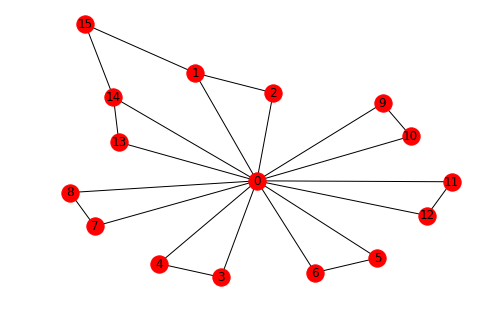

In [12]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_we already force 1-16, so suffices to set 15-16_)

In [13]:
%time rep17 = find_valid_supergraphs_first_unsat(rep16, forced_edge=(15,16))

2020-04-29 15:06:50.565493: 1 seed templates generated
2020-04-29 15:06:50.694114: 11 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
2020-04-29 15:06:50.695112: Reduced to 2 representatives
Wall time: 130 ms


Vertex 17 necessarily starts a new blade, so no forcing

In [14]:
%time rep18 = find_valid_supergraphs_first_unsat(rep17)

2020-04-29 15:06:50.701095: 2 seed templates generated
2020-04-29 15:06:50.963394: 20 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
	3 reps for 12 candidates
2020-04-29 15:06:50.965389: Reduced to 3 representatives
Wall time: 264 ms


However, we can then force vertex 18 to be the other vertex of that blade

In [15]:
%time rep19 = find_valid_supergraphs_first_unsat(rep18, forced_edge=(17,18))

2020-04-29 15:06:50.971373: 3 seed templates generated
2020-04-29 15:06:51.363357: 27 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 18 candidates
	5 reps for 19 candidates
2020-04-29 15:06:51.366354: Reduced to 5 representatives
Wall time: 396 ms


Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [16]:
%time rep20 = find_valid_supergraphs_first_unsat(rep19)

2020-04-29 15:06:51.372300: 5 seed templates generated
2020-04-29 15:06:52.162221: 40 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 9 candidates
	3 reps for 17 candidates
	4 reps for 20 candidates
	5 reps for 25 candidates
	6 reps for 26 candidates
	7 reps for 33 candidates
	8 reps for 34 candidates
2020-04-29 15:06:52.167209: Reduced to 8 representatives
Wall time: 797 ms


In [17]:
%time rep21 = find_valid_supergraphs_first_unsat(rep20, forced_edge=(19,20))

2020-04-29 15:06:52.174157: 8 seed templates generated
2020-04-29 15:06:53.400907: 56 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 14 candidates
	5 reps for 16 candidates
	6 reps for 17 candidates
	7 reps for 28 candidates
	8 reps for 33 candidates
	9 reps for 42 candidates
	10 reps for 50 candidates
2020-04-29 15:06:53.407856: Reduced to 10 representatives
Wall time: 1.23 s


In [18]:
%time rep22 = find_valid_supergraphs_first_unsat(rep21)

2020-04-29 15:06:53.413876: 10 seed templates generated
2020-04-29 15:06:55.166186: 60 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 7 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 19 candidates
	6 reps for 25 candidates
	7 reps for 28 candidates
	8 reps for 31 candidates
	9 reps for 32 candidates
	10 reps for 37 candidates
	11 reps for 43 candidates
	12 reps for 44 candidates
	13 reps for 46 candidates
	14 reps for 49 candidates
	15 reps for 50 candidates
	16 reps for 55 candidates
	17 reps for 56 candidates
2020-04-29 15:06:55.175165: Reduced to 17 representatives
Wall time: 1.76 s


In [19]:
%time rep23 = find_valid_supergraphs_first_unsat(rep22, forced_edge=(21,22))

2020-04-29 15:06:55.181150: 17 seed templates generated
2020-04-29 15:06:57.882920: 85 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 10 candidates
	5 reps for 12 candidates
	6 reps for 13 candidates
	7 reps for 20 candidates
	8 reps for 22 candidates
	9 reps for 27 candidates
	10 reps for 35 candidates
	11 reps for 42 candidates
	12 reps for 43 candidates
	13 reps for 50 candidates
	14 reps for 60 candidates
	15 reps for 70 candidates
	16 reps for 76 candidates
	17 reps for 81 candidates
2020-04-29 15:06:57.895885: Reduced to 17 representatives
Wall time: 2.72 s


In [20]:
%time rep24 = find_valid_supergraphs_first_unsat(rep23)

2020-04-29 15:06:57.902870: 17 seed templates generated
2020-04-29 15:07:00.852977: 68 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 5 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 15 candidates
	6 reps for 17 candidates
	7 reps for 21 candidates
	8 reps for 25 candidates
	9 reps for 26 candidates
	10 reps for 29 candidates
	11 reps for 31 candidates
	12 reps for 33 candidates
	13 reps for 34 candidates
	14 reps for 37 candidates
	15 reps for 41 candidates
	16 reps for 45 candidates
	17 reps for 46 candidates
	18 reps for 49 candidates
	19 reps for 50 candidates
	20 reps for 53 candidates
	21 reps for 57 candidates
	22 reps for 58 candidates
	23 reps for 61 candidates
	24 reps for 62 candidates
	25 reps for 65 candidates
	26 reps for 66 candidates
2020-04-29 15:07:00.867939: Reduced to 26 representatives
Wall time: 2.97 s


In [21]:
%time rep25 = find_valid_supergraphs_first_unsat(rep24, forced_edge=(23,24))

2020-04-29 15:07:00.874886: 26 seed templates generated
2020-04-29 15:07:04.857268: 78 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 6 candidates
	4 reps for 8 candidates
	5 reps for 12 candidates
	6 reps for 14 candidates
	7 reps for 18 candidates
	8 reps for 23 candidates
	9 reps for 27 candidates
	10 reps for 29 candidates
	11 reps for 33 candidates
	12 reps for 39 candidates
	13 reps for 45 candidates
	14 reps for 53 candidates
	15 reps for 57 candidates
	16 reps for 60 candidates
	17 reps for 67 candidates
	18 reps for 70 candidates
	19 reps for 76 candidates
2020-04-29 15:07:04.871228: Reduced to 19 representatives
Wall time: 4 s


In [22]:
%time rep26 = find_valid_supergraphs_first_unsat(rep25)

2020-04-29 15:07:04.879210: 19 seed templates generated
2020-04-29 15:07:07.746538: 38 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 5 candidates
	4 reps for 7 candidates
	5 reps for 9 candidates
	6 reps for 11 candidates
	7 reps for 13 candidates
	8 reps for 15 candidates
	9 reps for 17 candidates
	10 reps for 19 candidates
	11 reps for 21 candidates
	12 reps for 23 candidates
	13 reps for 25 candidates
	14 reps for 27 candidates
	15 reps for 29 candidates
	16 reps for 31 candidates
	17 reps for 33 candidates
	18 reps for 35 candidates
	19 reps for 37 candidates
2020-04-29 15:07:07.755518: Reduced to 19 representatives
Wall time: 2.88 s


In [23]:
%time rep27 = find_valid_supergraphs_first_unsat(rep26, forced_edge=(25,26))

2020-04-29 15:07:07.764459: 19 seed templates generated
2020-04-29 15:07:10.008495: 19 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 4 candidates
	4 reps for 6 candidates
	5 reps for 8 candidates
	6 reps for 10 candidates
	7 reps for 12 candidates
	8 reps for 14 candidates
	9 reps for 16 candidates
	10 reps for 18 candidates
	11 reps for 19 candidates
2020-04-29 15:07:10.012480: Reduced to 11 representatives
Wall time: 2.25 s


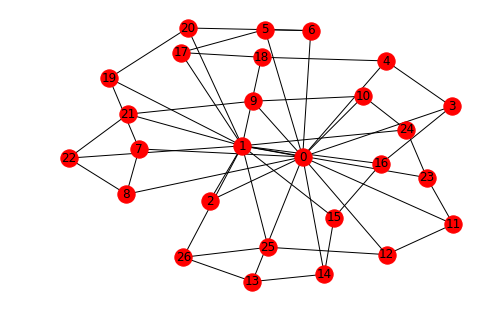

In [24]:
# Review an example

plot_given_edges(rep27[0])

# Further saturation

We could proceed in this fashion, seeking to now introduce the neighbours of vertex 2. However, this is the lowest degree vertex, so it will take longest to recognise ultimately impossible choices as such. 

Instead, we switch to a greedy climb, where at each step we select from amongst the unsaturated vertices one of highest degree (favouring smaller labels). As this may depend on the graph constructed thus-far, we are no longer able to prescribe particular adjacencies. 

In [25]:
%time rep28 = find_valid_supergraphs_greedy_sat(rep27)

2020-04-29 15:07:10.130132: 11 seed templates generated
2020-04-29 15:10:02.933991: 6281 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 12 candidates
	4 reps for 14 candidates
	5 reps for 28 candidates
	6 reps for 422 candidates
	7 reps for 423 candidates
	8 reps for 424 candidates
	9 reps for 429 candidates
	10 reps for 434 candidates
	11 reps for 435 candidates
	12 reps for 436 candidates
	13 reps for 438 candidates
	14 reps for 439 candidates
	15 reps for 440 candidates
	16 reps for 441 candidates
	17 reps for 444 candidates
	18 reps for 446 candidates
	19 reps for 448 candidates
	20 reps for 449 candidates
	21 reps for 451 candidates
	22 reps for 471 candidates
	23 reps for 474 candidates
	24 reps for 475 candidates
	25 reps for 487 candidates
	26 reps for 918 candidates
	27 reps for 919 candidates
	28 reps for 929 candidates
	29 reps for 938 candidates
	30 reps for 939 candidates
	31 reps for 979 candidates
	32 reps for 998 candidates
	33

	285 reps for 3477 candidates
	286 reps for 3482 candidates
	287 reps for 3484 candidates
	288 reps for 3485 candidates
	289 reps for 3486 candidates
	290 reps for 3492 candidates
	291 reps for 3493 candidates
	292 reps for 3497 candidates
	293 reps for 3506 candidates
	294 reps for 3510 candidates
	295 reps for 3511 candidates
	296 reps for 3512 candidates
	297 reps for 3514 candidates
	298 reps for 3515 candidates
	299 reps for 3843 candidates
	300 reps for 3860 candidates
	301 reps for 3870 candidates
	302 reps for 3894 candidates
	303 reps for 3895 candidates
	304 reps for 3896 candidates
	305 reps for 3898 candidates
	306 reps for 3899 candidates
	307 reps for 3900 candidates
	308 reps for 3905 candidates
	309 reps for 3906 candidates
	310 reps for 3907 candidates
	311 reps for 3908 candidates
	312 reps for 3909 candidates
	313 reps for 3910 candidates
	314 reps for 3914 candidates
	315 reps for 3915 candidates
	316 reps for 3916 candidates
	317 reps for 3917 candidates
	318 reps 

	586 reps for 5213 candidates
	587 reps for 5214 candidates
	588 reps for 5215 candidates
	589 reps for 5216 candidates
	590 reps for 5219 candidates
	591 reps for 5221 candidates
	592 reps for 5222 candidates
	593 reps for 5223 candidates
	594 reps for 5224 candidates
	595 reps for 5225 candidates
	596 reps for 5226 candidates
	597 reps for 5231 candidates
	598 reps for 5232 candidates
	599 reps for 5233 candidates
	600 reps for 5234 candidates
	601 reps for 5236 candidates
	602 reps for 5237 candidates
	603 reps for 5240 candidates
	604 reps for 5242 candidates
	605 reps for 5244 candidates
	606 reps for 5245 candidates
	607 reps for 5247 candidates
	608 reps for 5248 candidates
	609 reps for 5250 candidates
	610 reps for 5251 candidates
	611 reps for 5254 candidates
	612 reps for 5257 candidates
	613 reps for 5258 candidates
	614 reps for 5260 candidates
	615 reps for 5262 candidates
	616 reps for 5266 candidates
	617 reps for 5267 candidates
	618 reps for 5272 candidates
	619 reps 

In [33]:
%time rep29 = find_valid_supergraphs_greedy_sat(rep28)

2020-04-29 16:23:20.379259: 840 seed templates generated
2020-04-29 20:57:13.136491: 586886 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 4 candidates
	5 reps for 5 candidates
	6 reps for 6 candidates
	7 reps for 7 candidates
	8 reps for 8 candidates
	9 reps for 9 candidates
	10 reps for 10 candidates
	11 reps for 11 candidates
	12 reps for 12 candidates
	13 reps for 13 candidates
	14 reps for 14 candidates
	15 reps for 15 candidates
	16 reps for 16 candidates
	17 reps for 17 candidates
	18 reps for 18 candidates
	19 reps for 19 candidates
	20 reps for 20 candidates
	21 reps for 21 candidates
	22 reps for 22 candidates
	23 reps for 23 candidates
	24 reps for 24 candidates
	25 reps for 25 candidates
	26 reps for 26 candidates
	27 reps for 27 candidates
	28 reps for 28 candidates
	29 reps for 29 candidates
	30 reps for 30 candidates
	31 reps for 31 candidates
	32 reps for 32 candidates
	33 reps for 33 candidates
	34 rep

	357 reps for 363 candidates
	358 reps for 364 candidates
	359 reps for 365 candidates
	360 reps for 366 candidates
	361 reps for 367 candidates
	362 reps for 368 candidates
	363 reps for 369 candidates
	364 reps for 370 candidates
	365 reps for 371 candidates
	366 reps for 372 candidates
	367 reps for 373 candidates
	368 reps for 374 candidates
	369 reps for 375 candidates
	370 reps for 376 candidates
	371 reps for 377 candidates
	372 reps for 379 candidates
	373 reps for 380 candidates
	374 reps for 381 candidates
	375 reps for 382 candidates
	376 reps for 383 candidates
	377 reps for 384 candidates
	378 reps for 385 candidates
	379 reps for 386 candidates
	380 reps for 387 candidates
	381 reps for 388 candidates
	382 reps for 389 candidates
	383 reps for 390 candidates
	384 reps for 391 candidates
	385 reps for 392 candidates
	386 reps for 393 candidates
	387 reps for 395 candidates
	388 reps for 396 candidates
	389 reps for 397 candidates
	390 reps for 398 candidates
	391 reps for 

	698 reps for 726 candidates
	699 reps for 727 candidates
	700 reps for 728 candidates
	701 reps for 729 candidates
	702 reps for 730 candidates
	703 reps for 731 candidates
	704 reps for 732 candidates
	705 reps for 733 candidates
	706 reps for 734 candidates
	707 reps for 735 candidates
	708 reps for 736 candidates
	709 reps for 737 candidates
	710 reps for 738 candidates
	711 reps for 739 candidates
	712 reps for 740 candidates
	713 reps for 741 candidates
	714 reps for 742 candidates
	715 reps for 743 candidates
	716 reps for 745 candidates
	717 reps for 746 candidates
	718 reps for 747 candidates
	719 reps for 748 candidates
	720 reps for 749 candidates
	721 reps for 750 candidates
	722 reps for 751 candidates
	723 reps for 752 candidates
	724 reps for 753 candidates
	725 reps for 755 candidates
	726 reps for 756 candidates
	727 reps for 757 candidates
	728 reps for 758 candidates
	729 reps for 759 candidates
	730 reps for 760 candidates
	731 reps for 761 candidates
	732 reps for 

	987 reps for 1025 candidates
	988 reps for 1026 candidates
	989 reps for 1027 candidates
	990 reps for 1028 candidates
	991 reps for 1029 candidates
	992 reps for 1030 candidates
	993 reps for 1031 candidates
	994 reps for 1032 candidates
	995 reps for 1034 candidates
	996 reps for 1035 candidates
	997 reps for 1036 candidates
	998 reps for 1037 candidates
	999 reps for 1038 candidates
	1000 reps for 1039 candidates
	1001 reps for 1040 candidates
	1002 reps for 1041 candidates
	1003 reps for 1042 candidates
	1004 reps for 1043 candidates
	1005 reps for 1044 candidates
	1006 reps for 1045 candidates
	1007 reps for 1046 candidates
	1008 reps for 1047 candidates
	1009 reps for 1048 candidates
	1010 reps for 1049 candidates
	1011 reps for 1050 candidates
	1012 reps for 1051 candidates
	1013 reps for 1052 candidates
	1014 reps for 1053 candidates
	1015 reps for 1054 candidates
	1016 reps for 1055 candidates
	1017 reps for 1056 candidates
	1018 reps for 1057 candidates
	1019 reps for 1058 c

	1256 reps for 1303 candidates
	1257 reps for 1304 candidates
	1258 reps for 1305 candidates
	1259 reps for 1306 candidates
	1260 reps for 1307 candidates
	1261 reps for 1308 candidates
	1262 reps for 1310 candidates
	1263 reps for 1311 candidates
	1264 reps for 1312 candidates
	1265 reps for 1313 candidates
	1266 reps for 1314 candidates
	1267 reps for 1315 candidates
	1268 reps for 1316 candidates
	1269 reps for 1317 candidates
	1270 reps for 1318 candidates
	1271 reps for 1319 candidates
	1272 reps for 1320 candidates
	1273 reps for 1321 candidates
	1274 reps for 1323 candidates
	1275 reps for 1326 candidates
	1276 reps for 1327 candidates
	1277 reps for 1328 candidates
	1278 reps for 1329 candidates
	1279 reps for 1330 candidates
	1280 reps for 1331 candidates
	1281 reps for 1332 candidates
	1282 reps for 1333 candidates
	1283 reps for 1334 candidates
	1284 reps for 1335 candidates
	1285 reps for 1336 candidates
	1286 reps for 1337 candidates
	1287 reps for 1338 candidates
	1288 re

	1536 reps for 1608 candidates
	1537 reps for 1609 candidates
	1538 reps for 1610 candidates
	1539 reps for 1611 candidates
	1540 reps for 1612 candidates
	1541 reps for 1613 candidates
	1542 reps for 1614 candidates
	1543 reps for 1615 candidates
	1544 reps for 1616 candidates
	1545 reps for 1617 candidates
	1546 reps for 1618 candidates
	1547 reps for 1619 candidates
	1548 reps for 1620 candidates
	1549 reps for 1621 candidates
	1550 reps for 1622 candidates
	1551 reps for 1623 candidates
	1552 reps for 1624 candidates
	1553 reps for 1625 candidates
	1554 reps for 1626 candidates
	1555 reps for 1627 candidates
	1556 reps for 1628 candidates
	1557 reps for 1629 candidates
	1558 reps for 1630 candidates
	1559 reps for 1631 candidates
	1560 reps for 1632 candidates
	1561 reps for 1633 candidates
	1562 reps for 1634 candidates
	1563 reps for 1635 candidates
	1564 reps for 1636 candidates
	1565 reps for 1637 candidates
	1566 reps for 1638 candidates
	1567 reps for 1639 candidates
	1568 re

	1820 reps for 1893 candidates
	1821 reps for 1894 candidates
	1822 reps for 1895 candidates
	1823 reps for 1896 candidates
	1824 reps for 1897 candidates
	1825 reps for 1898 candidates
	1826 reps for 1899 candidates
	1827 reps for 1900 candidates
	1828 reps for 1901 candidates
	1829 reps for 1902 candidates
	1830 reps for 1903 candidates
	1831 reps for 1904 candidates
	1832 reps for 1905 candidates
	1833 reps for 1906 candidates
	1834 reps for 1907 candidates
	1835 reps for 1908 candidates
	1836 reps for 1909 candidates
	1837 reps for 1910 candidates
	1838 reps for 1911 candidates
	1839 reps for 1912 candidates
	1840 reps for 1914 candidates
	1841 reps for 1915 candidates
	1842 reps for 1917 candidates
	1843 reps for 1918 candidates
	1844 reps for 1919 candidates
	1845 reps for 1920 candidates
	1846 reps for 1921 candidates
	1847 reps for 1922 candidates
	1848 reps for 1923 candidates
	1849 reps for 1924 candidates
	1850 reps for 1925 candidates
	1851 reps for 1926 candidates
	1852 re

	2106 reps for 2193 candidates
	2107 reps for 2194 candidates
	2108 reps for 2195 candidates
	2109 reps for 2196 candidates
	2110 reps for 2197 candidates
	2111 reps for 2198 candidates
	2112 reps for 2199 candidates
	2113 reps for 2200 candidates
	2114 reps for 2201 candidates
	2115 reps for 2202 candidates
	2116 reps for 2203 candidates
	2117 reps for 2204 candidates
	2118 reps for 2205 candidates
	2119 reps for 2206 candidates
	2120 reps for 2207 candidates
	2121 reps for 2208 candidates
	2122 reps for 2209 candidates
	2123 reps for 2210 candidates
	2124 reps for 2211 candidates
	2125 reps for 2212 candidates
	2126 reps for 2214 candidates
	2127 reps for 2215 candidates
	2128 reps for 2216 candidates
	2129 reps for 2217 candidates
	2130 reps for 2218 candidates
	2131 reps for 2219 candidates
	2132 reps for 2220 candidates
	2133 reps for 2221 candidates
	2134 reps for 2222 candidates
	2135 reps for 2223 candidates
	2136 reps for 2225 candidates
	2137 reps for 2226 candidates
	2138 re

	2379 reps for 2487 candidates
	2380 reps for 2488 candidates
	2381 reps for 2489 candidates
	2382 reps for 2490 candidates
	2383 reps for 2491 candidates
	2384 reps for 2492 candidates
	2385 reps for 2493 candidates
	2386 reps for 2494 candidates
	2387 reps for 2495 candidates
	2388 reps for 2496 candidates
	2389 reps for 2497 candidates
	2390 reps for 2498 candidates
	2391 reps for 2499 candidates
	2392 reps for 2500 candidates
	2393 reps for 2501 candidates
	2394 reps for 2502 candidates
	2395 reps for 2503 candidates
	2396 reps for 2504 candidates
	2397 reps for 2505 candidates
	2398 reps for 2506 candidates
	2399 reps for 2507 candidates
	2400 reps for 2508 candidates
	2401 reps for 2509 candidates
	2402 reps for 2510 candidates
	2403 reps for 2511 candidates
	2404 reps for 2512 candidates
	2405 reps for 2513 candidates
	2406 reps for 2514 candidates
	2407 reps for 2515 candidates
	2408 reps for 2516 candidates
	2409 reps for 2517 candidates
	2410 reps for 2518 candidates
	2411 re

	2662 reps for 2770 candidates
	2663 reps for 2771 candidates
	2664 reps for 2772 candidates
	2665 reps for 2773 candidates
	2666 reps for 2774 candidates
	2667 reps for 2775 candidates
	2668 reps for 2776 candidates
	2669 reps for 2777 candidates
	2670 reps for 2778 candidates
	2671 reps for 2779 candidates
	2672 reps for 2780 candidates
	2673 reps for 2781 candidates
	2674 reps for 2782 candidates
	2675 reps for 2783 candidates
	2676 reps for 2784 candidates
	2677 reps for 2785 candidates
	2678 reps for 2786 candidates
	2679 reps for 2787 candidates
	2680 reps for 2788 candidates
	2681 reps for 2789 candidates
	2682 reps for 2790 candidates
	2683 reps for 2791 candidates
	2684 reps for 2792 candidates
	2685 reps for 2793 candidates
	2686 reps for 2794 candidates
	2687 reps for 2795 candidates
	2688 reps for 2796 candidates
	2689 reps for 2797 candidates
	2690 reps for 2798 candidates
	2691 reps for 2799 candidates
	2692 reps for 2800 candidates
	2693 reps for 2801 candidates
	2694 re

	2945 reps for 3053 candidates
	2946 reps for 3054 candidates
	2947 reps for 3055 candidates
	2948 reps for 3056 candidates
	2949 reps for 3057 candidates
	2950 reps for 3058 candidates
	2951 reps for 3059 candidates
	2952 reps for 3060 candidates
	2953 reps for 3061 candidates
	2954 reps for 3062 candidates
	2955 reps for 3063 candidates
	2956 reps for 3064 candidates
	2957 reps for 3065 candidates
	2958 reps for 3066 candidates
	2959 reps for 3067 candidates
	2960 reps for 3068 candidates
	2961 reps for 3069 candidates
	2962 reps for 3070 candidates
	2963 reps for 3071 candidates
	2964 reps for 3072 candidates
	2965 reps for 3073 candidates
	2966 reps for 3074 candidates
	2967 reps for 3075 candidates
	2968 reps for 3076 candidates
	2969 reps for 3077 candidates
	2970 reps for 3078 candidates
	2971 reps for 3079 candidates
	2972 reps for 3080 candidates
	2973 reps for 3081 candidates
	2974 reps for 3082 candidates
	2975 reps for 3083 candidates
	2976 reps for 3084 candidates
	2977 re

	3219 reps for 3332 candidates
	3220 reps for 3333 candidates
	3221 reps for 3334 candidates
	3222 reps for 3335 candidates
	3223 reps for 3336 candidates
	3224 reps for 3337 candidates
	3225 reps for 3338 candidates
	3226 reps for 3339 candidates
	3227 reps for 3340 candidates
	3228 reps for 3341 candidates
	3229 reps for 3342 candidates
	3230 reps for 3343 candidates
	3231 reps for 3344 candidates
	3232 reps for 3345 candidates
	3233 reps for 3346 candidates
	3234 reps for 3347 candidates
	3235 reps for 3348 candidates
	3236 reps for 3349 candidates
	3237 reps for 3350 candidates
	3238 reps for 3351 candidates
	3239 reps for 3352 candidates
	3240 reps for 3353 candidates
	3241 reps for 3354 candidates
	3242 reps for 3355 candidates
	3243 reps for 3356 candidates
	3244 reps for 3357 candidates
	3245 reps for 3358 candidates
	3246 reps for 3359 candidates
	3247 reps for 3360 candidates
	3248 reps for 3361 candidates
	3249 reps for 3362 candidates
	3250 reps for 3363 candidates
	3251 re

	3498 reps for 3620 candidates
	3499 reps for 3621 candidates
	3500 reps for 3622 candidates
	3501 reps for 3623 candidates
	3502 reps for 3624 candidates
	3503 reps for 3625 candidates
	3504 reps for 3626 candidates
	3505 reps for 3627 candidates
	3506 reps for 3628 candidates
	3507 reps for 3629 candidates
	3508 reps for 3630 candidates
	3509 reps for 3631 candidates
	3510 reps for 3632 candidates
	3511 reps for 3633 candidates
	3512 reps for 3634 candidates
	3513 reps for 3635 candidates
	3514 reps for 3636 candidates
	3515 reps for 3637 candidates
	3516 reps for 3638 candidates
	3517 reps for 3639 candidates
	3518 reps for 3640 candidates
	3519 reps for 3641 candidates
	3520 reps for 3642 candidates
	3521 reps for 3643 candidates
	3522 reps for 3644 candidates
	3523 reps for 3645 candidates
	3524 reps for 3646 candidates
	3525 reps for 3647 candidates
	3526 reps for 3648 candidates
	3527 reps for 3649 candidates
	3528 reps for 3650 candidates
	3529 reps for 3651 candidates
	3530 re

	3764 reps for 3904 candidates
	3765 reps for 3905 candidates
	3766 reps for 3906 candidates
	3767 reps for 3907 candidates
	3768 reps for 3908 candidates
	3769 reps for 3909 candidates
	3770 reps for 3910 candidates
	3771 reps for 3911 candidates
	3772 reps for 3912 candidates
	3773 reps for 3913 candidates
	3774 reps for 3914 candidates
	3775 reps for 3915 candidates
	3776 reps for 3916 candidates
	3777 reps for 3917 candidates
	3778 reps for 3918 candidates
	3779 reps for 3919 candidates
	3780 reps for 3920 candidates
	3781 reps for 3921 candidates
	3782 reps for 3922 candidates
	3783 reps for 3923 candidates
	3784 reps for 3924 candidates
	3785 reps for 3925 candidates
	3786 reps for 3926 candidates
	3787 reps for 3927 candidates
	3788 reps for 3928 candidates
	3789 reps for 3929 candidates
	3790 reps for 3930 candidates
	3791 reps for 3931 candidates
	3792 reps for 3932 candidates
	3793 reps for 3933 candidates
	3794 reps for 3934 candidates
	3795 reps for 3935 candidates
	3796 re

	4040 reps for 4192 candidates
	4041 reps for 4193 candidates
	4042 reps for 4194 candidates
	4043 reps for 4195 candidates
	4044 reps for 4196 candidates
	4045 reps for 4197 candidates
	4046 reps for 4198 candidates
	4047 reps for 4199 candidates
	4048 reps for 4200 candidates
	4049 reps for 4201 candidates
	4050 reps for 4202 candidates
	4051 reps for 4203 candidates
	4052 reps for 4204 candidates
	4053 reps for 4205 candidates
	4054 reps for 4206 candidates
	4055 reps for 4207 candidates
	4056 reps for 4208 candidates
	4057 reps for 4209 candidates
	4058 reps for 4210 candidates
	4059 reps for 4211 candidates
	4060 reps for 4212 candidates
	4061 reps for 4213 candidates
	4062 reps for 4214 candidates
	4063 reps for 4215 candidates
	4064 reps for 4216 candidates
	4065 reps for 4217 candidates
	4066 reps for 4218 candidates
	4067 reps for 4219 candidates
	4068 reps for 4220 candidates
	4069 reps for 4221 candidates
	4070 reps for 4222 candidates
	4071 reps for 4223 candidates
	4072 re

	4317 reps for 4469 candidates
	4318 reps for 4470 candidates
	4319 reps for 4471 candidates
	4320 reps for 4472 candidates
	4321 reps for 4473 candidates
	4322 reps for 4474 candidates
	4323 reps for 4475 candidates
	4324 reps for 4476 candidates
	4325 reps for 4477 candidates
	4326 reps for 4478 candidates
	4327 reps for 4479 candidates
	4328 reps for 4480 candidates
	4329 reps for 4481 candidates
	4330 reps for 4482 candidates
	4331 reps for 4483 candidates
	4332 reps for 4484 candidates
	4333 reps for 4485 candidates
	4334 reps for 4486 candidates
	4335 reps for 4487 candidates
	4336 reps for 4488 candidates
	4337 reps for 4489 candidates
	4338 reps for 4490 candidates
	4339 reps for 4491 candidates
	4340 reps for 4492 candidates
	4341 reps for 4493 candidates
	4342 reps for 4494 candidates
	4343 reps for 4495 candidates
	4344 reps for 4496 candidates
	4345 reps for 4497 candidates
	4346 reps for 4498 candidates
	4347 reps for 4499 candidates
	4348 reps for 4500 candidates
	4349 re

	4592 reps for 4744 candidates
	4593 reps for 4745 candidates
	4594 reps for 4746 candidates
	4595 reps for 4747 candidates
	4596 reps for 4748 candidates
	4597 reps for 4749 candidates
	4598 reps for 4750 candidates
	4599 reps for 4751 candidates
	4600 reps for 4752 candidates
	4601 reps for 4753 candidates
	4602 reps for 4754 candidates
	4603 reps for 4755 candidates
	4604 reps for 4756 candidates
	4605 reps for 4757 candidates
	4606 reps for 4758 candidates
	4607 reps for 4759 candidates
	4608 reps for 4760 candidates
	4609 reps for 4761 candidates
	4610 reps for 4762 candidates
	4611 reps for 4763 candidates
	4612 reps for 4764 candidates
	4613 reps for 4765 candidates
	4614 reps for 4766 candidates
	4615 reps for 4767 candidates
	4616 reps for 4768 candidates
	4617 reps for 4769 candidates
	4618 reps for 4770 candidates
	4619 reps for 4771 candidates
	4620 reps for 4772 candidates
	4621 reps for 4773 candidates
	4622 reps for 4774 candidates
	4623 reps for 4775 candidates
	4624 re

	4865 reps for 5021 candidates
	4866 reps for 5022 candidates
	4867 reps for 5023 candidates
	4868 reps for 5024 candidates
	4869 reps for 5025 candidates
	4870 reps for 5026 candidates
	4871 reps for 5027 candidates
	4872 reps for 5028 candidates
	4873 reps for 5029 candidates
	4874 reps for 5030 candidates
	4875 reps for 5031 candidates
	4876 reps for 5032 candidates
	4877 reps for 5033 candidates
	4878 reps for 5034 candidates
	4879 reps for 5035 candidates
	4880 reps for 5036 candidates
	4881 reps for 5037 candidates
	4882 reps for 5038 candidates
	4883 reps for 5039 candidates
	4884 reps for 5040 candidates
	4885 reps for 5041 candidates
	4886 reps for 5042 candidates
	4887 reps for 5043 candidates
	4888 reps for 5044 candidates
	4889 reps for 5045 candidates
	4890 reps for 5046 candidates
	4891 reps for 5047 candidates
	4892 reps for 5048 candidates
	4893 reps for 5049 candidates
	4894 reps for 5050 candidates
	4895 reps for 5051 candidates
	4896 reps for 5052 candidates
	4897 re

	5137 reps for 5296 candidates
	5138 reps for 5297 candidates
	5139 reps for 5298 candidates
	5140 reps for 5299 candidates
	5141 reps for 5300 candidates
	5142 reps for 5301 candidates
	5143 reps for 5302 candidates
	5144 reps for 5303 candidates
	5145 reps for 5304 candidates
	5146 reps for 5305 candidates
	5147 reps for 5306 candidates
	5148 reps for 5307 candidates
	5149 reps for 5308 candidates
	5150 reps for 5309 candidates
	5151 reps for 5310 candidates
	5152 reps for 5311 candidates
	5153 reps for 5312 candidates
	5154 reps for 5313 candidates
	5155 reps for 5314 candidates
	5156 reps for 5315 candidates
	5157 reps for 5316 candidates
	5158 reps for 5317 candidates
	5159 reps for 5318 candidates
	5160 reps for 5319 candidates
	5161 reps for 5320 candidates
	5162 reps for 5321 candidates
	5163 reps for 5322 candidates
	5164 reps for 5323 candidates
	5165 reps for 5324 candidates
	5166 reps for 5325 candidates
	5167 reps for 5326 candidates
	5168 reps for 5327 candidates
	5169 re

	5411 reps for 5570 candidates
	5412 reps for 5571 candidates
	5413 reps for 5572 candidates
	5414 reps for 5573 candidates
	5415 reps for 5574 candidates
	5416 reps for 5575 candidates
	5417 reps for 5576 candidates
	5418 reps for 5577 candidates
	5419 reps for 5578 candidates
	5420 reps for 5579 candidates
	5421 reps for 5580 candidates
	5422 reps for 5581 candidates
	5423 reps for 5582 candidates
	5424 reps for 5583 candidates
	5425 reps for 5584 candidates
	5426 reps for 5585 candidates
	5427 reps for 5586 candidates
	5428 reps for 5587 candidates
	5429 reps for 5588 candidates
	5430 reps for 5589 candidates
	5431 reps for 5590 candidates
	5432 reps for 5591 candidates
	5433 reps for 5592 candidates
	5434 reps for 5593 candidates
	5435 reps for 5594 candidates
	5436 reps for 5595 candidates
	5437 reps for 5596 candidates
	5438 reps for 5597 candidates
	5439 reps for 5598 candidates
	5440 reps for 5599 candidates
	5441 reps for 5600 candidates
	5442 reps for 5601 candidates
	5443 re

	5682 reps for 5844 candidates
	5683 reps for 5845 candidates
	5684 reps for 5846 candidates
	5685 reps for 5847 candidates
	5686 reps for 5848 candidates
	5687 reps for 5849 candidates
	5688 reps for 5850 candidates
	5689 reps for 5851 candidates
	5690 reps for 5852 candidates
	5691 reps for 5853 candidates
	5692 reps for 5854 candidates
	5693 reps for 5855 candidates
	5694 reps for 5856 candidates
	5695 reps for 5857 candidates
	5696 reps for 5858 candidates
	5697 reps for 5859 candidates
	5698 reps for 5860 candidates
	5699 reps for 5861 candidates
	5700 reps for 5862 candidates
	5701 reps for 5863 candidates
	5702 reps for 5864 candidates
	5703 reps for 5865 candidates
	5704 reps for 5866 candidates
	5705 reps for 5867 candidates
	5706 reps for 5868 candidates
	5707 reps for 5869 candidates
	5708 reps for 5870 candidates
	5709 reps for 5871 candidates
	5710 reps for 5872 candidates
	5711 reps for 5873 candidates
	5712 reps for 5874 candidates
	5713 reps for 5875 candidates
	5714 re

	5952 reps for 6114 candidates
	5953 reps for 6115 candidates
	5954 reps for 6116 candidates
	5955 reps for 6117 candidates
	5956 reps for 6118 candidates
	5957 reps for 6119 candidates
	5958 reps for 6120 candidates
	5959 reps for 6121 candidates
	5960 reps for 6122 candidates
	5961 reps for 6123 candidates
	5962 reps for 6124 candidates
	5963 reps for 6125 candidates
	5964 reps for 6126 candidates
	5965 reps for 6127 candidates
	5966 reps for 6128 candidates
	5967 reps for 6129 candidates
	5968 reps for 6130 candidates
	5969 reps for 6131 candidates
	5970 reps for 6132 candidates
	5971 reps for 6133 candidates
	5972 reps for 6134 candidates
	5973 reps for 6135 candidates
	5974 reps for 6136 candidates
	5975 reps for 6137 candidates
	5976 reps for 6138 candidates
	5977 reps for 6139 candidates
	5978 reps for 6140 candidates
	5979 reps for 6141 candidates
	5980 reps for 6142 candidates
	5981 reps for 6143 candidates
	5982 reps for 6144 candidates
	5983 reps for 6145 candidates
	5984 re

	6224 reps for 6390 candidates
	6225 reps for 6391 candidates
	6226 reps for 6392 candidates
	6227 reps for 6393 candidates
	6228 reps for 6394 candidates
	6229 reps for 6395 candidates
	6230 reps for 6396 candidates
	6231 reps for 6397 candidates
	6232 reps for 6398 candidates
	6233 reps for 6399 candidates
	6234 reps for 6400 candidates
	6235 reps for 6401 candidates
	6236 reps for 6402 candidates
	6237 reps for 6403 candidates
	6238 reps for 6404 candidates
	6239 reps for 6405 candidates
	6240 reps for 6406 candidates
	6241 reps for 6407 candidates
	6242 reps for 6408 candidates
	6243 reps for 6409 candidates
	6244 reps for 6410 candidates
	6245 reps for 6411 candidates
	6246 reps for 6412 candidates
	6247 reps for 6413 candidates
	6248 reps for 6414 candidates
	6249 reps for 6415 candidates
	6250 reps for 6416 candidates
	6251 reps for 6417 candidates
	6252 reps for 6418 candidates
	6253 reps for 6419 candidates
	6254 reps for 6420 candidates
	6255 reps for 6421 candidates
	6256 re

	6490 reps for 6659 candidates
	6491 reps for 6660 candidates
	6492 reps for 6661 candidates
	6493 reps for 6662 candidates
	6494 reps for 6663 candidates
	6495 reps for 6664 candidates
	6496 reps for 6665 candidates
	6497 reps for 6666 candidates
	6498 reps for 6667 candidates
	6499 reps for 6668 candidates
	6500 reps for 6669 candidates
	6501 reps for 6670 candidates
	6502 reps for 6671 candidates
	6503 reps for 6672 candidates
	6504 reps for 6673 candidates
	6505 reps for 6674 candidates
	6506 reps for 6675 candidates
	6507 reps for 6676 candidates
	6508 reps for 6677 candidates
	6509 reps for 6678 candidates
	6510 reps for 6679 candidates
	6511 reps for 6680 candidates
	6512 reps for 6681 candidates
	6513 reps for 6682 candidates
	6514 reps for 6683 candidates
	6515 reps for 6684 candidates
	6516 reps for 6685 candidates
	6517 reps for 6686 candidates
	6518 reps for 6687 candidates
	6519 reps for 6688 candidates
	6520 reps for 6689 candidates
	6521 reps for 6691 candidates
	6522 re

	6757 reps for 6944 candidates
	6758 reps for 6945 candidates
	6759 reps for 6946 candidates
	6760 reps for 6947 candidates
	6761 reps for 6949 candidates
	6762 reps for 6950 candidates
	6763 reps for 6951 candidates
	6764 reps for 6952 candidates
	6765 reps for 6953 candidates
	6766 reps for 6954 candidates
	6767 reps for 6955 candidates
	6768 reps for 6956 candidates
	6769 reps for 6957 candidates
	6770 reps for 6958 candidates
	6771 reps for 6959 candidates
	6772 reps for 6961 candidates
	6773 reps for 6962 candidates
	6774 reps for 6963 candidates
	6775 reps for 6964 candidates
	6776 reps for 6965 candidates
	6777 reps for 6966 candidates
	6778 reps for 6967 candidates
	6779 reps for 6968 candidates
	6780 reps for 6969 candidates
	6781 reps for 6970 candidates
	6782 reps for 6971 candidates
	6783 reps for 6972 candidates
	6784 reps for 6973 candidates
	6785 reps for 6974 candidates
	6786 reps for 6976 candidates
	6787 reps for 6977 candidates
	6788 reps for 6978 candidates
	6789 re

	7022 reps for 7228 candidates
	7023 reps for 7229 candidates
	7024 reps for 7230 candidates
	7025 reps for 7231 candidates
	7026 reps for 7232 candidates
	7027 reps for 7233 candidates
	7028 reps for 7234 candidates
	7029 reps for 7235 candidates
	7030 reps for 7236 candidates
	7031 reps for 7237 candidates
	7032 reps for 7238 candidates
	7033 reps for 7239 candidates
	7034 reps for 7240 candidates
	7035 reps for 7241 candidates
	7036 reps for 7242 candidates
	7037 reps for 7243 candidates
	7038 reps for 7244 candidates
	7039 reps for 7245 candidates
	7040 reps for 7246 candidates
	7041 reps for 7248 candidates
	7042 reps for 7249 candidates
	7043 reps for 7250 candidates
	7044 reps for 7251 candidates
	7045 reps for 7252 candidates
	7046 reps for 7253 candidates
	7047 reps for 7254 candidates
	7048 reps for 7255 candidates
	7049 reps for 7256 candidates
	7050 reps for 7257 candidates
	7051 reps for 7258 candidates
	7052 reps for 7259 candidates
	7053 reps for 7260 candidates
	7054 re

	7293 reps for 7507 candidates
	7294 reps for 7508 candidates
	7295 reps for 7509 candidates
	7296 reps for 7510 candidates
	7297 reps for 7511 candidates
	7298 reps for 7512 candidates
	7299 reps for 7513 candidates
	7300 reps for 7515 candidates
	7301 reps for 7516 candidates
	7302 reps for 7517 candidates
	7303 reps for 7518 candidates
	7304 reps for 7519 candidates
	7305 reps for 7520 candidates
	7306 reps for 7521 candidates
	7307 reps for 7522 candidates
	7308 reps for 7523 candidates
	7309 reps for 7524 candidates
	7310 reps for 7525 candidates
	7311 reps for 7526 candidates
	7312 reps for 7528 candidates
	7313 reps for 7529 candidates
	7314 reps for 7530 candidates
	7315 reps for 7531 candidates
	7316 reps for 7532 candidates
	7317 reps for 7533 candidates
	7318 reps for 7534 candidates
	7319 reps for 7535 candidates
	7320 reps for 7536 candidates
	7321 reps for 7537 candidates
	7322 reps for 7538 candidates
	7323 reps for 7539 candidates
	7324 reps for 7540 candidates
	7325 re

	7559 reps for 7801 candidates
	7560 reps for 7802 candidates
	7561 reps for 7803 candidates
	7562 reps for 7804 candidates
	7563 reps for 7805 candidates
	7564 reps for 7809 candidates
	7565 reps for 7810 candidates
	7566 reps for 7811 candidates
	7567 reps for 7812 candidates
	7568 reps for 7813 candidates
	7569 reps for 7814 candidates
	7570 reps for 7815 candidates
	7571 reps for 7816 candidates
	7572 reps for 7817 candidates
	7573 reps for 7818 candidates
	7574 reps for 7819 candidates
	7575 reps for 7820 candidates
	7576 reps for 7821 candidates
	7577 reps for 7822 candidates
	7578 reps for 7823 candidates
	7579 reps for 7824 candidates
	7580 reps for 7825 candidates
	7581 reps for 7826 candidates
	7582 reps for 7827 candidates
	7583 reps for 7828 candidates
	7584 reps for 7829 candidates
	7585 reps for 7830 candidates
	7586 reps for 7831 candidates
	7587 reps for 7832 candidates
	7588 reps for 7833 candidates
	7589 reps for 7834 candidates
	7590 reps for 7835 candidates
	7591 re

	7828 reps for 8088 candidates
	7829 reps for 8089 candidates
	7830 reps for 8090 candidates
	7831 reps for 8091 candidates
	7832 reps for 8092 candidates
	7833 reps for 8093 candidates
	7834 reps for 8094 candidates
	7835 reps for 8095 candidates
	7836 reps for 8096 candidates
	7837 reps for 8097 candidates
	7838 reps for 8098 candidates
	7839 reps for 8099 candidates
	7840 reps for 8100 candidates
	7841 reps for 8101 candidates
	7842 reps for 8102 candidates
	7843 reps for 8103 candidates
	7844 reps for 8104 candidates
	7845 reps for 8105 candidates
	7846 reps for 8106 candidates
	7847 reps for 8107 candidates
	7848 reps for 8108 candidates
	7849 reps for 8109 candidates
	7850 reps for 8110 candidates
	7851 reps for 8111 candidates
	7852 reps for 8112 candidates
	7853 reps for 8113 candidates
	7854 reps for 8114 candidates
	7855 reps for 8115 candidates
	7856 reps for 8116 candidates
	7857 reps for 8117 candidates
	7858 reps for 8118 candidates
	7859 reps for 8119 candidates
	7860 re

	8100 reps for 8360 candidates
	8101 reps for 8361 candidates
	8102 reps for 8362 candidates
	8103 reps for 8363 candidates
	8104 reps for 8364 candidates
	8105 reps for 8365 candidates
	8106 reps for 8366 candidates
	8107 reps for 8367 candidates
	8108 reps for 8368 candidates
	8109 reps for 8369 candidates
	8110 reps for 8370 candidates
	8111 reps for 8371 candidates
	8112 reps for 8372 candidates
	8113 reps for 8373 candidates
	8114 reps for 8374 candidates
	8115 reps for 8375 candidates
	8116 reps for 8376 candidates
	8117 reps for 8377 candidates
	8118 reps for 8378 candidates
	8119 reps for 8379 candidates
	8120 reps for 8380 candidates
	8121 reps for 8381 candidates
	8122 reps for 8382 candidates
	8123 reps for 8383 candidates
	8124 reps for 8384 candidates
	8125 reps for 8385 candidates
	8126 reps for 8386 candidates
	8127 reps for 8387 candidates
	8128 reps for 8388 candidates
	8129 reps for 8389 candidates
	8130 reps for 8390 candidates
	8131 reps for 8391 candidates
	8132 re

	8369 reps for 8642 candidates
	8370 reps for 8643 candidates
	8371 reps for 8646 candidates
	8372 reps for 8647 candidates
	8373 reps for 8648 candidates
	8374 reps for 8649 candidates
	8375 reps for 8650 candidates
	8376 reps for 8651 candidates
	8377 reps for 8652 candidates
	8378 reps for 8653 candidates
	8379 reps for 8654 candidates
	8380 reps for 8655 candidates
	8381 reps for 8656 candidates
	8382 reps for 8657 candidates
	8383 reps for 8658 candidates
	8384 reps for 8659 candidates
	8385 reps for 8660 candidates
	8386 reps for 8661 candidates
	8387 reps for 8662 candidates
	8388 reps for 8663 candidates
	8389 reps for 8664 candidates
	8390 reps for 8665 candidates
	8391 reps for 8666 candidates
	8392 reps for 8667 candidates
	8393 reps for 8668 candidates
	8394 reps for 8669 candidates
	8395 reps for 8670 candidates
	8396 reps for 8671 candidates
	8397 reps for 8672 candidates
	8398 reps for 8673 candidates
	8399 reps for 8674 candidates
	8400 reps for 8675 candidates
	8401 re

	8634 reps for 8909 candidates
	8635 reps for 8910 candidates
	8636 reps for 8911 candidates
	8637 reps for 8912 candidates
	8638 reps for 8913 candidates
	8639 reps for 8914 candidates
	8640 reps for 8915 candidates
	8641 reps for 8916 candidates
	8642 reps for 8917 candidates
	8643 reps for 8918 candidates
	8644 reps for 8919 candidates
	8645 reps for 8920 candidates
	8646 reps for 8921 candidates
	8647 reps for 8922 candidates
	8648 reps for 8923 candidates
	8649 reps for 8924 candidates
	8650 reps for 8925 candidates
	8651 reps for 8926 candidates
	8652 reps for 8927 candidates
	8653 reps for 8928 candidates
	8654 reps for 8929 candidates
	8655 reps for 8930 candidates
	8656 reps for 8931 candidates
	8657 reps for 8932 candidates
	8658 reps for 8933 candidates
	8659 reps for 8934 candidates
	8660 reps for 8935 candidates
	8661 reps for 8936 candidates
	8662 reps for 8937 candidates
	8663 reps for 8938 candidates
	8664 reps for 8939 candidates
	8665 reps for 8940 candidates
	8666 re

	8900 reps for 9175 candidates
	8901 reps for 9176 candidates
	8902 reps for 9177 candidates
	8903 reps for 9178 candidates
	8904 reps for 9179 candidates
	8905 reps for 9180 candidates
	8906 reps for 9181 candidates
	8907 reps for 9182 candidates
	8908 reps for 9183 candidates
	8909 reps for 9184 candidates
	8910 reps for 9185 candidates
	8911 reps for 9186 candidates
	8912 reps for 9187 candidates
	8913 reps for 9188 candidates
	8914 reps for 9189 candidates
	8915 reps for 9190 candidates
	8916 reps for 9191 candidates
	8917 reps for 9192 candidates
	8918 reps for 9193 candidates
	8919 reps for 9194 candidates
	8920 reps for 9195 candidates
	8921 reps for 9196 candidates
	8922 reps for 9197 candidates
	8923 reps for 9198 candidates
	8924 reps for 9199 candidates
	8925 reps for 9200 candidates
	8926 reps for 9201 candidates
	8927 reps for 9202 candidates
	8928 reps for 9203 candidates
	8929 reps for 9204 candidates
	8930 reps for 9205 candidates
	8931 reps for 9206 candidates
	8932 re

	9168 reps for 9454 candidates
	9169 reps for 9455 candidates
	9170 reps for 9456 candidates
	9171 reps for 9457 candidates
	9172 reps for 9458 candidates
	9173 reps for 9459 candidates
	9174 reps for 9460 candidates
	9175 reps for 9461 candidates
	9176 reps for 9462 candidates
	9177 reps for 9463 candidates
	9178 reps for 9464 candidates
	9179 reps for 9465 candidates
	9180 reps for 9466 candidates
	9181 reps for 9467 candidates
	9182 reps for 9468 candidates
	9183 reps for 9469 candidates
	9184 reps for 9471 candidates
	9185 reps for 9472 candidates
	9186 reps for 9473 candidates
	9187 reps for 9474 candidates
	9188 reps for 9475 candidates
	9189 reps for 9476 candidates
	9190 reps for 9477 candidates
	9191 reps for 9478 candidates
	9192 reps for 9479 candidates
	9193 reps for 9480 candidates
	9194 reps for 9481 candidates
	9195 reps for 9482 candidates
	9196 reps for 9483 candidates
	9197 reps for 9484 candidates
	9198 reps for 9485 candidates
	9199 reps for 9486 candidates
	9200 re

	9439 reps for 9726 candidates
	9440 reps for 9727 candidates
	9441 reps for 9728 candidates
	9442 reps for 9729 candidates
	9443 reps for 9730 candidates
	9444 reps for 9731 candidates
	9445 reps for 9732 candidates
	9446 reps for 9733 candidates
	9447 reps for 9734 candidates
	9448 reps for 9735 candidates
	9449 reps for 9736 candidates
	9450 reps for 9737 candidates
	9451 reps for 9738 candidates
	9452 reps for 9739 candidates
	9453 reps for 9740 candidates
	9454 reps for 9741 candidates
	9455 reps for 9742 candidates
	9456 reps for 9743 candidates
	9457 reps for 9744 candidates
	9458 reps for 9745 candidates
	9459 reps for 9746 candidates
	9460 reps for 9747 candidates
	9461 reps for 9748 candidates
	9462 reps for 9749 candidates
	9463 reps for 9750 candidates
	9464 reps for 9751 candidates
	9465 reps for 9752 candidates
	9466 reps for 9753 candidates
	9467 reps for 9754 candidates
	9468 reps for 9755 candidates
	9469 reps for 9756 candidates
	9470 reps for 9757 candidates
	9471 re

	9704 reps for 9991 candidates
	9705 reps for 9992 candidates
	9706 reps for 9993 candidates
	9707 reps for 9994 candidates
	9708 reps for 9995 candidates
	9709 reps for 9996 candidates
	9710 reps for 9997 candidates
	9711 reps for 9998 candidates
	9712 reps for 9999 candidates
	9713 reps for 10000 candidates
	9714 reps for 10001 candidates
	9715 reps for 10002 candidates
	9716 reps for 10003 candidates
	9717 reps for 10004 candidates
	9718 reps for 10005 candidates
	9719 reps for 10006 candidates
	9720 reps for 10007 candidates
	9721 reps for 10008 candidates
	9722 reps for 10009 candidates
	9723 reps for 10010 candidates
	9724 reps for 10011 candidates
	9725 reps for 10012 candidates
	9726 reps for 10013 candidates
	9727 reps for 10014 candidates
	9728 reps for 10015 candidates
	9729 reps for 10016 candidates
	9730 reps for 10017 candidates
	9731 reps for 10018 candidates
	9732 reps for 10019 candidates
	9733 reps for 10020 candidates
	9734 reps for 10021 candidates
	9735 reps for 10

	9963 reps for 10262 candidates
	9964 reps for 10263 candidates
	9965 reps for 10264 candidates
	9966 reps for 10265 candidates
	9967 reps for 10266 candidates
	9968 reps for 10267 candidates
	9969 reps for 10268 candidates
	9970 reps for 10269 candidates
	9971 reps for 10270 candidates
	9972 reps for 10271 candidates
	9973 reps for 10272 candidates
	9974 reps for 10273 candidates
	9975 reps for 10275 candidates
	9976 reps for 10276 candidates
	9977 reps for 10277 candidates
	9978 reps for 10278 candidates
	9979 reps for 10279 candidates
	9980 reps for 10280 candidates
	9981 reps for 10281 candidates
	9982 reps for 10282 candidates
	9983 reps for 10283 candidates
	9984 reps for 10284 candidates
	9985 reps for 10285 candidates
	9986 reps for 10286 candidates
	9987 reps for 10287 candidates
	9988 reps for 10288 candidates
	9989 reps for 10289 candidates
	9990 reps for 10290 candidates
	9991 reps for 10291 candidates
	9992 reps for 10292 candidates
	9993 reps for 10293 candidates
	9994 re

	10215 reps for 10517 candidates
	10216 reps for 10518 candidates
	10217 reps for 10519 candidates
	10218 reps for 10520 candidates
	10219 reps for 10521 candidates
	10220 reps for 10522 candidates
	10221 reps for 10523 candidates
	10222 reps for 10524 candidates
	10223 reps for 10525 candidates
	10224 reps for 10526 candidates
	10225 reps for 10527 candidates
	10226 reps for 10528 candidates
	10227 reps for 10529 candidates
	10228 reps for 10530 candidates
	10229 reps for 10531 candidates
	10230 reps for 10532 candidates
	10231 reps for 10533 candidates
	10232 reps for 10534 candidates
	10233 reps for 10535 candidates
	10234 reps for 10536 candidates
	10235 reps for 10537 candidates
	10236 reps for 10538 candidates
	10237 reps for 10539 candidates
	10238 reps for 10540 candidates
	10239 reps for 10541 candidates
	10240 reps for 10542 candidates
	10241 reps for 10543 candidates
	10242 reps for 10544 candidates
	10243 reps for 10545 candidates
	10244 reps for 10546 candidates
	10245 rep

	10464 reps for 10773 candidates
	10465 reps for 10775 candidates
	10466 reps for 10776 candidates
	10467 reps for 10777 candidates
	10468 reps for 10778 candidates
	10469 reps for 10779 candidates
	10470 reps for 10780 candidates
	10471 reps for 10781 candidates
	10472 reps for 10782 candidates
	10473 reps for 10783 candidates
	10474 reps for 10784 candidates
	10475 reps for 10785 candidates
	10476 reps for 10786 candidates
	10477 reps for 10787 candidates
	10478 reps for 10788 candidates
	10479 reps for 10789 candidates
	10480 reps for 10790 candidates
	10481 reps for 10791 candidates
	10482 reps for 10792 candidates
	10483 reps for 10793 candidates
	10484 reps for 10794 candidates
	10485 reps for 10795 candidates
	10486 reps for 10796 candidates
	10487 reps for 10797 candidates
	10488 reps for 10798 candidates
	10489 reps for 10799 candidates
	10490 reps for 10800 candidates
	10491 reps for 10801 candidates
	10492 reps for 10802 candidates
	10493 reps for 10803 candidates
	10494 rep

	10716 reps for 11026 candidates
	10717 reps for 11027 candidates
	10718 reps for 11028 candidates
	10719 reps for 11029 candidates
	10720 reps for 11030 candidates
	10721 reps for 11031 candidates
	10722 reps for 11032 candidates
	10723 reps for 11033 candidates
	10724 reps for 11034 candidates
	10725 reps for 11035 candidates
	10726 reps for 11036 candidates
	10727 reps for 11037 candidates
	10728 reps for 11038 candidates
	10729 reps for 11039 candidates
	10730 reps for 11040 candidates
	10731 reps for 11041 candidates
	10732 reps for 11042 candidates
	10733 reps for 11043 candidates
	10734 reps for 11044 candidates
	10735 reps for 11045 candidates
	10736 reps for 11046 candidates
	10737 reps for 11047 candidates
	10738 reps for 11048 candidates
	10739 reps for 11049 candidates
	10740 reps for 11050 candidates
	10741 reps for 11051 candidates
	10742 reps for 11052 candidates
	10743 reps for 11053 candidates
	10744 reps for 11054 candidates
	10745 reps for 11055 candidates
	10746 rep

	10965 reps for 11283 candidates
	10966 reps for 11284 candidates
	10967 reps for 11285 candidates
	10968 reps for 11286 candidates
	10969 reps for 11287 candidates
	10970 reps for 11288 candidates
	10971 reps for 11289 candidates
	10972 reps for 11290 candidates
	10973 reps for 11291 candidates
	10974 reps for 11292 candidates
	10975 reps for 11293 candidates
	10976 reps for 11294 candidates
	10977 reps for 11295 candidates
	10978 reps for 11296 candidates
	10979 reps for 11297 candidates
	10980 reps for 11298 candidates
	10981 reps for 11299 candidates
	10982 reps for 11300 candidates
	10983 reps for 11301 candidates
	10984 reps for 11302 candidates
	10985 reps for 11303 candidates
	10986 reps for 11304 candidates
	10987 reps for 11305 candidates
	10988 reps for 11306 candidates
	10989 reps for 11307 candidates
	10990 reps for 11308 candidates
	10991 reps for 11309 candidates
	10992 reps for 11310 candidates
	10993 reps for 11311 candidates
	10994 reps for 11312 candidates
	10995 rep

	11214 reps for 11537 candidates
	11215 reps for 11538 candidates
	11216 reps for 11539 candidates
	11217 reps for 11540 candidates
	11218 reps for 11541 candidates
	11219 reps for 11542 candidates
	11220 reps for 11543 candidates
	11221 reps for 11544 candidates
	11222 reps for 11545 candidates
	11223 reps for 11546 candidates
	11224 reps for 11547 candidates
	11225 reps for 11548 candidates
	11226 reps for 11549 candidates
	11227 reps for 11550 candidates
	11228 reps for 11551 candidates
	11229 reps for 11552 candidates
	11230 reps for 11553 candidates
	11231 reps for 11554 candidates
	11232 reps for 11555 candidates
	11233 reps for 11556 candidates
	11234 reps for 11557 candidates
	11235 reps for 11558 candidates
	11236 reps for 11559 candidates
	11237 reps for 11560 candidates
	11238 reps for 11561 candidates
	11239 reps for 11562 candidates
	11240 reps for 11563 candidates
	11241 reps for 11564 candidates
	11242 reps for 11565 candidates
	11243 reps for 11566 candidates
	11244 rep

	11463 reps for 11789 candidates
	11464 reps for 11790 candidates
	11465 reps for 11791 candidates
	11466 reps for 11792 candidates
	11467 reps for 11793 candidates
	11468 reps for 11794 candidates
	11469 reps for 11795 candidates
	11470 reps for 11796 candidates
	11471 reps for 11797 candidates
	11472 reps for 11798 candidates
	11473 reps for 11799 candidates
	11474 reps for 11800 candidates
	11475 reps for 11801 candidates
	11476 reps for 11802 candidates
	11477 reps for 11803 candidates
	11478 reps for 11804 candidates
	11479 reps for 11805 candidates
	11480 reps for 11806 candidates
	11481 reps for 11807 candidates
	11482 reps for 11808 candidates
	11483 reps for 11809 candidates
	11484 reps for 11810 candidates
	11485 reps for 11811 candidates
	11486 reps for 11812 candidates
	11487 reps for 11813 candidates
	11488 reps for 11814 candidates
	11489 reps for 11815 candidates
	11490 reps for 11816 candidates
	11491 reps for 11817 candidates
	11492 reps for 11818 candidates
	11493 rep

	11712 reps for 12038 candidates
	11713 reps for 12039 candidates
	11714 reps for 12040 candidates
	11715 reps for 12041 candidates
	11716 reps for 12042 candidates
	11717 reps for 12043 candidates
	11718 reps for 12044 candidates
	11719 reps for 12045 candidates
	11720 reps for 12046 candidates
	11721 reps for 12047 candidates
	11722 reps for 12048 candidates
	11723 reps for 12049 candidates
	11724 reps for 12050 candidates
	11725 reps for 12051 candidates
	11726 reps for 12052 candidates
	11727 reps for 12053 candidates
	11728 reps for 12054 candidates
	11729 reps for 12055 candidates
	11730 reps for 12056 candidates
	11731 reps for 12057 candidates
	11732 reps for 12058 candidates
	11733 reps for 12059 candidates
	11734 reps for 12060 candidates
	11735 reps for 12061 candidates
	11736 reps for 12062 candidates
	11737 reps for 12063 candidates
	11738 reps for 12064 candidates
	11739 reps for 12065 candidates
	11740 reps for 12066 candidates
	11741 reps for 12067 candidates
	11742 rep

	11964 reps for 12299 candidates
	11965 reps for 12300 candidates
	11966 reps for 12301 candidates
	11967 reps for 12302 candidates
	11968 reps for 12303 candidates
	11969 reps for 12304 candidates
	11970 reps for 12305 candidates
	11971 reps for 12306 candidates
	11972 reps for 12307 candidates
	11973 reps for 12308 candidates
	11974 reps for 12309 candidates
	11975 reps for 12312 candidates
	11976 reps for 12313 candidates
	11977 reps for 12314 candidates
	11978 reps for 12315 candidates
	11979 reps for 12316 candidates
	11980 reps for 12317 candidates
	11981 reps for 12318 candidates
	11982 reps for 12319 candidates
	11983 reps for 12320 candidates
	11984 reps for 12321 candidates
	11985 reps for 12322 candidates
	11986 reps for 12323 candidates
	11987 reps for 12324 candidates
	11988 reps for 12325 candidates
	11989 reps for 12326 candidates
	11990 reps for 12327 candidates
	11991 reps for 12328 candidates
	11992 reps for 12329 candidates
	11993 reps for 12330 candidates
	11994 rep

	12215 reps for 12555 candidates
	12216 reps for 12556 candidates
	12217 reps for 12557 candidates
	12218 reps for 12558 candidates
	12219 reps for 12559 candidates
	12220 reps for 12560 candidates
	12221 reps for 12561 candidates
	12222 reps for 12562 candidates
	12223 reps for 12563 candidates
	12224 reps for 12564 candidates
	12225 reps for 12565 candidates
	12226 reps for 12566 candidates
	12227 reps for 12567 candidates
	12228 reps for 12568 candidates
	12229 reps for 12569 candidates
	12230 reps for 12570 candidates
	12231 reps for 12571 candidates
	12232 reps for 12572 candidates
	12233 reps for 12573 candidates
	12234 reps for 12574 candidates
	12235 reps for 12575 candidates
	12236 reps for 12576 candidates
	12237 reps for 12577 candidates
	12238 reps for 12578 candidates
	12239 reps for 12579 candidates
	12240 reps for 12580 candidates
	12241 reps for 12581 candidates
	12242 reps for 12582 candidates
	12243 reps for 12583 candidates
	12244 reps for 12584 candidates
	12245 rep

	12464 reps for 12804 candidates
	12465 reps for 12805 candidates
	12466 reps for 12806 candidates
	12467 reps for 12807 candidates
	12468 reps for 12808 candidates
	12469 reps for 12809 candidates
	12470 reps for 12810 candidates
	12471 reps for 12811 candidates
	12472 reps for 12812 candidates
	12473 reps for 12813 candidates
	12474 reps for 12814 candidates
	12475 reps for 12815 candidates
	12476 reps for 12816 candidates
	12477 reps for 12817 candidates
	12478 reps for 12818 candidates
	12479 reps for 12819 candidates
	12480 reps for 12820 candidates
	12481 reps for 12821 candidates
	12482 reps for 12822 candidates
	12483 reps for 12823 candidates
	12484 reps for 12824 candidates
	12485 reps for 12825 candidates
	12486 reps for 12826 candidates
	12487 reps for 12827 candidates
	12488 reps for 12828 candidates
	12489 reps for 12829 candidates
	12490 reps for 12830 candidates
	12491 reps for 12831 candidates
	12492 reps for 12832 candidates
	12493 reps for 12833 candidates
	12494 rep

	12714 reps for 13066 candidates
	12715 reps for 13067 candidates
	12716 reps for 13068 candidates
	12717 reps for 13069 candidates
	12718 reps for 13070 candidates
	12719 reps for 13071 candidates
	12720 reps for 13072 candidates
	12721 reps for 13073 candidates
	12722 reps for 13074 candidates
	12723 reps for 13075 candidates
	12724 reps for 13076 candidates
	12725 reps for 13077 candidates
	12726 reps for 13078 candidates
	12727 reps for 13079 candidates
	12728 reps for 13080 candidates
	12729 reps for 13081 candidates
	12730 reps for 13082 candidates
	12731 reps for 13083 candidates
	12732 reps for 13084 candidates
	12733 reps for 13085 candidates
	12734 reps for 13086 candidates
	12735 reps for 13087 candidates
	12736 reps for 13088 candidates
	12737 reps for 13089 candidates
	12738 reps for 13090 candidates
	12739 reps for 13091 candidates
	12740 reps for 13092 candidates
	12741 reps for 13093 candidates
	12742 reps for 13094 candidates
	12743 reps for 13095 candidates
	12744 rep

	12963 reps for 13318 candidates
	12964 reps for 13319 candidates
	12965 reps for 13320 candidates
	12966 reps for 13321 candidates
	12967 reps for 13322 candidates
	12968 reps for 13323 candidates
	12969 reps for 13324 candidates
	12970 reps for 13325 candidates
	12971 reps for 13326 candidates
	12972 reps for 13327 candidates
	12973 reps for 13328 candidates
	12974 reps for 13329 candidates
	12975 reps for 13330 candidates
	12976 reps for 13331 candidates
	12977 reps for 13332 candidates
	12978 reps for 13333 candidates
	12979 reps for 13334 candidates
	12980 reps for 13335 candidates
	12981 reps for 13336 candidates
	12982 reps for 13337 candidates
	12983 reps for 13338 candidates
	12984 reps for 13339 candidates
	12985 reps for 13340 candidates
	12986 reps for 13341 candidates
	12987 reps for 13342 candidates
	12988 reps for 13343 candidates
	12989 reps for 13344 candidates
	12990 reps for 13346 candidates
	12991 reps for 13347 candidates
	12992 reps for 13348 candidates
	12993 rep

	13215 reps for 13594 candidates
	13216 reps for 13595 candidates
	13217 reps for 13597 candidates
	13218 reps for 13598 candidates
	13219 reps for 13599 candidates
	13220 reps for 13600 candidates
	13221 reps for 13601 candidates
	13222 reps for 13602 candidates
	13223 reps for 13603 candidates
	13224 reps for 13604 candidates
	13225 reps for 13605 candidates
	13226 reps for 13606 candidates
	13227 reps for 13607 candidates
	13228 reps for 13608 candidates
	13229 reps for 13609 candidates
	13230 reps for 13611 candidates
	13231 reps for 13612 candidates
	13232 reps for 13613 candidates
	13233 reps for 13614 candidates
	13234 reps for 13615 candidates
	13235 reps for 13616 candidates
	13236 reps for 13617 candidates
	13237 reps for 13618 candidates
	13238 reps for 13619 candidates
	13239 reps for 13620 candidates
	13240 reps for 13621 candidates
	13241 reps for 13622 candidates
	13242 reps for 13623 candidates
	13243 reps for 13624 candidates
	13244 reps for 13625 candidates
	13245 rep

	13467 reps for 13868 candidates
	13468 reps for 13869 candidates
	13469 reps for 13870 candidates
	13470 reps for 13871 candidates
	13471 reps for 13872 candidates
	13472 reps for 13873 candidates
	13473 reps for 13874 candidates
	13474 reps for 13875 candidates
	13475 reps for 13876 candidates
	13476 reps for 13877 candidates
	13477 reps for 13878 candidates
	13478 reps for 13879 candidates
	13479 reps for 13881 candidates
	13480 reps for 13882 candidates
	13481 reps for 13883 candidates
	13482 reps for 13884 candidates
	13483 reps for 13885 candidates
	13484 reps for 13886 candidates
	13485 reps for 13887 candidates
	13486 reps for 13888 candidates
	13487 reps for 13889 candidates
	13488 reps for 13890 candidates
	13489 reps for 13891 candidates
	13490 reps for 13892 candidates
	13491 reps for 13893 candidates
	13492 reps for 13894 candidates
	13493 reps for 13895 candidates
	13494 reps for 13896 candidates
	13495 reps for 13897 candidates
	13496 reps for 13898 candidates
	13497 rep

	13717 reps for 14129 candidates
	13718 reps for 14130 candidates
	13719 reps for 14131 candidates
	13720 reps for 14132 candidates
	13721 reps for 14134 candidates
	13722 reps for 14135 candidates
	13723 reps for 14136 candidates
	13724 reps for 14137 candidates
	13725 reps for 14138 candidates
	13726 reps for 14139 candidates
	13727 reps for 14140 candidates
	13728 reps for 14141 candidates
	13729 reps for 14142 candidates
	13730 reps for 14143 candidates
	13731 reps for 14144 candidates
	13732 reps for 14145 candidates
	13733 reps for 14146 candidates
	13734 reps for 14151 candidates
	13735 reps for 14152 candidates
	13736 reps for 14153 candidates
	13737 reps for 14154 candidates
	13738 reps for 14155 candidates
	13739 reps for 14156 candidates
	13740 reps for 14157 candidates
	13741 reps for 14158 candidates
	13742 reps for 14159 candidates
	13743 reps for 14160 candidates
	13744 reps for 14161 candidates
	13745 reps for 14162 candidates
	13746 reps for 14163 candidates
	13747 rep

	13967 reps for 14442 candidates
	13968 reps for 14443 candidates
	13969 reps for 14444 candidates
	13970 reps for 14445 candidates
	13971 reps for 14446 candidates
	13972 reps for 14447 candidates
	13973 reps for 14449 candidates
	13974 reps for 14450 candidates
	13975 reps for 14451 candidates
	13976 reps for 14452 candidates
	13977 reps for 14453 candidates
	13978 reps for 14455 candidates
	13979 reps for 14456 candidates
	13980 reps for 14457 candidates
	13981 reps for 14458 candidates
	13982 reps for 14460 candidates
	13983 reps for 14461 candidates
	13984 reps for 14462 candidates
	13985 reps for 14463 candidates
	13986 reps for 14464 candidates
	13987 reps for 14465 candidates
	13988 reps for 14466 candidates
	13989 reps for 14467 candidates
	13990 reps for 14468 candidates
	13991 reps for 14469 candidates
	13992 reps for 14470 candidates
	13993 reps for 14471 candidates
	13994 reps for 14473 candidates
	13995 reps for 14474 candidates
	13996 reps for 14475 candidates
	13997 rep

	14219 reps for 14730 candidates
	14220 reps for 14731 candidates
	14221 reps for 14732 candidates
	14222 reps for 14733 candidates
	14223 reps for 14734 candidates
	14224 reps for 14735 candidates
	14225 reps for 14736 candidates
	14226 reps for 14737 candidates
	14227 reps for 14738 candidates
	14228 reps for 14739 candidates
	14229 reps for 14740 candidates
	14230 reps for 14741 candidates
	14231 reps for 14742 candidates
	14232 reps for 14743 candidates
	14233 reps for 14744 candidates
	14234 reps for 14745 candidates
	14235 reps for 14746 candidates
	14236 reps for 14747 candidates
	14237 reps for 14748 candidates
	14238 reps for 14749 candidates
	14239 reps for 14750 candidates
	14240 reps for 14751 candidates
	14241 reps for 14752 candidates
	14242 reps for 14753 candidates
	14243 reps for 14754 candidates
	14244 reps for 14755 candidates
	14245 reps for 14756 candidates
	14246 reps for 14757 candidates
	14247 reps for 14759 candidates
	14248 reps for 14760 candidates
	14249 rep

	14468 reps for 14989 candidates
	14469 reps for 14990 candidates
	14470 reps for 14991 candidates
	14471 reps for 14992 candidates
	14472 reps for 14993 candidates
	14473 reps for 14995 candidates
	14474 reps for 14996 candidates
	14475 reps for 14998 candidates
	14476 reps for 14999 candidates
	14477 reps for 15000 candidates
	14478 reps for 15001 candidates
	14479 reps for 15003 candidates
	14480 reps for 15004 candidates
	14481 reps for 15006 candidates
	14482 reps for 15007 candidates
	14483 reps for 15010 candidates
	14484 reps for 15011 candidates
	14485 reps for 15012 candidates
	14486 reps for 15013 candidates
	14487 reps for 15015 candidates
	14488 reps for 15019 candidates
	14489 reps for 15021 candidates
	14490 reps for 15022 candidates
	14491 reps for 15023 candidates
	14492 reps for 15024 candidates
	14493 reps for 15028 candidates
	14494 reps for 15031 candidates
	14495 reps for 15032 candidates
	14496 reps for 15033 candidates
	14497 reps for 15034 candidates
	14498 rep

	14716 reps for 15295 candidates
	14717 reps for 15296 candidates
	14718 reps for 15297 candidates
	14719 reps for 15298 candidates
	14720 reps for 15299 candidates
	14721 reps for 15300 candidates
	14722 reps for 15301 candidates
	14723 reps for 15302 candidates
	14724 reps for 15303 candidates
	14725 reps for 15304 candidates
	14726 reps for 15305 candidates
	14727 reps for 15308 candidates
	14728 reps for 15309 candidates
	14729 reps for 15310 candidates
	14730 reps for 15311 candidates
	14731 reps for 15312 candidates
	14732 reps for 15313 candidates
	14733 reps for 15314 candidates
	14734 reps for 15315 candidates
	14735 reps for 15316 candidates
	14736 reps for 15317 candidates
	14737 reps for 15318 candidates
	14738 reps for 15320 candidates
	14739 reps for 15321 candidates
	14740 reps for 15325 candidates
	14741 reps for 15326 candidates
	14742 reps for 15327 candidates
	14743 reps for 15328 candidates
	14744 reps for 15329 candidates
	14745 reps for 15330 candidates
	14746 rep

	14968 reps for 15578 candidates
	14969 reps for 15579 candidates
	14970 reps for 15580 candidates
	14971 reps for 15581 candidates
	14972 reps for 15582 candidates
	14973 reps for 15583 candidates
	14974 reps for 15584 candidates
	14975 reps for 15585 candidates
	14976 reps for 15586 candidates
	14977 reps for 15587 candidates
	14978 reps for 15588 candidates
	14979 reps for 15589 candidates
	14980 reps for 15590 candidates
	14981 reps for 15591 candidates
	14982 reps for 15592 candidates
	14983 reps for 15593 candidates
	14984 reps for 15594 candidates
	14985 reps for 15595 candidates
	14986 reps for 15596 candidates
	14987 reps for 15597 candidates
	14988 reps for 15598 candidates
	14989 reps for 15599 candidates
	14990 reps for 15600 candidates
	14991 reps for 15601 candidates
	14992 reps for 15602 candidates
	14993 reps for 15603 candidates
	14994 reps for 15604 candidates
	14995 reps for 15605 candidates
	14996 reps for 15606 candidates
	14997 reps for 15607 candidates
	14998 rep

	15220 reps for 15830 candidates
	15221 reps for 15832 candidates
	15222 reps for 15833 candidates
	15223 reps for 15836 candidates
	15224 reps for 15837 candidates
	15225 reps for 15838 candidates
	15226 reps for 15841 candidates
	15227 reps for 15843 candidates
	15228 reps for 15845 candidates
	15229 reps for 15847 candidates
	15230 reps for 15848 candidates
	15231 reps for 15849 candidates
	15232 reps for 15850 candidates
	15233 reps for 15851 candidates
	15234 reps for 15854 candidates
	15235 reps for 15857 candidates
	15236 reps for 15858 candidates
	15237 reps for 15859 candidates
	15238 reps for 15860 candidates
	15239 reps for 15861 candidates
	15240 reps for 15862 candidates
	15241 reps for 15863 candidates
	15242 reps for 15864 candidates
	15243 reps for 15865 candidates
	15244 reps for 15866 candidates
	15245 reps for 15867 candidates
	15246 reps for 15868 candidates
	15247 reps for 15869 candidates
	15248 reps for 15870 candidates
	15249 reps for 15871 candidates
	15250 rep

	15472 reps for 16107 candidates
	15473 reps for 16108 candidates
	15474 reps for 16109 candidates
	15475 reps for 16110 candidates
	15476 reps for 16111 candidates
	15477 reps for 16112 candidates
	15478 reps for 16113 candidates
	15479 reps for 16114 candidates
	15480 reps for 16115 candidates
	15481 reps for 16116 candidates
	15482 reps for 16117 candidates
	15483 reps for 16118 candidates
	15484 reps for 16119 candidates
	15485 reps for 16120 candidates
	15486 reps for 16121 candidates
	15487 reps for 16122 candidates
	15488 reps for 16123 candidates
	15489 reps for 16124 candidates
	15490 reps for 16125 candidates
	15491 reps for 16126 candidates
	15492 reps for 16127 candidates
	15493 reps for 16128 candidates
	15494 reps for 16129 candidates
	15495 reps for 16130 candidates
	15496 reps for 16131 candidates
	15497 reps for 16132 candidates
	15498 reps for 16133 candidates
	15499 reps for 16134 candidates
	15500 reps for 16135 candidates
	15501 reps for 16136 candidates
	15502 rep

	15723 reps for 16366 candidates
	15724 reps for 16367 candidates
	15725 reps for 16368 candidates
	15726 reps for 16369 candidates
	15727 reps for 16370 candidates
	15728 reps for 16371 candidates
	15729 reps for 16372 candidates
	15730 reps for 16373 candidates
	15731 reps for 16374 candidates
	15732 reps for 16375 candidates
	15733 reps for 16376 candidates
	15734 reps for 16377 candidates
	15735 reps for 16378 candidates
	15736 reps for 16379 candidates
	15737 reps for 16380 candidates
	15738 reps for 16381 candidates
	15739 reps for 16382 candidates
	15740 reps for 16383 candidates
	15741 reps for 16384 candidates
	15742 reps for 16385 candidates
	15743 reps for 16386 candidates
	15744 reps for 16387 candidates
	15745 reps for 16388 candidates
	15746 reps for 16389 candidates
	15747 reps for 16390 candidates
	15748 reps for 16391 candidates
	15749 reps for 16392 candidates
	15750 reps for 16393 candidates
	15751 reps for 16394 candidates
	15752 reps for 16395 candidates
	15753 rep

	15973 reps for 16616 candidates
	15974 reps for 16617 candidates
	15975 reps for 16618 candidates
	15976 reps for 16619 candidates
	15977 reps for 16620 candidates
	15978 reps for 16621 candidates
	15979 reps for 16622 candidates
	15980 reps for 16623 candidates
	15981 reps for 16624 candidates
	15982 reps for 16625 candidates
	15983 reps for 16626 candidates
	15984 reps for 16628 candidates
	15985 reps for 16629 candidates
	15986 reps for 16632 candidates
	15987 reps for 16633 candidates
	15988 reps for 16634 candidates
	15989 reps for 16635 candidates
	15990 reps for 16637 candidates
	15991 reps for 16638 candidates
	15992 reps for 16640 candidates
	15993 reps for 16642 candidates
	15994 reps for 16643 candidates
	15995 reps for 16644 candidates
	15996 reps for 16645 candidates
	15997 reps for 16646 candidates
	15998 reps for 16647 candidates
	15999 reps for 16650 candidates
	16000 reps for 16653 candidates
	16001 reps for 16654 candidates
	16002 reps for 16655 candidates
	16003 rep

	16224 reps for 16890 candidates
	16225 reps for 16891 candidates
	16226 reps for 16892 candidates
	16227 reps for 16893 candidates
	16228 reps for 16894 candidates
	16229 reps for 16895 candidates
	16230 reps for 16896 candidates
	16231 reps for 16897 candidates
	16232 reps for 16898 candidates
	16233 reps for 16899 candidates
	16234 reps for 16900 candidates
	16235 reps for 16901 candidates
	16236 reps for 16902 candidates
	16237 reps for 16903 candidates
	16238 reps for 16904 candidates
	16239 reps for 16905 candidates
	16240 reps for 16906 candidates
	16241 reps for 16907 candidates
	16242 reps for 16908 candidates
	16243 reps for 16909 candidates
	16244 reps for 16910 candidates
	16245 reps for 16911 candidates
	16246 reps for 16912 candidates
	16247 reps for 16913 candidates
	16248 reps for 16914 candidates
	16249 reps for 16915 candidates
	16250 reps for 16916 candidates
	16251 reps for 16917 candidates
	16252 reps for 16918 candidates
	16253 reps for 16919 candidates
	16254 rep

	16473 reps for 17145 candidates
	16474 reps for 17146 candidates
	16475 reps for 17147 candidates
	16476 reps for 17148 candidates
	16477 reps for 17149 candidates
	16478 reps for 17150 candidates
	16479 reps for 17151 candidates
	16480 reps for 17152 candidates
	16481 reps for 17153 candidates
	16482 reps for 17154 candidates
	16483 reps for 17155 candidates
	16484 reps for 17156 candidates
	16485 reps for 17157 candidates
	16486 reps for 17158 candidates
	16487 reps for 17159 candidates
	16488 reps for 17160 candidates
	16489 reps for 17161 candidates
	16490 reps for 17162 candidates
	16491 reps for 17163 candidates
	16492 reps for 17164 candidates
	16493 reps for 17165 candidates
	16494 reps for 17166 candidates
	16495 reps for 17167 candidates
	16496 reps for 17168 candidates
	16497 reps for 17169 candidates
	16498 reps for 17170 candidates
	16499 reps for 17171 candidates
	16500 reps for 17172 candidates
	16501 reps for 17173 candidates
	16502 reps for 17174 candidates
	16503 rep

	16724 reps for 17396 candidates
	16725 reps for 17397 candidates
	16726 reps for 17398 candidates
	16727 reps for 17399 candidates
	16728 reps for 17400 candidates
	16729 reps for 17401 candidates
	16730 reps for 17402 candidates
	16731 reps for 17403 candidates
	16732 reps for 17404 candidates
	16733 reps for 17405 candidates
	16734 reps for 17407 candidates
	16735 reps for 17409 candidates
	16736 reps for 17410 candidates
	16737 reps for 17412 candidates
	16738 reps for 17414 candidates
	16739 reps for 17416 candidates
	16740 reps for 17418 candidates
	16741 reps for 17419 candidates
	16742 reps for 17420 candidates
	16743 reps for 17421 candidates
	16744 reps for 17422 candidates
	16745 reps for 17424 candidates
	16746 reps for 17426 candidates
	16747 reps for 17427 candidates
	16748 reps for 17428 candidates
	16749 reps for 17429 candidates
	16750 reps for 17430 candidates
	16751 reps for 17431 candidates
	16752 reps for 17432 candidates
	16753 reps for 17433 candidates
	16754 rep

	16975 reps for 17668 candidates
	16976 reps for 17669 candidates
	16977 reps for 17670 candidates
	16978 reps for 17671 candidates
	16979 reps for 17672 candidates
	16980 reps for 17673 candidates
	16981 reps for 17674 candidates
	16982 reps for 17675 candidates
	16983 reps for 17676 candidates
	16984 reps for 17677 candidates
	16985 reps for 17678 candidates
	16986 reps for 17679 candidates
	16987 reps for 17680 candidates
	16988 reps for 17681 candidates
	16989 reps for 17682 candidates
	16990 reps for 17683 candidates
	16991 reps for 17684 candidates
	16992 reps for 17685 candidates
	16993 reps for 17686 candidates
	16994 reps for 17687 candidates
	16995 reps for 17688 candidates
	16996 reps for 17689 candidates
	16997 reps for 17690 candidates
	16998 reps for 17691 candidates
	16999 reps for 17692 candidates
	17000 reps for 17693 candidates
	17001 reps for 17694 candidates
	17002 reps for 17695 candidates
	17003 reps for 17696 candidates
	17004 reps for 17697 candidates
	17005 rep

	17226 reps for 17927 candidates
	17227 reps for 17928 candidates
	17228 reps for 17929 candidates
	17229 reps for 17930 candidates
	17230 reps for 17931 candidates
	17231 reps for 17932 candidates
	17232 reps for 17933 candidates
	17233 reps for 17934 candidates
	17234 reps for 17935 candidates
	17235 reps for 17936 candidates
	17236 reps for 17937 candidates
	17237 reps for 17938 candidates
	17238 reps for 17939 candidates
	17239 reps for 17940 candidates
	17240 reps for 17941 candidates
	17241 reps for 17942 candidates
	17242 reps for 17943 candidates
	17243 reps for 17944 candidates
	17244 reps for 17945 candidates
	17245 reps for 17946 candidates
	17246 reps for 17947 candidates
	17247 reps for 17948 candidates
	17248 reps for 17949 candidates
	17249 reps for 17950 candidates
	17250 reps for 17951 candidates
	17251 reps for 17953 candidates
	17252 reps for 17954 candidates
	17253 reps for 17955 candidates
	17254 reps for 17956 candidates
	17255 reps for 17957 candidates
	17256 rep

	17478 reps for 18189 candidates
	17479 reps for 18191 candidates
	17480 reps for 18192 candidates
	17481 reps for 18193 candidates
	17482 reps for 18194 candidates
	17483 reps for 18195 candidates
	17484 reps for 18196 candidates
	17485 reps for 18198 candidates
	17486 reps for 18199 candidates
	17487 reps for 18200 candidates
	17488 reps for 18201 candidates
	17489 reps for 18202 candidates
	17490 reps for 18203 candidates
	17491 reps for 18204 candidates
	17492 reps for 18205 candidates
	17493 reps for 18206 candidates
	17494 reps for 18207 candidates
	17495 reps for 18208 candidates
	17496 reps for 18209 candidates
	17497 reps for 18211 candidates
	17498 reps for 18212 candidates
	17499 reps for 18213 candidates
	17500 reps for 18214 candidates
	17501 reps for 18215 candidates
	17502 reps for 18216 candidates
	17503 reps for 18218 candidates
	17504 reps for 18219 candidates
	17505 reps for 18221 candidates
	17506 reps for 18222 candidates
	17507 reps for 18223 candidates
	17508 rep

	17728 reps for 18497 candidates
	17729 reps for 18498 candidates
	17730 reps for 18499 candidates
	17731 reps for 18500 candidates
	17732 reps for 18506 candidates
	17733 reps for 18507 candidates
	17734 reps for 18508 candidates
	17735 reps for 18509 candidates
	17736 reps for 18510 candidates
	17737 reps for 18511 candidates
	17738 reps for 18512 candidates
	17739 reps for 18513 candidates
	17740 reps for 18515 candidates
	17741 reps for 18516 candidates
	17742 reps for 18517 candidates
	17743 reps for 18518 candidates
	17744 reps for 18519 candidates
	17745 reps for 18520 candidates
	17746 reps for 18521 candidates
	17747 reps for 18522 candidates
	17748 reps for 18523 candidates
	17749 reps for 18524 candidates
	17750 reps for 18526 candidates
	17751 reps for 18527 candidates
	17752 reps for 18528 candidates
	17753 reps for 18529 candidates
	17754 reps for 18530 candidates
	17755 reps for 18531 candidates
	17756 reps for 18532 candidates
	17757 reps for 18533 candidates
	17758 rep

	17978 reps for 18778 candidates
	17979 reps for 18779 candidates
	17980 reps for 18780 candidates
	17981 reps for 18781 candidates
	17982 reps for 18782 candidates
	17983 reps for 18783 candidates
	17984 reps for 18784 candidates
	17985 reps for 18785 candidates
	17986 reps for 18786 candidates
	17987 reps for 18787 candidates
	17988 reps for 18788 candidates
	17989 reps for 18789 candidates
	17990 reps for 18790 candidates
	17991 reps for 18791 candidates
	17992 reps for 18792 candidates
	17993 reps for 18793 candidates
	17994 reps for 18794 candidates
	17995 reps for 18795 candidates
	17996 reps for 18796 candidates
	17997 reps for 18797 candidates
	17998 reps for 18798 candidates
	17999 reps for 18799 candidates
	18000 reps for 18800 candidates
	18001 reps for 18801 candidates
	18002 reps for 18802 candidates
	18003 reps for 18803 candidates
	18004 reps for 18804 candidates
	18005 reps for 18805 candidates
	18006 reps for 18806 candidates
	18007 reps for 18807 candidates
	18008 rep

	18230 reps for 19030 candidates
	18231 reps for 19031 candidates
	18232 reps for 19032 candidates
	18233 reps for 19033 candidates
	18234 reps for 19035 candidates
	18235 reps for 19036 candidates
	18236 reps for 19039 candidates
	18237 reps for 19040 candidates
	18238 reps for 19041 candidates
	18239 reps for 19042 candidates
	18240 reps for 19045 candidates
	18241 reps for 19047 candidates
	18242 reps for 19049 candidates
	18243 reps for 19051 candidates
	18244 reps for 19052 candidates
	18245 reps for 19053 candidates
	18246 reps for 19054 candidates
	18247 reps for 19055 candidates
	18248 reps for 19056 candidates
	18249 reps for 19059 candidates
	18250 reps for 19060 candidates
	18251 reps for 19061 candidates
	18252 reps for 19062 candidates
	18253 reps for 19063 candidates
	18254 reps for 19064 candidates
	18255 reps for 19065 candidates
	18256 reps for 19066 candidates
	18257 reps for 19067 candidates
	18258 reps for 19068 candidates
	18259 reps for 19069 candidates
	18260 rep

	18479 reps for 19305 candidates
	18480 reps for 19306 candidates
	18481 reps for 19307 candidates
	18482 reps for 19308 candidates
	18483 reps for 19309 candidates
	18484 reps for 19310 candidates
	18485 reps for 19311 candidates
	18486 reps for 19312 candidates
	18487 reps for 19313 candidates
	18488 reps for 19314 candidates
	18489 reps for 19315 candidates
	18490 reps for 19316 candidates
	18491 reps for 19317 candidates
	18492 reps for 19318 candidates
	18493 reps for 19319 candidates
	18494 reps for 19320 candidates
	18495 reps for 19321 candidates
	18496 reps for 19322 candidates
	18497 reps for 19323 candidates
	18498 reps for 19324 candidates
	18499 reps for 19325 candidates
	18500 reps for 19326 candidates
	18501 reps for 19327 candidates
	18502 reps for 19328 candidates
	18503 reps for 19329 candidates
	18504 reps for 19330 candidates
	18505 reps for 19331 candidates
	18506 reps for 19332 candidates
	18507 reps for 19333 candidates
	18508 reps for 19334 candidates
	18509 rep

	18728 reps for 19560 candidates
	18729 reps for 19561 candidates
	18730 reps for 19562 candidates
	18731 reps for 19563 candidates
	18732 reps for 19564 candidates
	18733 reps for 19565 candidates
	18734 reps for 19566 candidates
	18735 reps for 19567 candidates
	18736 reps for 19569 candidates
	18737 reps for 19570 candidates
	18738 reps for 19571 candidates
	18739 reps for 19572 candidates
	18740 reps for 19573 candidates
	18741 reps for 19574 candidates
	18742 reps for 19575 candidates
	18743 reps for 19576 candidates
	18744 reps for 19577 candidates
	18745 reps for 19578 candidates
	18746 reps for 19579 candidates
	18747 reps for 19580 candidates
	18748 reps for 19581 candidates
	18749 reps for 19582 candidates
	18750 reps for 19583 candidates
	18751 reps for 19584 candidates
	18752 reps for 19585 candidates
	18753 reps for 19586 candidates
	18754 reps for 19587 candidates
	18755 reps for 19588 candidates
	18756 reps for 19589 candidates
	18757 reps for 19590 candidates
	18758 rep

	18977 reps for 19842 candidates
	18978 reps for 19843 candidates
	18979 reps for 19844 candidates
	18980 reps for 19845 candidates
	18981 reps for 19847 candidates
	18982 reps for 19848 candidates
	18983 reps for 19849 candidates
	18984 reps for 19850 candidates
	18985 reps for 19851 candidates
	18986 reps for 19852 candidates
	18987 reps for 19853 candidates
	18988 reps for 19855 candidates
	18989 reps for 19856 candidates
	18990 reps for 19857 candidates
	18991 reps for 19858 candidates
	18992 reps for 19859 candidates
	18993 reps for 19860 candidates
	18994 reps for 19861 candidates
	18995 reps for 19863 candidates
	18996 reps for 19864 candidates
	18997 reps for 19865 candidates
	18998 reps for 19866 candidates
	18999 reps for 19867 candidates
	19000 reps for 19869 candidates
	19001 reps for 19870 candidates
	19002 reps for 19871 candidates
	19003 reps for 19872 candidates
	19004 reps for 19873 candidates
	19005 reps for 19875 candidates
	19006 reps for 19876 candidates
	19007 rep

	19228 reps for 20111 candidates
	19229 reps for 20112 candidates
	19230 reps for 20113 candidates
	19231 reps for 20114 candidates
	19232 reps for 20115 candidates
	19233 reps for 20116 candidates
	19234 reps for 20117 candidates
	19235 reps for 20118 candidates
	19236 reps for 20119 candidates
	19237 reps for 20120 candidates
	19238 reps for 20121 candidates
	19239 reps for 20122 candidates
	19240 reps for 20123 candidates
	19241 reps for 20124 candidates
	19242 reps for 20125 candidates
	19243 reps for 20126 candidates
	19244 reps for 20127 candidates
	19245 reps for 20128 candidates
	19246 reps for 20129 candidates
	19247 reps for 20130 candidates
	19248 reps for 20131 candidates
	19249 reps for 20132 candidates
	19250 reps for 20133 candidates
	19251 reps for 20134 candidates
	19252 reps for 20135 candidates
	19253 reps for 20136 candidates
	19254 reps for 20137 candidates
	19255 reps for 20138 candidates
	19256 reps for 20139 candidates
	19257 reps for 20140 candidates
	19258 rep

	19479 reps for 20378 candidates
	19480 reps for 20379 candidates
	19481 reps for 20381 candidates
	19482 reps for 20382 candidates
	19483 reps for 20383 candidates
	19484 reps for 20384 candidates
	19485 reps for 20385 candidates
	19486 reps for 20386 candidates
	19487 reps for 20387 candidates
	19488 reps for 20388 candidates
	19489 reps for 20389 candidates
	19490 reps for 20390 candidates
	19491 reps for 20391 candidates
	19492 reps for 20392 candidates
	19493 reps for 20393 candidates
	19494 reps for 20394 candidates
	19495 reps for 20395 candidates
	19496 reps for 20396 candidates
	19497 reps for 20397 candidates
	19498 reps for 20398 candidates
	19499 reps for 20399 candidates
	19500 reps for 20400 candidates
	19501 reps for 20401 candidates
	19502 reps for 20402 candidates
	19503 reps for 20403 candidates
	19504 reps for 20404 candidates
	19505 reps for 20405 candidates
	19506 reps for 20406 candidates
	19507 reps for 20407 candidates
	19508 reps for 20408 candidates
	19509 rep

	19729 reps for 20635 candidates
	19730 reps for 20636 candidates
	19731 reps for 20637 candidates
	19732 reps for 20638 candidates
	19733 reps for 20639 candidates
	19734 reps for 20640 candidates
	19735 reps for 20641 candidates
	19736 reps for 20642 candidates
	19737 reps for 20643 candidates
	19738 reps for 20644 candidates
	19739 reps for 20645 candidates
	19740 reps for 20646 candidates
	19741 reps for 20647 candidates
	19742 reps for 20648 candidates
	19743 reps for 20649 candidates
	19744 reps for 20650 candidates
	19745 reps for 20651 candidates
	19746 reps for 20652 candidates
	19747 reps for 20653 candidates
	19748 reps for 20654 candidates
	19749 reps for 20655 candidates
	19750 reps for 20656 candidates
	19751 reps for 20657 candidates
	19752 reps for 20658 candidates
	19753 reps for 20659 candidates
	19754 reps for 20660 candidates
	19755 reps for 20661 candidates
	19756 reps for 20662 candidates
	19757 reps for 20663 candidates
	19758 reps for 20665 candidates
	19759 rep

	19978 reps for 20892 candidates
	19979 reps for 20893 candidates
	19980 reps for 20894 candidates
	19981 reps for 20895 candidates
	19982 reps for 20896 candidates
	19983 reps for 20897 candidates
	19984 reps for 20898 candidates
	19985 reps for 20899 candidates
	19986 reps for 20900 candidates
	19987 reps for 20901 candidates
	19988 reps for 20902 candidates
	19989 reps for 20903 candidates
	19990 reps for 20904 candidates
	19991 reps for 20905 candidates
	19992 reps for 20906 candidates
	19993 reps for 20907 candidates
	19994 reps for 20908 candidates
	19995 reps for 20909 candidates
	19996 reps for 20910 candidates
	19997 reps for 20911 candidates
	19998 reps for 20912 candidates
	19999 reps for 20913 candidates
	20000 reps for 20914 candidates
	20001 reps for 20915 candidates
	20002 reps for 20916 candidates
	20003 reps for 20917 candidates
	20004 reps for 20918 candidates
	20005 reps for 20919 candidates
	20006 reps for 20920 candidates
	20007 reps for 20921 candidates
	20008 rep

	20229 reps for 21150 candidates
	20230 reps for 21151 candidates
	20231 reps for 21152 candidates
	20232 reps for 21153 candidates
	20233 reps for 21154 candidates
	20234 reps for 21155 candidates
	20235 reps for 21156 candidates
	20236 reps for 21157 candidates
	20237 reps for 21158 candidates
	20238 reps for 21159 candidates
	20239 reps for 21160 candidates
	20240 reps for 21161 candidates
	20241 reps for 21162 candidates
	20242 reps for 21163 candidates
	20243 reps for 21164 candidates
	20244 reps for 21165 candidates
	20245 reps for 21166 candidates
	20246 reps for 21168 candidates
	20247 reps for 21169 candidates
	20248 reps for 21170 candidates
	20249 reps for 21171 candidates
	20250 reps for 21172 candidates
	20251 reps for 21173 candidates
	20252 reps for 21174 candidates
	20253 reps for 21177 candidates
	20254 reps for 21178 candidates
	20255 reps for 21179 candidates
	20256 reps for 21180 candidates
	20257 reps for 21181 candidates
	20258 reps for 21182 candidates
	20259 rep

	20480 reps for 21414 candidates
	20481 reps for 21415 candidates
	20482 reps for 21416 candidates
	20483 reps for 21417 candidates
	20484 reps for 21418 candidates
	20485 reps for 21419 candidates
	20486 reps for 21420 candidates
	20487 reps for 21421 candidates
	20488 reps for 21422 candidates
	20489 reps for 21423 candidates
	20490 reps for 21424 candidates
	20491 reps for 21425 candidates
	20492 reps for 21426 candidates
	20493 reps for 21427 candidates
	20494 reps for 21428 candidates
	20495 reps for 21429 candidates
	20496 reps for 21430 candidates
	20497 reps for 21431 candidates
	20498 reps for 21432 candidates
	20499 reps for 21433 candidates
	20500 reps for 21434 candidates
	20501 reps for 21435 candidates
	20502 reps for 21436 candidates
	20503 reps for 21437 candidates
	20504 reps for 21438 candidates
	20505 reps for 21439 candidates
	20506 reps for 21440 candidates
	20507 reps for 21441 candidates
	20508 reps for 21442 candidates
	20509 reps for 21443 candidates
	20510 rep

	20729 reps for 21669 candidates
	20730 reps for 21670 candidates
	20731 reps for 21671 candidates
	20732 reps for 21672 candidates
	20733 reps for 21673 candidates
	20734 reps for 21674 candidates
	20735 reps for 21675 candidates
	20736 reps for 21676 candidates
	20737 reps for 21677 candidates
	20738 reps for 21678 candidates
	20739 reps for 21679 candidates
	20740 reps for 21680 candidates
	20741 reps for 21681 candidates
	20742 reps for 21682 candidates
	20743 reps for 21683 candidates
	20744 reps for 21684 candidates
	20745 reps for 21685 candidates
	20746 reps for 21686 candidates
	20747 reps for 21687 candidates
	20748 reps for 21688 candidates
	20749 reps for 21689 candidates
	20750 reps for 21690 candidates
	20751 reps for 21691 candidates
	20752 reps for 21692 candidates
	20753 reps for 21693 candidates
	20754 reps for 21694 candidates
	20755 reps for 21695 candidates
	20756 reps for 21696 candidates
	20757 reps for 21697 candidates
	20758 reps for 21698 candidates
	20759 rep

	20980 reps for 21931 candidates
	20981 reps for 21932 candidates
	20982 reps for 21933 candidates
	20983 reps for 21934 candidates
	20984 reps for 21935 candidates
	20985 reps for 21936 candidates
	20986 reps for 21937 candidates
	20987 reps for 21938 candidates
	20988 reps for 21939 candidates
	20989 reps for 21940 candidates
	20990 reps for 21941 candidates
	20991 reps for 21942 candidates
	20992 reps for 21943 candidates
	20993 reps for 21944 candidates
	20994 reps for 21945 candidates
	20995 reps for 21946 candidates
	20996 reps for 21947 candidates
	20997 reps for 21948 candidates
	20998 reps for 21949 candidates
	20999 reps for 21950 candidates
	21000 reps for 21951 candidates
	21001 reps for 21952 candidates
	21002 reps for 21953 candidates
	21003 reps for 21954 candidates
	21004 reps for 21955 candidates
	21005 reps for 21956 candidates
	21006 reps for 21957 candidates
	21007 reps for 21958 candidates
	21008 reps for 21959 candidates
	21009 reps for 21960 candidates
	21010 rep

	21229 reps for 22189 candidates
	21230 reps for 22190 candidates
	21231 reps for 22191 candidates
	21232 reps for 22192 candidates
	21233 reps for 22193 candidates
	21234 reps for 22194 candidates
	21235 reps for 22195 candidates
	21236 reps for 22196 candidates
	21237 reps for 22197 candidates
	21238 reps for 22200 candidates
	21239 reps for 22201 candidates
	21240 reps for 22202 candidates
	21241 reps for 22203 candidates
	21242 reps for 22204 candidates
	21243 reps for 22205 candidates
	21244 reps for 22206 candidates
	21245 reps for 22207 candidates
	21246 reps for 22208 candidates
	21247 reps for 22209 candidates
	21248 reps for 22210 candidates
	21249 reps for 22211 candidates
	21250 reps for 22212 candidates
	21251 reps for 22213 candidates
	21252 reps for 22214 candidates
	21253 reps for 22215 candidates
	21254 reps for 22216 candidates
	21255 reps for 22217 candidates
	21256 reps for 22218 candidates
	21257 reps for 22219 candidates
	21258 reps for 22220 candidates
	21259 rep

	21478 reps for 22442 candidates
	21479 reps for 22443 candidates
	21480 reps for 22444 candidates
	21481 reps for 22445 candidates
	21482 reps for 22446 candidates
	21483 reps for 22447 candidates
	21484 reps for 22448 candidates
	21485 reps for 22449 candidates
	21486 reps for 22450 candidates
	21487 reps for 22451 candidates
	21488 reps for 22452 candidates
	21489 reps for 22453 candidates
	21490 reps for 22454 candidates
	21491 reps for 22455 candidates
	21492 reps for 22456 candidates
	21493 reps for 22457 candidates
	21494 reps for 22458 candidates
	21495 reps for 22459 candidates
	21496 reps for 22460 candidates
	21497 reps for 22461 candidates
	21498 reps for 22462 candidates
	21499 reps for 22463 candidates
	21500 reps for 22464 candidates
	21501 reps for 22465 candidates
	21502 reps for 22466 candidates
	21503 reps for 22467 candidates
	21504 reps for 22468 candidates
	21505 reps for 22469 candidates
	21506 reps for 22470 candidates
	21507 reps for 22471 candidates
	21508 rep

	21729 reps for 22703 candidates
	21730 reps for 22704 candidates
	21731 reps for 22705 candidates
	21732 reps for 22706 candidates
	21733 reps for 22707 candidates
	21734 reps for 22708 candidates
	21735 reps for 22709 candidates
	21736 reps for 22710 candidates
	21737 reps for 22711 candidates
	21738 reps for 22712 candidates
	21739 reps for 22713 candidates
	21740 reps for 22714 candidates
	21741 reps for 22715 candidates
	21742 reps for 22716 candidates
	21743 reps for 22717 candidates
	21744 reps for 22718 candidates
	21745 reps for 22719 candidates
	21746 reps for 22720 candidates
	21747 reps for 22721 candidates
	21748 reps for 22722 candidates
	21749 reps for 22723 candidates
	21750 reps for 22724 candidates
	21751 reps for 22725 candidates
	21752 reps for 22726 candidates
	21753 reps for 22727 candidates
	21754 reps for 22728 candidates
	21755 reps for 22729 candidates
	21756 reps for 22730 candidates
	21757 reps for 22731 candidates
	21758 reps for 22733 candidates
	21759 rep

	21979 reps for 22962 candidates
	21980 reps for 22963 candidates
	21981 reps for 22964 candidates
	21982 reps for 22965 candidates
	21983 reps for 22966 candidates
	21984 reps for 22967 candidates
	21985 reps for 22968 candidates
	21986 reps for 22969 candidates
	21987 reps for 22970 candidates
	21988 reps for 22971 candidates
	21989 reps for 22972 candidates
	21990 reps for 22973 candidates
	21991 reps for 22974 candidates
	21992 reps for 22975 candidates
	21993 reps for 22976 candidates
	21994 reps for 22977 candidates
	21995 reps for 22978 candidates
	21996 reps for 22979 candidates
	21997 reps for 22980 candidates
	21998 reps for 22981 candidates
	21999 reps for 22982 candidates
	22000 reps for 22983 candidates
	22001 reps for 22984 candidates
	22002 reps for 22985 candidates
	22003 reps for 22986 candidates
	22004 reps for 22987 candidates
	22005 reps for 22988 candidates
	22006 reps for 22989 candidates
	22007 reps for 22990 candidates
	22008 reps for 22991 candidates
	22009 rep

	22228 reps for 23211 candidates
	22229 reps for 23212 candidates
	22230 reps for 23213 candidates
	22231 reps for 23214 candidates
	22232 reps for 23215 candidates
	22233 reps for 23216 candidates
	22234 reps for 23217 candidates
	22235 reps for 23218 candidates
	22236 reps for 23219 candidates
	22237 reps for 23220 candidates
	22238 reps for 23221 candidates
	22239 reps for 23222 candidates
	22240 reps for 23223 candidates
	22241 reps for 23224 candidates
	22242 reps for 23225 candidates
	22243 reps for 23226 candidates
	22244 reps for 23227 candidates
	22245 reps for 23228 candidates
	22246 reps for 23229 candidates
	22247 reps for 23230 candidates
	22248 reps for 23231 candidates
	22249 reps for 23232 candidates
	22250 reps for 23233 candidates
	22251 reps for 23234 candidates
	22252 reps for 23235 candidates
	22253 reps for 23236 candidates
	22254 reps for 23237 candidates
	22255 reps for 23238 candidates
	22256 reps for 23239 candidates
	22257 reps for 23240 candidates
	22258 rep

	22479 reps for 23475 candidates
	22480 reps for 23476 candidates
	22481 reps for 23479 candidates
	22482 reps for 23482 candidates
	22483 reps for 23483 candidates
	22484 reps for 23484 candidates
	22485 reps for 23485 candidates
	22486 reps for 23486 candidates
	22487 reps for 23487 candidates
	22488 reps for 23488 candidates
	22489 reps for 23489 candidates
	22490 reps for 23490 candidates
	22491 reps for 23491 candidates
	22492 reps for 23492 candidates
	22493 reps for 23493 candidates
	22494 reps for 23494 candidates
	22495 reps for 23495 candidates
	22496 reps for 23496 candidates
	22497 reps for 23497 candidates
	22498 reps for 23498 candidates
	22499 reps for 23499 candidates
	22500 reps for 23500 candidates
	22501 reps for 23501 candidates
	22502 reps for 23502 candidates
	22503 reps for 23503 candidates
	22504 reps for 23504 candidates
	22505 reps for 23505 candidates
	22506 reps for 23508 candidates
	22507 reps for 23509 candidates
	22508 reps for 23510 candidates
	22509 rep

	22729 reps for 23735 candidates
	22730 reps for 23736 candidates
	22731 reps for 23737 candidates
	22732 reps for 23738 candidates
	22733 reps for 23739 candidates
	22734 reps for 23740 candidates
	22735 reps for 23741 candidates
	22736 reps for 23742 candidates
	22737 reps for 23743 candidates
	22738 reps for 23744 candidates
	22739 reps for 23745 candidates
	22740 reps for 23746 candidates
	22741 reps for 23747 candidates
	22742 reps for 23748 candidates
	22743 reps for 23749 candidates
	22744 reps for 23750 candidates
	22745 reps for 23751 candidates
	22746 reps for 23752 candidates
	22747 reps for 23753 candidates
	22748 reps for 23754 candidates
	22749 reps for 23755 candidates
	22750 reps for 23756 candidates
	22751 reps for 23757 candidates
	22752 reps for 23758 candidates
	22753 reps for 23759 candidates
	22754 reps for 23760 candidates
	22755 reps for 23761 candidates
	22756 reps for 23762 candidates
	22757 reps for 23763 candidates
	22758 reps for 23764 candidates
	22759 rep

	22978 reps for 23984 candidates
	22979 reps for 23985 candidates
	22980 reps for 23986 candidates
	22981 reps for 23987 candidates
	22982 reps for 23988 candidates
	22983 reps for 23989 candidates
	22984 reps for 23990 candidates
	22985 reps for 23991 candidates
	22986 reps for 23992 candidates
	22987 reps for 23993 candidates
	22988 reps for 23994 candidates
	22989 reps for 23995 candidates
	22990 reps for 23996 candidates
	22991 reps for 23997 candidates
	22992 reps for 23998 candidates
	22993 reps for 23999 candidates
	22994 reps for 24000 candidates
	22995 reps for 24001 candidates
	22996 reps for 24002 candidates
	22997 reps for 24003 candidates
	22998 reps for 24004 candidates
	22999 reps for 24005 candidates
	23000 reps for 24006 candidates
	23001 reps for 24007 candidates
	23002 reps for 24008 candidates
	23003 reps for 24014 candidates
	23004 reps for 24015 candidates
	23005 reps for 24016 candidates
	23006 reps for 24019 candidates
	23007 reps for 24021 candidates
	23008 rep

	23227 reps for 24269 candidates
	23228 reps for 24270 candidates
	23229 reps for 24271 candidates
	23230 reps for 24272 candidates
	23231 reps for 24273 candidates
	23232 reps for 24274 candidates
	23233 reps for 24275 candidates
	23234 reps for 24276 candidates
	23235 reps for 24277 candidates
	23236 reps for 24278 candidates
	23237 reps for 24279 candidates
	23238 reps for 24280 candidates
	23239 reps for 24282 candidates
	23240 reps for 24283 candidates
	23241 reps for 24284 candidates
	23242 reps for 24286 candidates
	23243 reps for 24288 candidates
	23244 reps for 24290 candidates
	23245 reps for 24291 candidates
	23246 reps for 24292 candidates
	23247 reps for 24293 candidates
	23248 reps for 24294 candidates
	23249 reps for 24295 candidates
	23250 reps for 24296 candidates
	23251 reps for 24297 candidates
	23252 reps for 24300 candidates
	23253 reps for 24301 candidates
	23254 reps for 24305 candidates
	23255 reps for 24306 candidates
	23256 reps for 24307 candidates
	23257 rep

	23476 reps for 24542 candidates
	23477 reps for 24543 candidates
	23478 reps for 24544 candidates
	23479 reps for 24545 candidates
	23480 reps for 24546 candidates
	23481 reps for 24547 candidates
	23482 reps for 24548 candidates
	23483 reps for 24549 candidates
	23484 reps for 24550 candidates
	23485 reps for 24551 candidates
	23486 reps for 24552 candidates
	23487 reps for 24553 candidates
	23488 reps for 24554 candidates
	23489 reps for 24555 candidates
	23490 reps for 24556 candidates
	23491 reps for 24557 candidates
	23492 reps for 24558 candidates
	23493 reps for 24559 candidates
	23494 reps for 24560 candidates
	23495 reps for 24561 candidates
	23496 reps for 24562 candidates
	23497 reps for 24563 candidates
	23498 reps for 24564 candidates
	23499 reps for 24565 candidates
	23500 reps for 24566 candidates
	23501 reps for 24567 candidates
	23502 reps for 24568 candidates
	23503 reps for 24569 candidates
	23504 reps for 24570 candidates
	23505 reps for 24571 candidates
	23506 rep

	23725 reps for 24791 candidates
	23726 reps for 24792 candidates
	23727 reps for 24793 candidates
	23728 reps for 24794 candidates
	23729 reps for 24795 candidates
	23730 reps for 24796 candidates
	23731 reps for 24797 candidates
	23732 reps for 24798 candidates
	23733 reps for 24799 candidates
	23734 reps for 24800 candidates
	23735 reps for 24801 candidates
	23736 reps for 24802 candidates
	23737 reps for 24803 candidates
	23738 reps for 24804 candidates
	23739 reps for 24811 candidates
	23740 reps for 24812 candidates
	23741 reps for 24813 candidates
	23742 reps for 24814 candidates
	23743 reps for 24816 candidates
	23744 reps for 24817 candidates
	23745 reps for 24820 candidates
	23746 reps for 24821 candidates
	23747 reps for 24822 candidates
	23748 reps for 24823 candidates
	23749 reps for 24824 candidates
	23750 reps for 24825 candidates
	23751 reps for 24826 candidates
	23752 reps for 24829 candidates
	23753 reps for 24830 candidates
	23754 reps for 24831 candidates
	23755 rep

	23974 reps for 25079 candidates
	23975 reps for 25082 candidates
	23976 reps for 25083 candidates
	23977 reps for 25084 candidates
	23978 reps for 25085 candidates
	23979 reps for 25086 candidates
	23980 reps for 25087 candidates
	23981 reps for 25088 candidates
	23982 reps for 25089 candidates
	23983 reps for 25090 candidates
	23984 reps for 25093 candidates
	23985 reps for 25094 candidates
	23986 reps for 25095 candidates
	23987 reps for 25096 candidates
	23988 reps for 25097 candidates
	23989 reps for 25098 candidates
	23990 reps for 25100 candidates
	23991 reps for 25101 candidates
	23992 reps for 25102 candidates
	23993 reps for 25103 candidates
	23994 reps for 25104 candidates
	23995 reps for 25105 candidates
	23996 reps for 25106 candidates
	23997 reps for 25107 candidates
	23998 reps for 25108 candidates
	23999 reps for 25109 candidates
	24000 reps for 25111 candidates
	24001 reps for 25112 candidates
	24002 reps for 25113 candidates
	24003 reps for 25114 candidates
	24004 rep

	24224 reps for 25342 candidates
	24225 reps for 25343 candidates
	24226 reps for 25344 candidates
	24227 reps for 25345 candidates
	24228 reps for 25346 candidates
	24229 reps for 25347 candidates
	24230 reps for 25348 candidates
	24231 reps for 25349 candidates
	24232 reps for 25350 candidates
	24233 reps for 25351 candidates
	24234 reps for 25352 candidates
	24235 reps for 25353 candidates
	24236 reps for 25354 candidates
	24237 reps for 25355 candidates
	24238 reps for 25356 candidates
	24239 reps for 25357 candidates
	24240 reps for 25358 candidates
	24241 reps for 25359 candidates
	24242 reps for 25360 candidates
	24243 reps for 25361 candidates
	24244 reps for 25362 candidates
	24245 reps for 25363 candidates
	24246 reps for 25364 candidates
	24247 reps for 25365 candidates
	24248 reps for 25366 candidates
	24249 reps for 25367 candidates
	24250 reps for 25368 candidates
	24251 reps for 25369 candidates
	24252 reps for 25370 candidates
	24253 reps for 25371 candidates
	24254 rep

	24474 reps for 25613 candidates
	24475 reps for 25614 candidates
	24476 reps for 25615 candidates
	24477 reps for 25616 candidates
	24478 reps for 25617 candidates
	24479 reps for 25618 candidates
	24480 reps for 25619 candidates
	24481 reps for 25620 candidates
	24482 reps for 25621 candidates
	24483 reps for 25622 candidates
	24484 reps for 25623 candidates
	24485 reps for 25624 candidates
	24486 reps for 25625 candidates
	24487 reps for 25626 candidates
	24488 reps for 25627 candidates
	24489 reps for 25628 candidates
	24490 reps for 25629 candidates
	24491 reps for 25630 candidates
	24492 reps for 25631 candidates
	24493 reps for 25632 candidates
	24494 reps for 25633 candidates
	24495 reps for 25634 candidates
	24496 reps for 25635 candidates
	24497 reps for 25636 candidates
	24498 reps for 25637 candidates
	24499 reps for 25638 candidates
	24500 reps for 25639 candidates
	24501 reps for 25642 candidates
	24502 reps for 25643 candidates
	24503 reps for 25645 candidates
	24504 rep

	24723 reps for 25889 candidates
	24724 reps for 25890 candidates
	24725 reps for 25891 candidates
	24726 reps for 25892 candidates
	24727 reps for 25893 candidates
	24728 reps for 25894 candidates
	24729 reps for 25895 candidates
	24730 reps for 25896 candidates
	24731 reps for 25897 candidates
	24732 reps for 25898 candidates
	24733 reps for 25899 candidates
	24734 reps for 25900 candidates
	24735 reps for 25901 candidates
	24736 reps for 25902 candidates
	24737 reps for 25903 candidates
	24738 reps for 25904 candidates
	24739 reps for 25905 candidates
	24740 reps for 25906 candidates
	24741 reps for 25907 candidates
	24742 reps for 25908 candidates
	24743 reps for 25909 candidates
	24744 reps for 25910 candidates
	24745 reps for 25911 candidates
	24746 reps for 25912 candidates
	24747 reps for 25913 candidates
	24748 reps for 25914 candidates
	24749 reps for 25915 candidates
	24750 reps for 25916 candidates
	24751 reps for 25917 candidates
	24752 reps for 25918 candidates
	24753 rep

	24974 reps for 26148 candidates
	24975 reps for 26149 candidates
	24976 reps for 26150 candidates
	24977 reps for 26151 candidates
	24978 reps for 26152 candidates
	24979 reps for 26153 candidates
	24980 reps for 26154 candidates
	24981 reps for 26155 candidates
	24982 reps for 26156 candidates
	24983 reps for 26157 candidates
	24984 reps for 26158 candidates
	24985 reps for 26159 candidates
	24986 reps for 26160 candidates
	24987 reps for 26161 candidates
	24988 reps for 26162 candidates
	24989 reps for 26163 candidates
	24990 reps for 26164 candidates
	24991 reps for 26165 candidates
	24992 reps for 26166 candidates
	24993 reps for 26167 candidates
	24994 reps for 26168 candidates
	24995 reps for 26169 candidates
	24996 reps for 26170 candidates
	24997 reps for 26171 candidates
	24998 reps for 26172 candidates
	24999 reps for 26173 candidates
	25000 reps for 26174 candidates
	25001 reps for 26175 candidates
	25002 reps for 26176 candidates
	25003 reps for 26177 candidates
	25004 rep

	25223 reps for 26428 candidates
	25224 reps for 26429 candidates
	25225 reps for 26430 candidates
	25226 reps for 26431 candidates
	25227 reps for 26432 candidates
	25228 reps for 26433 candidates
	25229 reps for 26436 candidates
	25230 reps for 26437 candidates
	25231 reps for 26438 candidates
	25232 reps for 26439 candidates
	25233 reps for 26440 candidates
	25234 reps for 26441 candidates
	25235 reps for 26442 candidates
	25236 reps for 26443 candidates
	25237 reps for 26444 candidates
	25238 reps for 26445 candidates
	25239 reps for 26446 candidates
	25240 reps for 26447 candidates
	25241 reps for 26448 candidates
	25242 reps for 26449 candidates
	25243 reps for 26450 candidates
	25244 reps for 26451 candidates
	25245 reps for 26452 candidates
	25246 reps for 26453 candidates
	25247 reps for 26454 candidates
	25248 reps for 26455 candidates
	25249 reps for 26456 candidates
	25250 reps for 26457 candidates
	25251 reps for 26458 candidates
	25252 reps for 26459 candidates
	25253 rep

	25473 reps for 26691 candidates
	25474 reps for 26692 candidates
	25475 reps for 26693 candidates
	25476 reps for 26694 candidates
	25477 reps for 26695 candidates
	25478 reps for 26696 candidates
	25479 reps for 26697 candidates
	25480 reps for 26698 candidates
	25481 reps for 26699 candidates
	25482 reps for 26700 candidates
	25483 reps for 26701 candidates
	25484 reps for 26702 candidates
	25485 reps for 26703 candidates
	25486 reps for 26704 candidates
	25487 reps for 26705 candidates
	25488 reps for 26706 candidates
	25489 reps for 26707 candidates
	25490 reps for 26708 candidates
	25491 reps for 26709 candidates
	25492 reps for 26710 candidates
	25493 reps for 26711 candidates
	25494 reps for 26712 candidates
	25495 reps for 26713 candidates
	25496 reps for 26714 candidates
	25497 reps for 26715 candidates
	25498 reps for 26716 candidates
	25499 reps for 26717 candidates
	25500 reps for 26718 candidates
	25501 reps for 26719 candidates
	25502 reps for 26720 candidates
	25503 rep

	25722 reps for 26948 candidates
	25723 reps for 26949 candidates
	25724 reps for 26950 candidates
	25725 reps for 26951 candidates
	25726 reps for 26952 candidates
	25727 reps for 26953 candidates
	25728 reps for 26954 candidates
	25729 reps for 26955 candidates
	25730 reps for 26956 candidates
	25731 reps for 26957 candidates
	25732 reps for 26958 candidates
	25733 reps for 26959 candidates
	25734 reps for 26960 candidates
	25735 reps for 26961 candidates
	25736 reps for 26962 candidates
	25737 reps for 26963 candidates
	25738 reps for 26964 candidates
	25739 reps for 26965 candidates
	25740 reps for 26966 candidates
	25741 reps for 26967 candidates
	25742 reps for 26968 candidates
	25743 reps for 26969 candidates
	25744 reps for 26970 candidates
	25745 reps for 26971 candidates
	25746 reps for 26972 candidates
	25747 reps for 26973 candidates
	25748 reps for 26974 candidates
	25749 reps for 26975 candidates
	25750 reps for 26976 candidates
	25751 reps for 26977 candidates
	25752 rep

	25971 reps for 27240 candidates
	25972 reps for 27241 candidates
	25973 reps for 27242 candidates
	25974 reps for 27243 candidates
	25975 reps for 27244 candidates
	25976 reps for 27245 candidates
	25977 reps for 27246 candidates
	25978 reps for 27247 candidates
	25979 reps for 27248 candidates
	25980 reps for 27249 candidates
	25981 reps for 27250 candidates
	25982 reps for 27251 candidates
	25983 reps for 27252 candidates
	25984 reps for 27253 candidates
	25985 reps for 27254 candidates
	25986 reps for 27255 candidates
	25987 reps for 27256 candidates
	25988 reps for 27257 candidates
	25989 reps for 27258 candidates
	25990 reps for 27260 candidates
	25991 reps for 27261 candidates
	25992 reps for 27262 candidates
	25993 reps for 27263 candidates
	25994 reps for 27264 candidates
	25995 reps for 27265 candidates
	25996 reps for 27266 candidates
	25997 reps for 27267 candidates
	25998 reps for 27268 candidates
	25999 reps for 27269 candidates
	26000 reps for 27270 candidates
	26001 rep

	26220 reps for 27519 candidates
	26221 reps for 27520 candidates
	26222 reps for 27521 candidates
	26223 reps for 27522 candidates
	26224 reps for 27523 candidates
	26225 reps for 27524 candidates
	26226 reps for 27525 candidates
	26227 reps for 27526 candidates
	26228 reps for 27528 candidates
	26229 reps for 27529 candidates
	26230 reps for 27530 candidates
	26231 reps for 27531 candidates
	26232 reps for 27532 candidates
	26233 reps for 27533 candidates
	26234 reps for 27534 candidates
	26235 reps for 27535 candidates
	26236 reps for 27536 candidates
	26237 reps for 27537 candidates
	26238 reps for 27538 candidates
	26239 reps for 27539 candidates
	26240 reps for 27540 candidates
	26241 reps for 27541 candidates
	26242 reps for 27542 candidates
	26243 reps for 27546 candidates
	26244 reps for 27547 candidates
	26245 reps for 27548 candidates
	26246 reps for 27549 candidates
	26247 reps for 27550 candidates
	26248 reps for 27551 candidates
	26249 reps for 27552 candidates
	26250 rep

	26469 reps for 27785 candidates
	26470 reps for 27786 candidates
	26471 reps for 27787 candidates
	26472 reps for 27788 candidates
	26473 reps for 27789 candidates
	26474 reps for 27790 candidates
	26475 reps for 27791 candidates
	26476 reps for 27792 candidates
	26477 reps for 27793 candidates
	26478 reps for 27794 candidates
	26479 reps for 27795 candidates
	26480 reps for 27796 candidates
	26481 reps for 27797 candidates
	26482 reps for 27798 candidates
	26483 reps for 27799 candidates
	26484 reps for 27800 candidates
	26485 reps for 27801 candidates
	26486 reps for 27802 candidates
	26487 reps for 27803 candidates
	26488 reps for 27804 candidates
	26489 reps for 27805 candidates
	26490 reps for 27806 candidates
	26491 reps for 27807 candidates
	26492 reps for 27808 candidates
	26493 reps for 27809 candidates
	26494 reps for 27810 candidates
	26495 reps for 27811 candidates
	26496 reps for 27812 candidates
	26497 reps for 27813 candidates
	26498 reps for 27814 candidates
	26499 rep

	26720 reps for 28073 candidates
	26721 reps for 28074 candidates
	26722 reps for 28075 candidates
	26723 reps for 28076 candidates
	26724 reps for 28077 candidates
	26725 reps for 28078 candidates
	26726 reps for 28079 candidates
	26727 reps for 28080 candidates
	26728 reps for 28081 candidates
	26729 reps for 28082 candidates
	26730 reps for 28083 candidates
	26731 reps for 28084 candidates
	26732 reps for 28085 candidates
	26733 reps for 28086 candidates
	26734 reps for 28087 candidates
	26735 reps for 28088 candidates
	26736 reps for 28089 candidates
	26737 reps for 28090 candidates
	26738 reps for 28091 candidates
	26739 reps for 28092 candidates
	26740 reps for 28093 candidates
	26741 reps for 28094 candidates
	26742 reps for 28095 candidates
	26743 reps for 28096 candidates
	26744 reps for 28097 candidates
	26745 reps for 28098 candidates
	26746 reps for 28099 candidates
	26747 reps for 28100 candidates
	26748 reps for 28101 candidates
	26749 reps for 28102 candidates
	26750 rep

	26970 reps for 28334 candidates
	26971 reps for 28335 candidates
	26972 reps for 28336 candidates
	26973 reps for 28337 candidates
	26974 reps for 28338 candidates
	26975 reps for 28339 candidates
	26976 reps for 28340 candidates
	26977 reps for 28341 candidates
	26978 reps for 28342 candidates
	26979 reps for 28343 candidates
	26980 reps for 28344 candidates
	26981 reps for 28345 candidates
	26982 reps for 28346 candidates
	26983 reps for 28347 candidates
	26984 reps for 28348 candidates
	26985 reps for 28349 candidates
	26986 reps for 28350 candidates
	26987 reps for 28351 candidates
	26988 reps for 28352 candidates
	26989 reps for 28353 candidates
	26990 reps for 28354 candidates
	26991 reps for 28355 candidates
	26992 reps for 28356 candidates
	26993 reps for 28357 candidates
	26994 reps for 28358 candidates
	26995 reps for 28359 candidates
	26996 reps for 28360 candidates
	26997 reps for 28361 candidates
	26998 reps for 28362 candidates
	26999 reps for 28363 candidates
	27000 rep

	27220 reps for 28593 candidates
	27221 reps for 28594 candidates
	27222 reps for 28595 candidates
	27223 reps for 28596 candidates
	27224 reps for 28597 candidates
	27225 reps for 28598 candidates
	27226 reps for 28599 candidates
	27227 reps for 28600 candidates
	27228 reps for 28601 candidates
	27229 reps for 28602 candidates
	27230 reps for 28603 candidates
	27231 reps for 28604 candidates
	27232 reps for 28605 candidates
	27233 reps for 28606 candidates
	27234 reps for 28607 candidates
	27235 reps for 28608 candidates
	27236 reps for 28609 candidates
	27237 reps for 28610 candidates
	27238 reps for 28611 candidates
	27239 reps for 28612 candidates
	27240 reps for 28613 candidates
	27241 reps for 28614 candidates
	27242 reps for 28615 candidates
	27243 reps for 28616 candidates
	27244 reps for 28617 candidates
	27245 reps for 28618 candidates
	27246 reps for 28619 candidates
	27247 reps for 28620 candidates
	27248 reps for 28621 candidates
	27249 reps for 28622 candidates
	27250 rep

	27469 reps for 28875 candidates
	27470 reps for 28878 candidates
	27471 reps for 28879 candidates
	27472 reps for 28880 candidates
	27473 reps for 28881 candidates
	27474 reps for 28882 candidates
	27475 reps for 28883 candidates
	27476 reps for 28885 candidates
	27477 reps for 28886 candidates
	27478 reps for 28887 candidates
	27479 reps for 28888 candidates
	27480 reps for 28889 candidates
	27481 reps for 28890 candidates
	27482 reps for 28891 candidates
	27483 reps for 28892 candidates
	27484 reps for 28893 candidates
	27485 reps for 28894 candidates
	27486 reps for 28895 candidates
	27487 reps for 28896 candidates
	27488 reps for 28897 candidates
	27489 reps for 28898 candidates
	27490 reps for 28899 candidates
	27491 reps for 28900 candidates
	27492 reps for 28901 candidates
	27493 reps for 28902 candidates
	27494 reps for 28903 candidates
	27495 reps for 28904 candidates
	27496 reps for 28905 candidates
	27497 reps for 28906 candidates
	27498 reps for 28907 candidates
	27499 rep

	27719 reps for 29139 candidates
	27720 reps for 29140 candidates
	27721 reps for 29141 candidates
	27722 reps for 29142 candidates
	27723 reps for 29143 candidates
	27724 reps for 29144 candidates
	27725 reps for 29145 candidates
	27726 reps for 29146 candidates
	27727 reps for 29147 candidates
	27728 reps for 29148 candidates
	27729 reps for 29149 candidates
	27730 reps for 29150 candidates
	27731 reps for 29151 candidates
	27732 reps for 29152 candidates
	27733 reps for 29153 candidates
	27734 reps for 29154 candidates
	27735 reps for 29155 candidates
	27736 reps for 29156 candidates
	27737 reps for 29157 candidates
	27738 reps for 29158 candidates
	27739 reps for 29159 candidates
	27740 reps for 29160 candidates
	27741 reps for 29161 candidates
	27742 reps for 29162 candidates
	27743 reps for 29163 candidates
	27744 reps for 29164 candidates
	27745 reps for 29165 candidates
	27746 reps for 29166 candidates
	27747 reps for 29167 candidates
	27748 reps for 29168 candidates
	27749 rep

	27968 reps for 29396 candidates
	27969 reps for 29397 candidates
	27970 reps for 29398 candidates
	27971 reps for 29399 candidates
	27972 reps for 29400 candidates
	27973 reps for 29401 candidates
	27974 reps for 29402 candidates
	27975 reps for 29403 candidates
	27976 reps for 29404 candidates
	27977 reps for 29405 candidates
	27978 reps for 29406 candidates
	27979 reps for 29407 candidates
	27980 reps for 29408 candidates
	27981 reps for 29409 candidates
	27982 reps for 29410 candidates
	27983 reps for 29411 candidates
	27984 reps for 29412 candidates
	27985 reps for 29413 candidates
	27986 reps for 29414 candidates
	27987 reps for 29415 candidates
	27988 reps for 29416 candidates
	27989 reps for 29417 candidates
	27990 reps for 29418 candidates
	27991 reps for 29419 candidates
	27992 reps for 29420 candidates
	27993 reps for 29421 candidates
	27994 reps for 29422 candidates
	27995 reps for 29423 candidates
	27996 reps for 29424 candidates
	27997 reps for 29425 candidates
	27998 rep

	28217 reps for 29678 candidates
	28218 reps for 29679 candidates
	28219 reps for 29680 candidates
	28220 reps for 29681 candidates
	28221 reps for 29682 candidates
	28222 reps for 29683 candidates
	28223 reps for 29684 candidates
	28224 reps for 29687 candidates
	28225 reps for 29688 candidates
	28226 reps for 29689 candidates
	28227 reps for 29690 candidates
	28228 reps for 29691 candidates
	28229 reps for 29692 candidates
	28230 reps for 29693 candidates
	28231 reps for 29694 candidates
	28232 reps for 29697 candidates
	28233 reps for 29698 candidates
	28234 reps for 29699 candidates
	28235 reps for 29700 candidates
	28236 reps for 29701 candidates
	28237 reps for 29702 candidates
	28238 reps for 29705 candidates
	28239 reps for 29706 candidates
	28240 reps for 29707 candidates
	28241 reps for 29708 candidates
	28242 reps for 29709 candidates
	28243 reps for 29710 candidates
	28244 reps for 29711 candidates
	28245 reps for 29712 candidates
	28246 reps for 29713 candidates
	28247 rep

	28467 reps for 29944 candidates
	28468 reps for 29945 candidates
	28469 reps for 29946 candidates
	28470 reps for 29947 candidates
	28471 reps for 29948 candidates
	28472 reps for 29949 candidates
	28473 reps for 29950 candidates
	28474 reps for 29951 candidates
	28475 reps for 29952 candidates
	28476 reps for 29953 candidates
	28477 reps for 29954 candidates
	28478 reps for 29955 candidates
	28479 reps for 29956 candidates
	28480 reps for 29957 candidates
	28481 reps for 29958 candidates
	28482 reps for 29959 candidates
	28483 reps for 29960 candidates
	28484 reps for 29961 candidates
	28485 reps for 29962 candidates
	28486 reps for 29963 candidates
	28487 reps for 29964 candidates
	28488 reps for 29965 candidates
	28489 reps for 29966 candidates
	28490 reps for 29967 candidates
	28491 reps for 29968 candidates
	28492 reps for 29969 candidates
	28493 reps for 29970 candidates
	28494 reps for 29971 candidates
	28495 reps for 29972 candidates
	28496 reps for 29973 candidates
	28497 rep

	28717 reps for 30202 candidates
	28718 reps for 30203 candidates
	28719 reps for 30204 candidates
	28720 reps for 30205 candidates
	28721 reps for 30206 candidates
	28722 reps for 30207 candidates
	28723 reps for 30208 candidates
	28724 reps for 30209 candidates
	28725 reps for 30210 candidates
	28726 reps for 30211 candidates
	28727 reps for 30212 candidates
	28728 reps for 30213 candidates
	28729 reps for 30214 candidates
	28730 reps for 30215 candidates
	28731 reps for 30216 candidates
	28732 reps for 30217 candidates
	28733 reps for 30218 candidates
	28734 reps for 30219 candidates
	28735 reps for 30220 candidates
	28736 reps for 30221 candidates
	28737 reps for 30222 candidates
	28738 reps for 30223 candidates
	28739 reps for 30224 candidates
	28740 reps for 30225 candidates
	28741 reps for 30226 candidates
	28742 reps for 30227 candidates
	28743 reps for 30228 candidates
	28744 reps for 30229 candidates
	28745 reps for 30230 candidates
	28746 reps for 30231 candidates
	28747 rep

	28967 reps for 30479 candidates
	28968 reps for 30480 candidates
	28969 reps for 30481 candidates
	28970 reps for 30482 candidates
	28971 reps for 30483 candidates
	28972 reps for 30484 candidates
	28973 reps for 30485 candidates
	28974 reps for 30486 candidates
	28975 reps for 30487 candidates
	28976 reps for 30488 candidates
	28977 reps for 30489 candidates
	28978 reps for 30490 candidates
	28979 reps for 30491 candidates
	28980 reps for 30492 candidates
	28981 reps for 30493 candidates
	28982 reps for 30494 candidates
	28983 reps for 30495 candidates
	28984 reps for 30496 candidates
	28985 reps for 30497 candidates
	28986 reps for 30498 candidates
	28987 reps for 30499 candidates
	28988 reps for 30500 candidates
	28989 reps for 30501 candidates
	28990 reps for 30502 candidates
	28991 reps for 30503 candidates
	28992 reps for 30504 candidates
	28993 reps for 30505 candidates
	28994 reps for 30506 candidates
	28995 reps for 30507 candidates
	28996 reps for 30508 candidates
	28997 rep

	29217 reps for 30741 candidates
	29218 reps for 30742 candidates
	29219 reps for 30743 candidates
	29220 reps for 30745 candidates
	29221 reps for 30746 candidates
	29222 reps for 30747 candidates
	29223 reps for 30748 candidates
	29224 reps for 30751 candidates
	29225 reps for 30752 candidates
	29226 reps for 30753 candidates
	29227 reps for 30754 candidates
	29228 reps for 30756 candidates
	29229 reps for 30757 candidates
	29230 reps for 30758 candidates
	29231 reps for 30759 candidates
	29232 reps for 30760 candidates
	29233 reps for 30761 candidates
	29234 reps for 30762 candidates
	29235 reps for 30763 candidates
	29236 reps for 30765 candidates
	29237 reps for 30766 candidates
	29238 reps for 30767 candidates
	29239 reps for 30768 candidates
	29240 reps for 30769 candidates
	29241 reps for 30770 candidates
	29242 reps for 30771 candidates
	29243 reps for 30772 candidates
	29244 reps for 30776 candidates
	29245 reps for 30777 candidates
	29246 reps for 30779 candidates
	29247 rep

	29467 reps for 31013 candidates
	29468 reps for 31014 candidates
	29469 reps for 31015 candidates
	29470 reps for 31016 candidates
	29471 reps for 31017 candidates
	29472 reps for 31018 candidates
	29473 reps for 31019 candidates
	29474 reps for 31020 candidates
	29475 reps for 31021 candidates
	29476 reps for 31022 candidates
	29477 reps for 31023 candidates
	29478 reps for 31024 candidates
	29479 reps for 31025 candidates
	29480 reps for 31026 candidates
	29481 reps for 31027 candidates
	29482 reps for 31028 candidates
	29483 reps for 31029 candidates
	29484 reps for 31030 candidates
	29485 reps for 31031 candidates
	29486 reps for 31032 candidates
	29487 reps for 31033 candidates
	29488 reps for 31034 candidates
	29489 reps for 31035 candidates
	29490 reps for 31036 candidates
	29491 reps for 31037 candidates
	29492 reps for 31038 candidates
	29493 reps for 31039 candidates
	29494 reps for 31040 candidates
	29495 reps for 31041 candidates
	29496 reps for 31042 candidates
	29497 rep

	29716 reps for 31282 candidates
	29717 reps for 31283 candidates
	29718 reps for 31284 candidates
	29719 reps for 31285 candidates
	29720 reps for 31286 candidates
	29721 reps for 31287 candidates
	29722 reps for 31288 candidates
	29723 reps for 31289 candidates
	29724 reps for 31290 candidates
	29725 reps for 31291 candidates
	29726 reps for 31292 candidates
	29727 reps for 31293 candidates
	29728 reps for 31294 candidates
	29729 reps for 31295 candidates
	29730 reps for 31296 candidates
	29731 reps for 31297 candidates
	29732 reps for 31298 candidates
	29733 reps for 31299 candidates
	29734 reps for 31300 candidates
	29735 reps for 31301 candidates
	29736 reps for 31302 candidates
	29737 reps for 31303 candidates
	29738 reps for 31304 candidates
	29739 reps for 31305 candidates
	29740 reps for 31306 candidates
	29741 reps for 31307 candidates
	29742 reps for 31308 candidates
	29743 reps for 31309 candidates
	29744 reps for 31310 candidates
	29745 reps for 31311 candidates
	29746 rep

	29966 reps for 31541 candidates
	29967 reps for 31542 candidates
	29968 reps for 31543 candidates
	29969 reps for 31544 candidates
	29970 reps for 31545 candidates
	29971 reps for 31546 candidates
	29972 reps for 31547 candidates
	29973 reps for 31548 candidates
	29974 reps for 31549 candidates
	29975 reps for 31550 candidates
	29976 reps for 31551 candidates
	29977 reps for 31552 candidates
	29978 reps for 31553 candidates
	29979 reps for 31554 candidates
	29980 reps for 31555 candidates
	29981 reps for 31556 candidates
	29982 reps for 31557 candidates
	29983 reps for 31558 candidates
	29984 reps for 31559 candidates
	29985 reps for 31560 candidates
	29986 reps for 31561 candidates
	29987 reps for 31562 candidates
	29988 reps for 31563 candidates
	29989 reps for 31564 candidates
	29990 reps for 31565 candidates
	29991 reps for 31566 candidates
	29992 reps for 31567 candidates
	29993 reps for 31568 candidates
	29994 reps for 31569 candidates
	29995 reps for 31570 candidates
	29996 rep

	30216 reps for 31812 candidates
	30217 reps for 31813 candidates
	30218 reps for 31814 candidates
	30219 reps for 31815 candidates
	30220 reps for 31816 candidates
	30221 reps for 31817 candidates
	30222 reps for 31818 candidates
	30223 reps for 31819 candidates
	30224 reps for 31820 candidates
	30225 reps for 31821 candidates
	30226 reps for 31822 candidates
	30227 reps for 31823 candidates
	30228 reps for 31824 candidates
	30229 reps for 31825 candidates
	30230 reps for 31827 candidates
	30231 reps for 31829 candidates
	30232 reps for 31830 candidates
	30233 reps for 31831 candidates
	30234 reps for 31832 candidates
	30235 reps for 31833 candidates
	30236 reps for 31834 candidates
	30237 reps for 31835 candidates
	30238 reps for 31837 candidates
	30239 reps for 31838 candidates
	30240 reps for 31839 candidates
	30241 reps for 31840 candidates
	30242 reps for 31841 candidates
	30243 reps for 31842 candidates
	30244 reps for 31843 candidates
	30245 reps for 31844 candidates
	30246 rep

	30466 reps for 32065 candidates
	30467 reps for 32066 candidates
	30468 reps for 32067 candidates
	30469 reps for 32068 candidates
	30470 reps for 32069 candidates
	30471 reps for 32070 candidates
	30472 reps for 32071 candidates
	30473 reps for 32072 candidates
	30474 reps for 32073 candidates
	30475 reps for 32074 candidates
	30476 reps for 32075 candidates
	30477 reps for 32076 candidates
	30478 reps for 32077 candidates
	30479 reps for 32078 candidates
	30480 reps for 32079 candidates
	30481 reps for 32080 candidates
	30482 reps for 32081 candidates
	30483 reps for 32082 candidates
	30484 reps for 32083 candidates
	30485 reps for 32084 candidates
	30486 reps for 32085 candidates
	30487 reps for 32086 candidates
	30488 reps for 32087 candidates
	30489 reps for 32088 candidates
	30490 reps for 32089 candidates
	30491 reps for 32090 candidates
	30492 reps for 32091 candidates
	30493 reps for 32092 candidates
	30494 reps for 32093 candidates
	30495 reps for 32094 candidates
	30496 rep

	30715 reps for 32339 candidates
	30716 reps for 32340 candidates
	30717 reps for 32341 candidates
	30718 reps for 32342 candidates
	30719 reps for 32343 candidates
	30720 reps for 32344 candidates
	30721 reps for 32345 candidates
	30722 reps for 32346 candidates
	30723 reps for 32347 candidates
	30724 reps for 32348 candidates
	30725 reps for 32349 candidates
	30726 reps for 32350 candidates
	30727 reps for 32351 candidates
	30728 reps for 32352 candidates
	30729 reps for 32353 candidates
	30730 reps for 32354 candidates
	30731 reps for 32355 candidates
	30732 reps for 32356 candidates
	30733 reps for 32357 candidates
	30734 reps for 32358 candidates
	30735 reps for 32359 candidates
	30736 reps for 32360 candidates
	30737 reps for 32361 candidates
	30738 reps for 32362 candidates
	30739 reps for 32363 candidates
	30740 reps for 32364 candidates
	30741 reps for 32366 candidates
	30742 reps for 32368 candidates
	30743 reps for 32369 candidates
	30744 reps for 32370 candidates
	30745 rep

	30965 reps for 32607 candidates
	30966 reps for 32608 candidates
	30967 reps for 32609 candidates
	30968 reps for 32610 candidates
	30969 reps for 32611 candidates
	30970 reps for 32612 candidates
	30971 reps for 32613 candidates
	30972 reps for 32614 candidates
	30973 reps for 32615 candidates
	30974 reps for 32616 candidates
	30975 reps for 32617 candidates
	30976 reps for 32618 candidates
	30977 reps for 32619 candidates
	30978 reps for 32620 candidates
	30979 reps for 32621 candidates
	30980 reps for 32622 candidates
	30981 reps for 32623 candidates
	30982 reps for 32624 candidates
	30983 reps for 32625 candidates
	30984 reps for 32626 candidates
	30985 reps for 32627 candidates
	30986 reps for 32628 candidates
	30987 reps for 32629 candidates
	30988 reps for 32630 candidates
	30989 reps for 32631 candidates
	30990 reps for 32632 candidates
	30991 reps for 32633 candidates
	30992 reps for 32634 candidates
	30993 reps for 32635 candidates
	30994 reps for 32636 candidates
	30995 rep

	31215 reps for 32857 candidates
	31216 reps for 32858 candidates
	31217 reps for 32859 candidates
	31218 reps for 32860 candidates
	31219 reps for 32861 candidates
	31220 reps for 32863 candidates
	31221 reps for 32866 candidates
	31222 reps for 32867 candidates
	31223 reps for 32868 candidates
	31224 reps for 32869 candidates
	31225 reps for 32870 candidates
	31226 reps for 32871 candidates
	31227 reps for 32872 candidates
	31228 reps for 32875 candidates
	31229 reps for 32876 candidates
	31230 reps for 32877 candidates
	31231 reps for 32878 candidates
	31232 reps for 32882 candidates
	31233 reps for 32883 candidates
	31234 reps for 32884 candidates
	31235 reps for 32885 candidates
	31236 reps for 32886 candidates
	31237 reps for 32887 candidates
	31238 reps for 32888 candidates
	31239 reps for 32889 candidates
	31240 reps for 32890 candidates
	31241 reps for 32891 candidates
	31242 reps for 32892 candidates
	31243 reps for 32893 candidates
	31244 reps for 32894 candidates
	31245 rep

	31464 reps for 33145 candidates
	31465 reps for 33146 candidates
	31466 reps for 33147 candidates
	31467 reps for 33148 candidates
	31468 reps for 33149 candidates
	31469 reps for 33150 candidates
	31470 reps for 33151 candidates
	31471 reps for 33152 candidates
	31472 reps for 33153 candidates
	31473 reps for 33154 candidates
	31474 reps for 33155 candidates
	31475 reps for 33156 candidates
	31476 reps for 33157 candidates
	31477 reps for 33158 candidates
	31478 reps for 33159 candidates
	31479 reps for 33160 candidates
	31480 reps for 33161 candidates
	31481 reps for 33162 candidates
	31482 reps for 33163 candidates
	31483 reps for 33164 candidates
	31484 reps for 33165 candidates
	31485 reps for 33166 candidates
	31486 reps for 33167 candidates
	31487 reps for 33168 candidates
	31488 reps for 33169 candidates
	31489 reps for 33170 candidates
	31490 reps for 33171 candidates
	31491 reps for 33172 candidates
	31492 reps for 33173 candidates
	31493 reps for 33174 candidates
	31494 rep

	31713 reps for 33399 candidates
	31714 reps for 33400 candidates
	31715 reps for 33401 candidates
	31716 reps for 33402 candidates
	31717 reps for 33403 candidates
	31718 reps for 33404 candidates
	31719 reps for 33405 candidates
	31720 reps for 33406 candidates
	31721 reps for 33407 candidates
	31722 reps for 33408 candidates
	31723 reps for 33409 candidates
	31724 reps for 33410 candidates
	31725 reps for 33411 candidates
	31726 reps for 33412 candidates
	31727 reps for 33413 candidates
	31728 reps for 33414 candidates
	31729 reps for 33415 candidates
	31730 reps for 33416 candidates
	31731 reps for 33417 candidates
	31732 reps for 33418 candidates
	31733 reps for 33419 candidates
	31734 reps for 33420 candidates
	31735 reps for 33421 candidates
	31736 reps for 33422 candidates
	31737 reps for 33423 candidates
	31738 reps for 33424 candidates
	31739 reps for 33425 candidates
	31740 reps for 33426 candidates
	31741 reps for 33427 candidates
	31742 reps for 33428 candidates
	31743 rep

	31963 reps for 33664 candidates
	31964 reps for 33665 candidates
	31965 reps for 33666 candidates
	31966 reps for 33667 candidates
	31967 reps for 33668 candidates
	31968 reps for 33671 candidates
	31969 reps for 33672 candidates
	31970 reps for 33673 candidates
	31971 reps for 33674 candidates
	31972 reps for 33675 candidates
	31973 reps for 33676 candidates
	31974 reps for 33677 candidates
	31975 reps for 33678 candidates
	31976 reps for 33679 candidates
	31977 reps for 33680 candidates
	31978 reps for 33681 candidates
	31979 reps for 33682 candidates
	31980 reps for 33683 candidates
	31981 reps for 33685 candidates
	31982 reps for 33686 candidates
	31983 reps for 33687 candidates
	31984 reps for 33688 candidates
	31985 reps for 33689 candidates
	31986 reps for 33690 candidates
	31987 reps for 33691 candidates
	31988 reps for 33692 candidates
	31989 reps for 33693 candidates
	31990 reps for 33695 candidates
	31991 reps for 33697 candidates
	31992 reps for 33699 candidates
	31993 rep

	32212 reps for 33933 candidates
	32213 reps for 33934 candidates
	32214 reps for 33935 candidates
	32215 reps for 33936 candidates
	32216 reps for 33937 candidates
	32217 reps for 33938 candidates
	32218 reps for 33939 candidates
	32219 reps for 33940 candidates
	32220 reps for 33941 candidates
	32221 reps for 33942 candidates
	32222 reps for 33943 candidates
	32223 reps for 33944 candidates
	32224 reps for 33945 candidates
	32225 reps for 33946 candidates
	32226 reps for 33947 candidates
	32227 reps for 33948 candidates
	32228 reps for 33949 candidates
	32229 reps for 33950 candidates
	32230 reps for 33951 candidates
	32231 reps for 33952 candidates
	32232 reps for 33953 candidates
	32233 reps for 33954 candidates
	32234 reps for 33955 candidates
	32235 reps for 33956 candidates
	32236 reps for 33957 candidates
	32237 reps for 33958 candidates
	32238 reps for 33959 candidates
	32239 reps for 33960 candidates
	32240 reps for 33961 candidates
	32241 reps for 33962 candidates
	32242 rep

	32462 reps for 34186 candidates
	32463 reps for 34187 candidates
	32464 reps for 34188 candidates
	32465 reps for 34189 candidates
	32466 reps for 34190 candidates
	32467 reps for 34191 candidates
	32468 reps for 34192 candidates
	32469 reps for 34193 candidates
	32470 reps for 34194 candidates
	32471 reps for 34195 candidates
	32472 reps for 34196 candidates
	32473 reps for 34197 candidates
	32474 reps for 34198 candidates
	32475 reps for 34199 candidates
	32476 reps for 34200 candidates
	32477 reps for 34201 candidates
	32478 reps for 34202 candidates
	32479 reps for 34203 candidates
	32480 reps for 34204 candidates
	32481 reps for 34205 candidates
	32482 reps for 34206 candidates
	32483 reps for 34207 candidates
	32484 reps for 34208 candidates
	32485 reps for 34209 candidates
	32486 reps for 34210 candidates
	32487 reps for 34211 candidates
	32488 reps for 34212 candidates
	32489 reps for 34213 candidates
	32490 reps for 34214 candidates
	32491 reps for 34215 candidates
	32492 rep

	32711 reps for 34461 candidates
	32712 reps for 34464 candidates
	32713 reps for 34465 candidates
	32714 reps for 34466 candidates
	32715 reps for 34467 candidates
	32716 reps for 34468 candidates
	32717 reps for 34469 candidates
	32718 reps for 34470 candidates
	32719 reps for 34471 candidates
	32720 reps for 34472 candidates
	32721 reps for 34473 candidates
	32722 reps for 34474 candidates
	32723 reps for 34475 candidates
	32724 reps for 34476 candidates
	32725 reps for 34477 candidates
	32726 reps for 34478 candidates
	32727 reps for 34479 candidates
	32728 reps for 34480 candidates
	32729 reps for 34481 candidates
	32730 reps for 34482 candidates
	32731 reps for 34483 candidates
	32732 reps for 34484 candidates
	32733 reps for 34485 candidates
	32734 reps for 34486 candidates
	32735 reps for 34487 candidates
	32736 reps for 34488 candidates
	32737 reps for 34489 candidates
	32738 reps for 34490 candidates
	32739 reps for 34491 candidates
	32740 reps for 34492 candidates
	32741 rep

	32961 reps for 34719 candidates
	32962 reps for 34720 candidates
	32963 reps for 34721 candidates
	32964 reps for 34722 candidates
	32965 reps for 34723 candidates
	32966 reps for 34724 candidates
	32967 reps for 34725 candidates
	32968 reps for 34728 candidates
	32969 reps for 34729 candidates
	32970 reps for 34730 candidates
	32971 reps for 34731 candidates
	32972 reps for 34732 candidates
	32973 reps for 34733 candidates
	32974 reps for 34734 candidates
	32975 reps for 34735 candidates
	32976 reps for 34736 candidates
	32977 reps for 34737 candidates
	32978 reps for 34738 candidates
	32979 reps for 34739 candidates
	32980 reps for 34740 candidates
	32981 reps for 34741 candidates
	32982 reps for 34742 candidates
	32983 reps for 34743 candidates
	32984 reps for 34744 candidates
	32985 reps for 34745 candidates
	32986 reps for 34746 candidates
	32987 reps for 34747 candidates
	32988 reps for 34748 candidates
	32989 reps for 34749 candidates
	32990 reps for 34750 candidates
	32991 rep

	33211 reps for 34973 candidates
	33212 reps for 34974 candidates
	33213 reps for 34975 candidates
	33214 reps for 34976 candidates
	33215 reps for 34977 candidates
	33216 reps for 34978 candidates
	33217 reps for 34979 candidates
	33218 reps for 34980 candidates
	33219 reps for 34981 candidates
	33220 reps for 34983 candidates
	33221 reps for 34984 candidates
	33222 reps for 34985 candidates
	33223 reps for 34986 candidates
	33224 reps for 34987 candidates
	33225 reps for 34988 candidates
	33226 reps for 34989 candidates
	33227 reps for 34991 candidates
	33228 reps for 34992 candidates
	33229 reps for 34993 candidates
	33230 reps for 34994 candidates
	33231 reps for 34995 candidates
	33232 reps for 34996 candidates
	33233 reps for 34997 candidates
	33234 reps for 34998 candidates
	33235 reps for 34999 candidates
	33236 reps for 35000 candidates
	33237 reps for 35001 candidates
	33238 reps for 35002 candidates
	33239 reps for 35003 candidates
	33240 reps for 35004 candidates
	33241 rep

	33461 reps for 35262 candidates
	33462 reps for 35263 candidates
	33463 reps for 35264 candidates
	33464 reps for 35265 candidates
	33465 reps for 35266 candidates
	33466 reps for 35267 candidates
	33467 reps for 35268 candidates
	33468 reps for 35272 candidates
	33469 reps for 35273 candidates
	33470 reps for 35274 candidates
	33471 reps for 35275 candidates
	33472 reps for 35276 candidates
	33473 reps for 35277 candidates
	33474 reps for 35281 candidates
	33475 reps for 35282 candidates
	33476 reps for 35285 candidates
	33477 reps for 35286 candidates
	33478 reps for 35287 candidates
	33479 reps for 35288 candidates
	33480 reps for 35289 candidates
	33481 reps for 35290 candidates
	33482 reps for 35291 candidates
	33483 reps for 35292 candidates
	33484 reps for 35294 candidates
	33485 reps for 35295 candidates
	33486 reps for 35296 candidates
	33487 reps for 35297 candidates
	33488 reps for 35298 candidates
	33489 reps for 35299 candidates
	33490 reps for 35300 candidates
	33491 rep

	33710 reps for 35542 candidates
	33711 reps for 35543 candidates
	33712 reps for 35544 candidates
	33713 reps for 35545 candidates
	33714 reps for 35546 candidates
	33715 reps for 35547 candidates
	33716 reps for 35548 candidates
	33717 reps for 35549 candidates
	33718 reps for 35550 candidates
	33719 reps for 35551 candidates
	33720 reps for 35552 candidates
	33721 reps for 35553 candidates
	33722 reps for 35554 candidates
	33723 reps for 35555 candidates
	33724 reps for 35556 candidates
	33725 reps for 35557 candidates
	33726 reps for 35558 candidates
	33727 reps for 35559 candidates
	33728 reps for 35560 candidates
	33729 reps for 35561 candidates
	33730 reps for 35562 candidates
	33731 reps for 35563 candidates
	33732 reps for 35564 candidates
	33733 reps for 35565 candidates
	33734 reps for 35566 candidates
	33735 reps for 35567 candidates
	33736 reps for 35568 candidates
	33737 reps for 35569 candidates
	33738 reps for 35570 candidates
	33739 reps for 35571 candidates
	33740 rep

	33959 reps for 35819 candidates
	33960 reps for 35822 candidates
	33961 reps for 35824 candidates
	33962 reps for 35827 candidates
	33963 reps for 35828 candidates
	33964 reps for 35829 candidates
	33965 reps for 35830 candidates
	33966 reps for 35831 candidates
	33967 reps for 35832 candidates
	33968 reps for 35833 candidates
	33969 reps for 35836 candidates
	33970 reps for 35837 candidates
	33971 reps for 35838 candidates
	33972 reps for 35839 candidates
	33973 reps for 35843 candidates
	33974 reps for 35844 candidates
	33975 reps for 35845 candidates
	33976 reps for 35846 candidates
	33977 reps for 35847 candidates
	33978 reps for 35848 candidates
	33979 reps for 35849 candidates
	33980 reps for 35850 candidates
	33981 reps for 35851 candidates
	33982 reps for 35852 candidates
	33983 reps for 35853 candidates
	33984 reps for 35854 candidates
	33985 reps for 35855 candidates
	33986 reps for 35856 candidates
	33987 reps for 35857 candidates
	33988 reps for 35860 candidates
	33989 rep

	34208 reps for 36111 candidates
	34209 reps for 36112 candidates
	34210 reps for 36113 candidates
	34211 reps for 36114 candidates
	34212 reps for 36115 candidates
	34213 reps for 36116 candidates
	34214 reps for 36117 candidates
	34215 reps for 36118 candidates
	34216 reps for 36119 candidates
	34217 reps for 36121 candidates
	34218 reps for 36122 candidates
	34219 reps for 36123 candidates
	34220 reps for 36124 candidates
	34221 reps for 36125 candidates
	34222 reps for 36126 candidates
	34223 reps for 36129 candidates
	34224 reps for 36130 candidates
	34225 reps for 36131 candidates
	34226 reps for 36133 candidates
	34227 reps for 36134 candidates
	34228 reps for 36135 candidates
	34229 reps for 36136 candidates
	34230 reps for 36137 candidates
	34231 reps for 36139 candidates
	34232 reps for 36140 candidates
	34233 reps for 36142 candidates
	34234 reps for 36143 candidates
	34235 reps for 36144 candidates
	34236 reps for 36145 candidates
	34237 reps for 36147 candidates
	34238 rep

	34458 reps for 36379 candidates
	34459 reps for 36380 candidates
	34460 reps for 36381 candidates
	34461 reps for 36382 candidates
	34462 reps for 36383 candidates
	34463 reps for 36384 candidates
	34464 reps for 36385 candidates
	34465 reps for 36386 candidates
	34466 reps for 36387 candidates
	34467 reps for 36388 candidates
	34468 reps for 36389 candidates
	34469 reps for 36390 candidates
	34470 reps for 36391 candidates
	34471 reps for 36392 candidates
	34472 reps for 36393 candidates
	34473 reps for 36394 candidates
	34474 reps for 36395 candidates
	34475 reps for 36396 candidates
	34476 reps for 36397 candidates
	34477 reps for 36398 candidates
	34478 reps for 36399 candidates
	34479 reps for 36400 candidates
	34480 reps for 36401 candidates
	34481 reps for 36402 candidates
	34482 reps for 36403 candidates
	34483 reps for 36404 candidates
	34484 reps for 36405 candidates
	34485 reps for 36406 candidates
	34486 reps for 36407 candidates
	34487 reps for 36408 candidates
	34488 rep

	34708 reps for 36662 candidates
	34709 reps for 36663 candidates
	34710 reps for 36664 candidates
	34711 reps for 36665 candidates
	34712 reps for 36666 candidates
	34713 reps for 36670 candidates
	34714 reps for 36671 candidates
	34715 reps for 36672 candidates
	34716 reps for 36673 candidates
	34717 reps for 36674 candidates
	34718 reps for 36675 candidates
	34719 reps for 36676 candidates
	34720 reps for 36679 candidates
	34721 reps for 36680 candidates
	34722 reps for 36681 candidates
	34723 reps for 36682 candidates
	34724 reps for 36683 candidates
	34725 reps for 36684 candidates
	34726 reps for 36685 candidates
	34727 reps for 36686 candidates
	34728 reps for 36687 candidates
	34729 reps for 36688 candidates
	34730 reps for 36689 candidates
	34731 reps for 36690 candidates
	34732 reps for 36691 candidates
	34733 reps for 36692 candidates
	34734 reps for 36693 candidates
	34735 reps for 36694 candidates
	34736 reps for 36695 candidates
	34737 reps for 36696 candidates
	34738 rep

	34957 reps for 36940 candidates
	34958 reps for 36941 candidates
	34959 reps for 36942 candidates
	34960 reps for 36943 candidates
	34961 reps for 36944 candidates
	34962 reps for 36946 candidates
	34963 reps for 36947 candidates
	34964 reps for 36948 candidates
	34965 reps for 36949 candidates
	34966 reps for 36950 candidates
	34967 reps for 36951 candidates
	34968 reps for 36952 candidates
	34969 reps for 36953 candidates
	34970 reps for 36954 candidates
	34971 reps for 36956 candidates
	34972 reps for 36957 candidates
	34973 reps for 36958 candidates
	34974 reps for 36959 candidates
	34975 reps for 36960 candidates
	34976 reps for 36961 candidates
	34977 reps for 36962 candidates
	34978 reps for 36963 candidates
	34979 reps for 36964 candidates
	34980 reps for 36965 candidates
	34981 reps for 36966 candidates
	34982 reps for 36967 candidates
	34983 reps for 36968 candidates
	34984 reps for 36969 candidates
	34985 reps for 36970 candidates
	34986 reps for 36971 candidates
	34987 rep

	35207 reps for 37199 candidates
	35208 reps for 37200 candidates
	35209 reps for 37201 candidates
	35210 reps for 37202 candidates
	35211 reps for 37203 candidates
	35212 reps for 37204 candidates
	35213 reps for 37205 candidates
	35214 reps for 37206 candidates
	35215 reps for 37207 candidates
	35216 reps for 37208 candidates
	35217 reps for 37209 candidates
	35218 reps for 37210 candidates
	35219 reps for 37211 candidates
	35220 reps for 37212 candidates
	35221 reps for 37213 candidates
	35222 reps for 37214 candidates
	35223 reps for 37215 candidates
	35224 reps for 37216 candidates
	35225 reps for 37217 candidates
	35226 reps for 37218 candidates
	35227 reps for 37219 candidates
	35228 reps for 37220 candidates
	35229 reps for 37221 candidates
	35230 reps for 37222 candidates
	35231 reps for 37223 candidates
	35232 reps for 37224 candidates
	35233 reps for 37225 candidates
	35234 reps for 37226 candidates
	35235 reps for 37227 candidates
	35236 reps for 37228 candidates
	35237 rep

	35456 reps for 37492 candidates
	35457 reps for 37493 candidates
	35458 reps for 37494 candidates
	35459 reps for 37495 candidates
	35460 reps for 37496 candidates
	35461 reps for 37500 candidates
	35462 reps for 37501 candidates
	35463 reps for 37502 candidates
	35464 reps for 37503 candidates
	35465 reps for 37504 candidates
	35466 reps for 37505 candidates
	35467 reps for 37508 candidates
	35468 reps for 37509 candidates
	35469 reps for 37510 candidates
	35470 reps for 37511 candidates
	35471 reps for 37512 candidates
	35472 reps for 37513 candidates
	35473 reps for 37514 candidates
	35474 reps for 37516 candidates
	35475 reps for 37517 candidates
	35476 reps for 37519 candidates
	35477 reps for 37520 candidates
	35478 reps for 37522 candidates
	35479 reps for 37523 candidates
	35480 reps for 37524 candidates
	35481 reps for 37525 candidates
	35482 reps for 37526 candidates
	35483 reps for 37527 candidates
	35484 reps for 37528 candidates
	35485 reps for 37529 candidates
	35486 rep

	35705 reps for 37788 candidates
	35706 reps for 37789 candidates
	35707 reps for 37790 candidates
	35708 reps for 37792 candidates
	35709 reps for 37793 candidates
	35710 reps for 37795 candidates
	35711 reps for 37796 candidates
	35712 reps for 37798 candidates
	35713 reps for 37799 candidates
	35714 reps for 37800 candidates
	35715 reps for 37801 candidates
	35716 reps for 37802 candidates
	35717 reps for 37803 candidates
	35718 reps for 37804 candidates
	35719 reps for 37805 candidates
	35720 reps for 37806 candidates
	35721 reps for 37807 candidates
	35722 reps for 37808 candidates
	35723 reps for 37809 candidates
	35724 reps for 37810 candidates
	35725 reps for 37811 candidates
	35726 reps for 37812 candidates
	35727 reps for 37813 candidates
	35728 reps for 37814 candidates
	35729 reps for 37815 candidates
	35730 reps for 37816 candidates
	35731 reps for 37817 candidates
	35732 reps for 37818 candidates
	35733 reps for 37819 candidates
	35734 reps for 37820 candidates
	35735 rep

	35954 reps for 38060 candidates
	35955 reps for 38061 candidates
	35956 reps for 38062 candidates
	35957 reps for 38063 candidates
	35958 reps for 38064 candidates
	35959 reps for 38065 candidates
	35960 reps for 38066 candidates
	35961 reps for 38067 candidates
	35962 reps for 38068 candidates
	35963 reps for 38069 candidates
	35964 reps for 38070 candidates
	35965 reps for 38071 candidates
	35966 reps for 38072 candidates
	35967 reps for 38073 candidates
	35968 reps for 38074 candidates
	35969 reps for 38075 candidates
	35970 reps for 38076 candidates
	35971 reps for 38077 candidates
	35972 reps for 38078 candidates
	35973 reps for 38079 candidates
	35974 reps for 38080 candidates
	35975 reps for 38081 candidates
	35976 reps for 38082 candidates
	35977 reps for 38083 candidates
	35978 reps for 38084 candidates
	35979 reps for 38085 candidates
	35980 reps for 38086 candidates
	35981 reps for 38087 candidates
	35982 reps for 38088 candidates
	35983 reps for 38089 candidates
	35984 rep

	36203 reps for 38357 candidates
	36204 reps for 38358 candidates
	36205 reps for 38361 candidates
	36206 reps for 38362 candidates
	36207 reps for 38363 candidates
	36208 reps for 38366 candidates
	36209 reps for 38368 candidates
	36210 reps for 38372 candidates
	36211 reps for 38373 candidates
	36212 reps for 38374 candidates
	36213 reps for 38375 candidates
	36214 reps for 38376 candidates
	36215 reps for 38377 candidates
	36216 reps for 38380 candidates
	36217 reps for 38383 candidates
	36218 reps for 38384 candidates
	36219 reps for 38385 candidates
	36220 reps for 38386 candidates
	36221 reps for 38387 candidates
	36222 reps for 38388 candidates
	36223 reps for 38389 candidates
	36224 reps for 38390 candidates
	36225 reps for 38391 candidates
	36226 reps for 38392 candidates
	36227 reps for 38393 candidates
	36228 reps for 38395 candidates
	36229 reps for 38396 candidates
	36230 reps for 38397 candidates
	36231 reps for 38398 candidates
	36232 reps for 38399 candidates
	36233 rep

	36452 reps for 38637 candidates
	36453 reps for 38638 candidates
	36454 reps for 38639 candidates
	36455 reps for 38640 candidates
	36456 reps for 38641 candidates
	36457 reps for 38642 candidates
	36458 reps for 38643 candidates
	36459 reps for 38644 candidates
	36460 reps for 38645 candidates
	36461 reps for 38646 candidates
	36462 reps for 38647 candidates
	36463 reps for 38648 candidates
	36464 reps for 38649 candidates
	36465 reps for 38650 candidates
	36466 reps for 38651 candidates
	36467 reps for 38652 candidates
	36468 reps for 38653 candidates
	36469 reps for 38654 candidates
	36470 reps for 38655 candidates
	36471 reps for 38656 candidates
	36472 reps for 38657 candidates
	36473 reps for 38658 candidates
	36474 reps for 38659 candidates
	36475 reps for 38660 candidates
	36476 reps for 38661 candidates
	36477 reps for 38662 candidates
	36478 reps for 38663 candidates
	36479 reps for 38664 candidates
	36480 reps for 38665 candidates
	36481 reps for 38666 candidates
	36482 rep

	36702 reps for 38897 candidates
	36703 reps for 38898 candidates
	36704 reps for 38899 candidates
	36705 reps for 38900 candidates
	36706 reps for 38901 candidates
	36707 reps for 38902 candidates
	36708 reps for 38903 candidates
	36709 reps for 38904 candidates
	36710 reps for 38905 candidates
	36711 reps for 38906 candidates
	36712 reps for 38907 candidates
	36713 reps for 38908 candidates
	36714 reps for 38909 candidates
	36715 reps for 38910 candidates
	36716 reps for 38911 candidates
	36717 reps for 38912 candidates
	36718 reps for 38913 candidates
	36719 reps for 38914 candidates
	36720 reps for 38915 candidates
	36721 reps for 38916 candidates
	36722 reps for 38917 candidates
	36723 reps for 38918 candidates
	36724 reps for 38919 candidates
	36725 reps for 38920 candidates
	36726 reps for 38921 candidates
	36727 reps for 38922 candidates
	36728 reps for 38923 candidates
	36729 reps for 38924 candidates
	36730 reps for 38925 candidates
	36731 reps for 38926 candidates
	36732 rep

	36952 reps for 39212 candidates
	36953 reps for 39213 candidates
	36954 reps for 39214 candidates
	36955 reps for 39215 candidates
	36956 reps for 39216 candidates
	36957 reps for 39217 candidates
	36958 reps for 39219 candidates
	36959 reps for 39220 candidates
	36960 reps for 39221 candidates
	36961 reps for 39222 candidates
	36962 reps for 39223 candidates
	36963 reps for 39224 candidates
	36964 reps for 39227 candidates
	36965 reps for 39228 candidates
	36966 reps for 39229 candidates
	36967 reps for 39230 candidates
	36968 reps for 39231 candidates
	36969 reps for 39234 candidates
	36970 reps for 39235 candidates
	36971 reps for 39236 candidates
	36972 reps for 39237 candidates
	36973 reps for 39238 candidates
	36974 reps for 39239 candidates
	36975 reps for 39240 candidates
	36976 reps for 39241 candidates
	36977 reps for 39242 candidates
	36978 reps for 39243 candidates
	36979 reps for 39244 candidates
	36980 reps for 39245 candidates
	36981 reps for 39246 candidates
	36982 rep

	37202 reps for 39483 candidates
	37203 reps for 39484 candidates
	37204 reps for 39485 candidates
	37205 reps for 39486 candidates
	37206 reps for 39487 candidates
	37207 reps for 39488 candidates
	37208 reps for 39489 candidates
	37209 reps for 39490 candidates
	37210 reps for 39491 candidates
	37211 reps for 39492 candidates
	37212 reps for 39493 candidates
	37213 reps for 39494 candidates
	37214 reps for 39495 candidates
	37215 reps for 39496 candidates
	37216 reps for 39497 candidates
	37217 reps for 39498 candidates
	37218 reps for 39499 candidates
	37219 reps for 39500 candidates
	37220 reps for 39501 candidates
	37221 reps for 39502 candidates
	37222 reps for 39503 candidates
	37223 reps for 39504 candidates
	37224 reps for 39505 candidates
	37225 reps for 39506 candidates
	37226 reps for 39507 candidates
	37227 reps for 39508 candidates
	37228 reps for 39509 candidates
	37229 reps for 39510 candidates
	37230 reps for 39511 candidates
	37231 reps for 39512 candidates
	37232 rep

	37452 reps for 39740 candidates
	37453 reps for 39741 candidates
	37454 reps for 39742 candidates
	37455 reps for 39743 candidates
	37456 reps for 39744 candidates
	37457 reps for 39745 candidates
	37458 reps for 39746 candidates
	37459 reps for 39747 candidates
	37460 reps for 39748 candidates
	37461 reps for 39749 candidates
	37462 reps for 39750 candidates
	37463 reps for 39751 candidates
	37464 reps for 39752 candidates
	37465 reps for 39753 candidates
	37466 reps for 39754 candidates
	37467 reps for 39755 candidates
	37468 reps for 39756 candidates
	37469 reps for 39757 candidates
	37470 reps for 39758 candidates
	37471 reps for 39759 candidates
	37472 reps for 39760 candidates
	37473 reps for 39761 candidates
	37474 reps for 39762 candidates
	37475 reps for 39763 candidates
	37476 reps for 39764 candidates
	37477 reps for 39765 candidates
	37478 reps for 39766 candidates
	37479 reps for 39767 candidates
	37480 reps for 39768 candidates
	37481 reps for 39769 candidates
	37482 rep

	37701 reps for 40050 candidates
	37702 reps for 40051 candidates
	37703 reps for 40052 candidates
	37704 reps for 40053 candidates
	37705 reps for 40054 candidates
	37706 reps for 40055 candidates
	37707 reps for 40056 candidates
	37708 reps for 40057 candidates
	37709 reps for 40058 candidates
	37710 reps for 40059 candidates
	37711 reps for 40060 candidates
	37712 reps for 40061 candidates
	37713 reps for 40062 candidates
	37714 reps for 40063 candidates
	37715 reps for 40064 candidates
	37716 reps for 40065 candidates
	37717 reps for 40066 candidates
	37718 reps for 40067 candidates
	37719 reps for 40068 candidates
	37720 reps for 40069 candidates
	37721 reps for 40070 candidates
	37722 reps for 40071 candidates
	37723 reps for 40072 candidates
	37724 reps for 40073 candidates
	37725 reps for 40074 candidates
	37726 reps for 40075 candidates
	37727 reps for 40076 candidates
	37728 reps for 40077 candidates
	37729 reps for 40078 candidates
	37730 reps for 40079 candidates
	37731 rep

	37950 reps for 40311 candidates
	37951 reps for 40312 candidates
	37952 reps for 40313 candidates
	37953 reps for 40314 candidates
	37954 reps for 40315 candidates
	37955 reps for 40316 candidates
	37956 reps for 40317 candidates
	37957 reps for 40318 candidates
	37958 reps for 40319 candidates
	37959 reps for 40320 candidates
	37960 reps for 40321 candidates
	37961 reps for 40322 candidates
	37962 reps for 40323 candidates
	37963 reps for 40324 candidates
	37964 reps for 40325 candidates
	37965 reps for 40326 candidates
	37966 reps for 40328 candidates
	37967 reps for 40329 candidates
	37968 reps for 40330 candidates
	37969 reps for 40331 candidates
	37970 reps for 40332 candidates
	37971 reps for 40333 candidates
	37972 reps for 40334 candidates
	37973 reps for 40335 candidates
	37974 reps for 40336 candidates
	37975 reps for 40337 candidates
	37976 reps for 40338 candidates
	37977 reps for 40340 candidates
	37978 reps for 40341 candidates
	37979 reps for 40342 candidates
	37980 rep

	38200 reps for 40569 candidates
	38201 reps for 40570 candidates
	38202 reps for 40571 candidates
	38203 reps for 40572 candidates
	38204 reps for 40573 candidates
	38205 reps for 40574 candidates
	38206 reps for 40575 candidates
	38207 reps for 40576 candidates
	38208 reps for 40577 candidates
	38209 reps for 40578 candidates
	38210 reps for 40579 candidates
	38211 reps for 40580 candidates
	38212 reps for 40581 candidates
	38213 reps for 40582 candidates
	38214 reps for 40583 candidates
	38215 reps for 40584 candidates
	38216 reps for 40585 candidates
	38217 reps for 40586 candidates
	38218 reps for 40588 candidates
	38219 reps for 40595 candidates
	38220 reps for 40596 candidates
	38221 reps for 40597 candidates
	38222 reps for 40600 candidates
	38223 reps for 40602 candidates
	38224 reps for 40604 candidates
	38225 reps for 40606 candidates
	38226 reps for 40608 candidates
	38227 reps for 40609 candidates
	38228 reps for 40610 candidates
	38229 reps for 40612 candidates
	38230 rep

	38450 reps for 40884 candidates
	38451 reps for 40885 candidates
	38452 reps for 40886 candidates
	38453 reps for 40887 candidates
	38454 reps for 40888 candidates
	38455 reps for 40889 candidates
	38456 reps for 40890 candidates
	38457 reps for 40891 candidates
	38458 reps for 40892 candidates
	38459 reps for 40893 candidates
	38460 reps for 40894 candidates
	38461 reps for 40895 candidates
	38462 reps for 40896 candidates
	38463 reps for 40897 candidates
	38464 reps for 40898 candidates
	38465 reps for 40899 candidates
	38466 reps for 40900 candidates
	38467 reps for 40901 candidates
	38468 reps for 40902 candidates
	38469 reps for 40903 candidates
	38470 reps for 40904 candidates
	38471 reps for 40905 candidates
	38472 reps for 40906 candidates
	38473 reps for 40907 candidates
	38474 reps for 40908 candidates
	38475 reps for 40909 candidates
	38476 reps for 40910 candidates
	38477 reps for 40911 candidates
	38478 reps for 40912 candidates
	38479 reps for 40913 candidates
	38480 rep

	38700 reps for 41156 candidates
	38701 reps for 41157 candidates
	38702 reps for 41159 candidates
	38703 reps for 41160 candidates
	38704 reps for 41161 candidates
	38705 reps for 41162 candidates
	38706 reps for 41163 candidates
	38707 reps for 41164 candidates
	38708 reps for 41165 candidates
	38709 reps for 41166 candidates
	38710 reps for 41167 candidates
	38711 reps for 41168 candidates
	38712 reps for 41169 candidates
	38713 reps for 41170 candidates
	38714 reps for 41171 candidates
	38715 reps for 41172 candidates
	38716 reps for 41173 candidates
	38717 reps for 41174 candidates
	38718 reps for 41175 candidates
	38719 reps for 41176 candidates
	38720 reps for 41177 candidates
	38721 reps for 41178 candidates
	38722 reps for 41179 candidates
	38723 reps for 41180 candidates
	38724 reps for 41181 candidates
	38725 reps for 41182 candidates
	38726 reps for 41183 candidates
	38727 reps for 41184 candidates
	38728 reps for 41185 candidates
	38729 reps for 41186 candidates
	38730 rep

	38949 reps for 41429 candidates
	38950 reps for 41431 candidates
	38951 reps for 41432 candidates
	38952 reps for 41433 candidates
	38953 reps for 41434 candidates
	38954 reps for 41435 candidates
	38955 reps for 41436 candidates
	38956 reps for 41437 candidates
	38957 reps for 41438 candidates
	38958 reps for 41439 candidates
	38959 reps for 41440 candidates
	38960 reps for 41441 candidates
	38961 reps for 41447 candidates
	38962 reps for 41448 candidates
	38963 reps for 41449 candidates
	38964 reps for 41450 candidates
	38965 reps for 41453 candidates
	38966 reps for 41455 candidates
	38967 reps for 41458 candidates
	38968 reps for 41459 candidates
	38969 reps for 41460 candidates
	38970 reps for 41461 candidates
	38971 reps for 41462 candidates
	38972 reps for 41463 candidates
	38973 reps for 41465 candidates
	38974 reps for 41466 candidates
	38975 reps for 41467 candidates
	38976 reps for 41468 candidates
	38977 reps for 41472 candidates
	38978 reps for 41473 candidates
	38979 rep

	39199 reps for 41725 candidates
	39200 reps for 41726 candidates
	39201 reps for 41728 candidates
	39202 reps for 41729 candidates
	39203 reps for 41730 candidates
	39204 reps for 41731 candidates
	39205 reps for 41732 candidates
	39206 reps for 41733 candidates
	39207 reps for 41734 candidates
	39208 reps for 41736 candidates
	39209 reps for 41737 candidates
	39210 reps for 41738 candidates
	39211 reps for 41739 candidates
	39212 reps for 41740 candidates
	39213 reps for 41741 candidates
	39214 reps for 41743 candidates
	39215 reps for 41744 candidates
	39216 reps for 41745 candidates
	39217 reps for 41746 candidates
	39218 reps for 41747 candidates
	39219 reps for 41748 candidates
	39220 reps for 41749 candidates
	39221 reps for 41750 candidates
	39222 reps for 41751 candidates
	39223 reps for 41752 candidates
	39224 reps for 41753 candidates
	39225 reps for 41754 candidates
	39226 reps for 41755 candidates
	39227 reps for 41756 candidates
	39228 reps for 41757 candidates
	39229 rep

	39448 reps for 41983 candidates
	39449 reps for 41984 candidates
	39450 reps for 41985 candidates
	39451 reps for 41986 candidates
	39452 reps for 41987 candidates
	39453 reps for 41988 candidates
	39454 reps for 41989 candidates
	39455 reps for 41990 candidates
	39456 reps for 41991 candidates
	39457 reps for 41992 candidates
	39458 reps for 41993 candidates
	39459 reps for 41994 candidates
	39460 reps for 41995 candidates
	39461 reps for 41996 candidates
	39462 reps for 41997 candidates
	39463 reps for 41998 candidates
	39464 reps for 41999 candidates
	39465 reps for 42000 candidates
	39466 reps for 42001 candidates
	39467 reps for 42002 candidates
	39468 reps for 42003 candidates
	39469 reps for 42004 candidates
	39470 reps for 42005 candidates
	39471 reps for 42006 candidates
	39472 reps for 42007 candidates
	39473 reps for 42008 candidates
	39474 reps for 42009 candidates
	39475 reps for 42010 candidates
	39476 reps for 42011 candidates
	39477 reps for 42012 candidates
	39478 rep

	39698 reps for 42277 candidates
	39699 reps for 42278 candidates
	39700 reps for 42279 candidates
	39701 reps for 42280 candidates
	39702 reps for 42281 candidates
	39703 reps for 42282 candidates
	39704 reps for 42283 candidates
	39705 reps for 42284 candidates
	39706 reps for 42286 candidates
	39707 reps for 42287 candidates
	39708 reps for 42288 candidates
	39709 reps for 42289 candidates
	39710 reps for 42291 candidates
	39711 reps for 42292 candidates
	39712 reps for 42293 candidates
	39713 reps for 42294 candidates
	39714 reps for 42295 candidates
	39715 reps for 42296 candidates
	39716 reps for 42297 candidates
	39717 reps for 42298 candidates
	39718 reps for 42301 candidates
	39719 reps for 42302 candidates
	39720 reps for 42303 candidates
	39721 reps for 42304 candidates
	39722 reps for 42305 candidates
	39723 reps for 42306 candidates
	39724 reps for 42307 candidates
	39725 reps for 42308 candidates
	39726 reps for 42309 candidates
	39727 reps for 42310 candidates
	39728 rep

	39947 reps for 42554 candidates
	39948 reps for 42555 candidates
	39949 reps for 42556 candidates
	39950 reps for 42557 candidates
	39951 reps for 42558 candidates
	39952 reps for 42559 candidates
	39953 reps for 42560 candidates
	39954 reps for 42561 candidates
	39955 reps for 42562 candidates
	39956 reps for 42564 candidates
	39957 reps for 42565 candidates
	39958 reps for 42566 candidates
	39959 reps for 42567 candidates
	39960 reps for 42568 candidates
	39961 reps for 42569 candidates
	39962 reps for 42570 candidates
	39963 reps for 42571 candidates
	39964 reps for 42572 candidates
	39965 reps for 42573 candidates
	39966 reps for 42574 candidates
	39967 reps for 42575 candidates
	39968 reps for 42576 candidates
	39969 reps for 42578 candidates
	39970 reps for 42579 candidates
	39971 reps for 42580 candidates
	39972 reps for 42581 candidates
	39973 reps for 42582 candidates
	39974 reps for 42583 candidates
	39975 reps for 42584 candidates
	39976 reps for 42585 candidates
	39977 rep

	40196 reps for 42814 candidates
	40197 reps for 42815 candidates
	40198 reps for 42816 candidates
	40199 reps for 42817 candidates
	40200 reps for 42818 candidates
	40201 reps for 42819 candidates
	40202 reps for 42820 candidates
	40203 reps for 42821 candidates
	40204 reps for 42822 candidates
	40205 reps for 42823 candidates
	40206 reps for 42824 candidates
	40207 reps for 42825 candidates
	40208 reps for 42826 candidates
	40209 reps for 42827 candidates
	40210 reps for 42828 candidates
	40211 reps for 42829 candidates
	40212 reps for 42830 candidates
	40213 reps for 42831 candidates
	40214 reps for 42832 candidates
	40215 reps for 42833 candidates
	40216 reps for 42834 candidates
	40217 reps for 42835 candidates
	40218 reps for 42836 candidates
	40219 reps for 42837 candidates
	40220 reps for 42838 candidates
	40221 reps for 42839 candidates
	40222 reps for 42840 candidates
	40223 reps for 42841 candidates
	40224 reps for 42842 candidates
	40225 reps for 42843 candidates
	40226 rep

	40446 reps for 43110 candidates
	40447 reps for 43111 candidates
	40448 reps for 43112 candidates
	40449 reps for 43113 candidates
	40450 reps for 43114 candidates
	40451 reps for 43115 candidates
	40452 reps for 43116 candidates
	40453 reps for 43117 candidates
	40454 reps for 43118 candidates
	40455 reps for 43119 candidates
	40456 reps for 43120 candidates
	40457 reps for 43121 candidates
	40458 reps for 43122 candidates
	40459 reps for 43123 candidates
	40460 reps for 43127 candidates
	40461 reps for 43128 candidates
	40462 reps for 43129 candidates
	40463 reps for 43130 candidates
	40464 reps for 43132 candidates
	40465 reps for 43133 candidates
	40466 reps for 43134 candidates
	40467 reps for 43135 candidates
	40468 reps for 43136 candidates
	40469 reps for 43137 candidates
	40470 reps for 43138 candidates
	40471 reps for 43139 candidates
	40472 reps for 43141 candidates
	40473 reps for 43142 candidates
	40474 reps for 43143 candidates
	40475 reps for 43144 candidates
	40476 rep

	40696 reps for 43392 candidates
	40697 reps for 43393 candidates
	40698 reps for 43394 candidates
	40699 reps for 43395 candidates
	40700 reps for 43396 candidates
	40701 reps for 43397 candidates
	40702 reps for 43398 candidates
	40703 reps for 43399 candidates
	40704 reps for 43400 candidates
	40705 reps for 43402 candidates
	40706 reps for 43403 candidates
	40707 reps for 43404 candidates
	40708 reps for 43405 candidates
	40709 reps for 43406 candidates
	40710 reps for 43407 candidates
	40711 reps for 43408 candidates
	40712 reps for 43409 candidates
	40713 reps for 43410 candidates
	40714 reps for 43411 candidates
	40715 reps for 43412 candidates
	40716 reps for 43414 candidates
	40717 reps for 43415 candidates
	40718 reps for 43416 candidates
	40719 reps for 43417 candidates
	40720 reps for 43418 candidates
	40721 reps for 43420 candidates
	40722 reps for 43421 candidates
	40723 reps for 43422 candidates
	40724 reps for 43423 candidates
	40725 reps for 43424 candidates
	40726 rep

	40946 reps for 43655 candidates
	40947 reps for 43656 candidates
	40948 reps for 43657 candidates
	40949 reps for 43658 candidates
	40950 reps for 43659 candidates
	40951 reps for 43660 candidates
	40952 reps for 43661 candidates
	40953 reps for 43662 candidates
	40954 reps for 43663 candidates
	40955 reps for 43664 candidates
	40956 reps for 43665 candidates
	40957 reps for 43666 candidates
	40958 reps for 43667 candidates
	40959 reps for 43668 candidates
	40960 reps for 43669 candidates
	40961 reps for 43670 candidates
	40962 reps for 43671 candidates
	40963 reps for 43672 candidates
	40964 reps for 43673 candidates
	40965 reps for 43674 candidates
	40966 reps for 43675 candidates
	40967 reps for 43676 candidates
	40968 reps for 43677 candidates
	40969 reps for 43678 candidates
	40970 reps for 43679 candidates
	40971 reps for 43680 candidates
	40972 reps for 43681 candidates
	40973 reps for 43682 candidates
	40974 reps for 43683 candidates
	40975 reps for 43684 candidates
	40976 rep

	41195 reps for 43950 candidates
	41196 reps for 43951 candidates
	41197 reps for 43952 candidates
	41198 reps for 43953 candidates
	41199 reps for 43954 candidates
	41200 reps for 43955 candidates
	41201 reps for 43956 candidates
	41202 reps for 43957 candidates
	41203 reps for 43958 candidates
	41204 reps for 43959 candidates
	41205 reps for 43960 candidates
	41206 reps for 43961 candidates
	41207 reps for 43962 candidates
	41208 reps for 43964 candidates
	41209 reps for 43965 candidates
	41210 reps for 43968 candidates
	41211 reps for 43969 candidates
	41212 reps for 43970 candidates
	41213 reps for 43973 candidates
	41214 reps for 43974 candidates
	41215 reps for 43975 candidates
	41216 reps for 43976 candidates
	41217 reps for 43977 candidates
	41218 reps for 43978 candidates
	41219 reps for 43979 candidates
	41220 reps for 43982 candidates
	41221 reps for 43983 candidates
	41222 reps for 43984 candidates
	41223 reps for 43985 candidates
	41224 reps for 43986 candidates
	41225 rep

	41445 reps for 44238 candidates
	41446 reps for 44239 candidates
	41447 reps for 44240 candidates
	41448 reps for 44241 candidates
	41449 reps for 44242 candidates
	41450 reps for 44243 candidates
	41451 reps for 44244 candidates
	41452 reps for 44245 candidates
	41453 reps for 44246 candidates
	41454 reps for 44247 candidates
	41455 reps for 44248 candidates
	41456 reps for 44249 candidates
	41457 reps for 44250 candidates
	41458 reps for 44251 candidates
	41459 reps for 44252 candidates
	41460 reps for 44253 candidates
	41461 reps for 44254 candidates
	41462 reps for 44255 candidates
	41463 reps for 44256 candidates
	41464 reps for 44257 candidates
	41465 reps for 44258 candidates
	41466 reps for 44259 candidates
	41467 reps for 44260 candidates
	41468 reps for 44261 candidates
	41469 reps for 44262 candidates
	41470 reps for 44263 candidates
	41471 reps for 44264 candidates
	41472 reps for 44265 candidates
	41473 reps for 44266 candidates
	41474 reps for 44267 candidates
	41475 rep

	41695 reps for 44494 candidates
	41696 reps for 44495 candidates
	41697 reps for 44496 candidates
	41698 reps for 44497 candidates
	41699 reps for 44498 candidates
	41700 reps for 44499 candidates
	41701 reps for 44500 candidates
	41702 reps for 44501 candidates
	41703 reps for 44502 candidates
	41704 reps for 44503 candidates
	41705 reps for 44504 candidates
	41706 reps for 44505 candidates
	41707 reps for 44506 candidates
	41708 reps for 44507 candidates
	41709 reps for 44508 candidates
	41710 reps for 44509 candidates
	41711 reps for 44510 candidates
	41712 reps for 44511 candidates
	41713 reps for 44512 candidates
	41714 reps for 44513 candidates
	41715 reps for 44514 candidates
	41716 reps for 44515 candidates
	41717 reps for 44516 candidates
	41718 reps for 44517 candidates
	41719 reps for 44518 candidates
	41720 reps for 44519 candidates
	41721 reps for 44520 candidates
	41722 reps for 44521 candidates
	41723 reps for 44522 candidates
	41724 reps for 44523 candidates
	41725 rep

	41944 reps for 44784 candidates
	41945 reps for 44785 candidates
	41946 reps for 44786 candidates
	41947 reps for 44787 candidates
	41948 reps for 44791 candidates
	41949 reps for 44792 candidates
	41950 reps for 44793 candidates
	41951 reps for 44794 candidates
	41952 reps for 44795 candidates
	41953 reps for 44796 candidates
	41954 reps for 44797 candidates
	41955 reps for 44798 candidates
	41956 reps for 44799 candidates
	41957 reps for 44800 candidates
	41958 reps for 44801 candidates
	41959 reps for 44802 candidates
	41960 reps for 44803 candidates
	41961 reps for 44804 candidates
	41962 reps for 44805 candidates
	41963 reps for 44806 candidates
	41964 reps for 44809 candidates
	41965 reps for 44810 candidates
	41966 reps for 44811 candidates
	41967 reps for 44814 candidates
	41968 reps for 44815 candidates
	41969 reps for 44816 candidates
	41970 reps for 44817 candidates
	41971 reps for 44819 candidates
	41972 reps for 44820 candidates
	41973 reps for 44823 candidates
	41974 rep

	42194 reps for 45087 candidates
	42195 reps for 45088 candidates
	42196 reps for 45089 candidates
	42197 reps for 45090 candidates
	42198 reps for 45091 candidates
	42199 reps for 45092 candidates
	42200 reps for 45094 candidates
	42201 reps for 45095 candidates
	42202 reps for 45096 candidates
	42203 reps for 45097 candidates
	42204 reps for 45098 candidates
	42205 reps for 45099 candidates
	42206 reps for 45101 candidates
	42207 reps for 45102 candidates
	42208 reps for 45103 candidates
	42209 reps for 45104 candidates
	42210 reps for 45105 candidates
	42211 reps for 45106 candidates
	42212 reps for 45107 candidates
	42213 reps for 45108 candidates
	42214 reps for 45109 candidates
	42215 reps for 45110 candidates
	42216 reps for 45111 candidates
	42217 reps for 45112 candidates
	42218 reps for 45113 candidates
	42219 reps for 45114 candidates
	42220 reps for 45115 candidates
	42221 reps for 45116 candidates
	42222 reps for 45117 candidates
	42223 reps for 45118 candidates
	42224 rep

	42443 reps for 45359 candidates
	42444 reps for 45360 candidates
	42445 reps for 45361 candidates
	42446 reps for 45362 candidates
	42447 reps for 45363 candidates
	42448 reps for 45364 candidates
	42449 reps for 45365 candidates
	42450 reps for 45366 candidates
	42451 reps for 45367 candidates
	42452 reps for 45368 candidates
	42453 reps for 45369 candidates
	42454 reps for 45370 candidates
	42455 reps for 45371 candidates
	42456 reps for 45372 candidates
	42457 reps for 45373 candidates
	42458 reps for 45374 candidates
	42459 reps for 45375 candidates
	42460 reps for 45376 candidates
	42461 reps for 45377 candidates
	42462 reps for 45378 candidates
	42463 reps for 45379 candidates
	42464 reps for 45380 candidates
	42465 reps for 45381 candidates
	42466 reps for 45382 candidates
	42467 reps for 45383 candidates
	42468 reps for 45384 candidates
	42469 reps for 45385 candidates
	42470 reps for 45386 candidates
	42471 reps for 45387 candidates
	42472 reps for 45388 candidates
	42473 rep

	42693 reps for 45651 candidates
	42694 reps for 45652 candidates
	42695 reps for 45653 candidates
	42696 reps for 45654 candidates
	42697 reps for 45655 candidates
	42698 reps for 45656 candidates
	42699 reps for 45657 candidates
	42700 reps for 45658 candidates
	42701 reps for 45659 candidates
	42702 reps for 45665 candidates
	42703 reps for 45666 candidates
	42704 reps for 45667 candidates
	42705 reps for 45668 candidates
	42706 reps for 45671 candidates
	42707 reps for 45675 candidates
	42708 reps for 45677 candidates
	42709 reps for 45678 candidates
	42710 reps for 45679 candidates
	42711 reps for 45680 candidates
	42712 reps for 45681 candidates
	42713 reps for 45684 candidates
	42714 reps for 45685 candidates
	42715 reps for 45687 candidates
	42716 reps for 45688 candidates
	42717 reps for 45689 candidates
	42718 reps for 45690 candidates
	42719 reps for 45691 candidates
	42720 reps for 45692 candidates
	42721 reps for 45693 candidates
	42722 reps for 45694 candidates
	42723 rep

	42943 reps for 45932 candidates
	42944 reps for 45933 candidates
	42945 reps for 45934 candidates
	42946 reps for 45935 candidates
	42947 reps for 45936 candidates
	42948 reps for 45937 candidates
	42949 reps for 45938 candidates
	42950 reps for 45939 candidates
	42951 reps for 45940 candidates
	42952 reps for 45941 candidates
	42953 reps for 45942 candidates
	42954 reps for 45943 candidates
	42955 reps for 45944 candidates
	42956 reps for 45945 candidates
	42957 reps for 45946 candidates
	42958 reps for 45947 candidates
	42959 reps for 45948 candidates
	42960 reps for 45949 candidates
	42961 reps for 45950 candidates
	42962 reps for 45951 candidates
	42963 reps for 45952 candidates
	42964 reps for 45953 candidates
	42965 reps for 45954 candidates
	42966 reps for 45955 candidates
	42967 reps for 45956 candidates
	42968 reps for 45957 candidates
	42969 reps for 45958 candidates
	42970 reps for 45959 candidates
	42971 reps for 45960 candidates
	42972 reps for 45961 candidates
	42973 rep

	43193 reps for 46188 candidates
	43194 reps for 46189 candidates
	43195 reps for 46190 candidates
	43196 reps for 46191 candidates
	43197 reps for 46192 candidates
	43198 reps for 46193 candidates
	43199 reps for 46194 candidates
	43200 reps for 46195 candidates
	43201 reps for 46196 candidates
	43202 reps for 46197 candidates
	43203 reps for 46198 candidates
	43204 reps for 46199 candidates
	43205 reps for 46200 candidates
	43206 reps for 46201 candidates
	43207 reps for 46202 candidates
	43208 reps for 46203 candidates
	43209 reps for 46204 candidates
	43210 reps for 46205 candidates
	43211 reps for 46206 candidates
	43212 reps for 46207 candidates
	43213 reps for 46208 candidates
	43214 reps for 46209 candidates
	43215 reps for 46210 candidates
	43216 reps for 46211 candidates
	43217 reps for 46212 candidates
	43218 reps for 46213 candidates
	43219 reps for 46214 candidates
	43220 reps for 46215 candidates
	43221 reps for 46216 candidates
	43222 reps for 46217 candidates
	43223 rep

	43443 reps for 46492 candidates
	43444 reps for 46493 candidates
	43445 reps for 46494 candidates
	43446 reps for 46495 candidates
	43447 reps for 46496 candidates
	43448 reps for 46497 candidates
	43449 reps for 46498 candidates
	43450 reps for 46499 candidates
	43451 reps for 46500 candidates
	43452 reps for 46501 candidates
	43453 reps for 46502 candidates
	43454 reps for 46503 candidates
	43455 reps for 46504 candidates
	43456 reps for 46505 candidates
	43457 reps for 46506 candidates
	43458 reps for 46509 candidates
	43459 reps for 46510 candidates
	43460 reps for 46511 candidates
	43461 reps for 46512 candidates
	43462 reps for 46513 candidates
	43463 reps for 46514 candidates
	43464 reps for 46515 candidates
	43465 reps for 46516 candidates
	43466 reps for 46517 candidates
	43467 reps for 46518 candidates
	43468 reps for 46519 candidates
	43469 reps for 46520 candidates
	43470 reps for 46521 candidates
	43471 reps for 46522 candidates
	43472 reps for 46523 candidates
	43473 rep

	43692 reps for 46757 candidates
	43693 reps for 46758 candidates
	43694 reps for 46759 candidates
	43695 reps for 46760 candidates
	43696 reps for 46761 candidates
	43697 reps for 46762 candidates
	43698 reps for 46763 candidates
	43699 reps for 46764 candidates
	43700 reps for 46765 candidates
	43701 reps for 46766 candidates
	43702 reps for 46767 candidates
	43703 reps for 46768 candidates
	43704 reps for 46769 candidates
	43705 reps for 46770 candidates
	43706 reps for 46771 candidates
	43707 reps for 46772 candidates
	43708 reps for 46773 candidates
	43709 reps for 46774 candidates
	43710 reps for 46775 candidates
	43711 reps for 46776 candidates
	43712 reps for 46777 candidates
	43713 reps for 46778 candidates
	43714 reps for 46779 candidates
	43715 reps for 46780 candidates
	43716 reps for 46781 candidates
	43717 reps for 46782 candidates
	43718 reps for 46783 candidates
	43719 reps for 46784 candidates
	43720 reps for 46785 candidates
	43721 reps for 46786 candidates
	43722 rep

	43941 reps for 47014 candidates
	43942 reps for 47015 candidates
	43943 reps for 47016 candidates
	43944 reps for 47017 candidates
	43945 reps for 47018 candidates
	43946 reps for 47019 candidates
	43947 reps for 47020 candidates
	43948 reps for 47021 candidates
	43949 reps for 47022 candidates
	43950 reps for 47023 candidates
	43951 reps for 47024 candidates
	43952 reps for 47025 candidates
	43953 reps for 47026 candidates
	43954 reps for 47027 candidates
	43955 reps for 47028 candidates
	43956 reps for 47029 candidates
	43957 reps for 47030 candidates
	43958 reps for 47031 candidates
	43959 reps for 47032 candidates
	43960 reps for 47033 candidates
	43961 reps for 47034 candidates
	43962 reps for 47035 candidates
	43963 reps for 47036 candidates
	43964 reps for 47037 candidates
	43965 reps for 47038 candidates
	43966 reps for 47039 candidates
	43967 reps for 47040 candidates
	43968 reps for 47041 candidates
	43969 reps for 47042 candidates
	43970 reps for 47043 candidates
	43971 rep

	44191 reps for 47317 candidates
	44192 reps for 47318 candidates
	44193 reps for 47319 candidates
	44194 reps for 47320 candidates
	44195 reps for 47321 candidates
	44196 reps for 47322 candidates
	44197 reps for 47323 candidates
	44198 reps for 47324 candidates
	44199 reps for 47325 candidates
	44200 reps for 47326 candidates
	44201 reps for 47327 candidates
	44202 reps for 47328 candidates
	44203 reps for 47329 candidates
	44204 reps for 47330 candidates
	44205 reps for 47331 candidates
	44206 reps for 47332 candidates
	44207 reps for 47333 candidates
	44208 reps for 47334 candidates
	44209 reps for 47335 candidates
	44210 reps for 47336 candidates
	44211 reps for 47337 candidates
	44212 reps for 47338 candidates
	44213 reps for 47339 candidates
	44214 reps for 47340 candidates
	44215 reps for 47341 candidates
	44216 reps for 47342 candidates
	44217 reps for 47343 candidates
	44218 reps for 47344 candidates
	44219 reps for 47345 candidates
	44220 reps for 47346 candidates
	44221 rep

	44440 reps for 47588 candidates
	44441 reps for 47589 candidates
	44442 reps for 47590 candidates
	44443 reps for 47591 candidates
	44444 reps for 47592 candidates
	44445 reps for 47593 candidates
	44446 reps for 47595 candidates
	44447 reps for 47596 candidates
	44448 reps for 47597 candidates
	44449 reps for 47598 candidates
	44450 reps for 47599 candidates
	44451 reps for 47600 candidates
	44452 reps for 47602 candidates
	44453 reps for 47603 candidates
	44454 reps for 47604 candidates
	44455 reps for 47605 candidates
	44456 reps for 47606 candidates
	44457 reps for 47607 candidates
	44458 reps for 47608 candidates
	44459 reps for 47609 candidates
	44460 reps for 47610 candidates
	44461 reps for 47612 candidates
	44462 reps for 47613 candidates
	44463 reps for 47614 candidates
	44464 reps for 47615 candidates
	44465 reps for 47616 candidates
	44466 reps for 47617 candidates
	44467 reps for 47618 candidates
	44468 reps for 47619 candidates
	44469 reps for 47620 candidates
	44470 rep

	44689 reps for 47860 candidates
	44690 reps for 47861 candidates
	44691 reps for 47862 candidates
	44692 reps for 47863 candidates
	44693 reps for 47864 candidates
	44694 reps for 47865 candidates
	44695 reps for 47866 candidates
	44696 reps for 47867 candidates
	44697 reps for 47868 candidates
	44698 reps for 47869 candidates
	44699 reps for 47870 candidates
	44700 reps for 47871 candidates
	44701 reps for 47872 candidates
	44702 reps for 47875 candidates
	44703 reps for 47876 candidates
	44704 reps for 47877 candidates
	44705 reps for 47878 candidates
	44706 reps for 47879 candidates
	44707 reps for 47880 candidates
	44708 reps for 47881 candidates
	44709 reps for 47882 candidates
	44710 reps for 47883 candidates
	44711 reps for 47884 candidates
	44712 reps for 47891 candidates
	44713 reps for 47892 candidates
	44714 reps for 47893 candidates
	44715 reps for 47896 candidates
	44716 reps for 47897 candidates
	44717 reps for 47900 candidates
	44718 reps for 47901 candidates
	44719 rep

	44939 reps for 48159 candidates
	44940 reps for 48160 candidates
	44941 reps for 48161 candidates
	44942 reps for 48162 candidates
	44943 reps for 48165 candidates
	44944 reps for 48166 candidates
	44945 reps for 48168 candidates
	44946 reps for 48169 candidates
	44947 reps for 48170 candidates
	44948 reps for 48171 candidates
	44949 reps for 48172 candidates
	44950 reps for 48173 candidates
	44951 reps for 48174 candidates
	44952 reps for 48175 candidates
	44953 reps for 48176 candidates
	44954 reps for 48177 candidates
	44955 reps for 48178 candidates
	44956 reps for 48179 candidates
	44957 reps for 48180 candidates
	44958 reps for 48181 candidates
	44959 reps for 48182 candidates
	44960 reps for 48183 candidates
	44961 reps for 48184 candidates
	44962 reps for 48185 candidates
	44963 reps for 48186 candidates
	44964 reps for 48187 candidates
	44965 reps for 48188 candidates
	44966 reps for 48189 candidates
	44967 reps for 48190 candidates
	44968 reps for 48191 candidates
	44969 rep

	45189 reps for 48421 candidates
	45190 reps for 48422 candidates
	45191 reps for 48423 candidates
	45192 reps for 48424 candidates
	45193 reps for 48425 candidates
	45194 reps for 48426 candidates
	45195 reps for 48427 candidates
	45196 reps for 48428 candidates
	45197 reps for 48429 candidates
	45198 reps for 48430 candidates
	45199 reps for 48431 candidates
	45200 reps for 48432 candidates
	45201 reps for 48433 candidates
	45202 reps for 48434 candidates
	45203 reps for 48435 candidates
	45204 reps for 48436 candidates
	45205 reps for 48437 candidates
	45206 reps for 48438 candidates
	45207 reps for 48439 candidates
	45208 reps for 48440 candidates
	45209 reps for 48441 candidates
	45210 reps for 48442 candidates
	45211 reps for 48443 candidates
	45212 reps for 48444 candidates
	45213 reps for 48445 candidates
	45214 reps for 48446 candidates
	45215 reps for 48447 candidates
	45216 reps for 48448 candidates
	45217 reps for 48449 candidates
	45218 reps for 48450 candidates
	45219 rep

	45439 reps for 48712 candidates
	45440 reps for 48713 candidates
	45441 reps for 48714 candidates
	45442 reps for 48715 candidates
	45443 reps for 48716 candidates
	45444 reps for 48717 candidates
	45445 reps for 48718 candidates
	45446 reps for 48719 candidates
	45447 reps for 48722 candidates
	45448 reps for 48723 candidates
	45449 reps for 48725 candidates
	45450 reps for 48726 candidates
	45451 reps for 48727 candidates
	45452 reps for 48728 candidates
	45453 reps for 48731 candidates
	45454 reps for 48732 candidates
	45455 reps for 48734 candidates
	45456 reps for 48736 candidates
	45457 reps for 48737 candidates
	45458 reps for 48738 candidates
	45459 reps for 48739 candidates
	45460 reps for 48740 candidates
	45461 reps for 48741 candidates
	45462 reps for 48744 candidates
	45463 reps for 48745 candidates
	45464 reps for 48748 candidates
	45465 reps for 48749 candidates
	45466 reps for 48750 candidates
	45467 reps for 48751 candidates
	45468 reps for 48752 candidates
	45469 rep

KeyboardInterrupt: 